In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)
def generate_rule(rule_number):
    rule = np.zeros(8, dtype=int)
    binary = np.binary_repr(rule_number, width=8)
    for i in range(8):
        rule[i] = int(binary[i])
    return rule

def apply_rule(rule, neighborhood):
    decimal = np.sum(neighborhood * np.array([1, 2, 4]))
    return rule[7 - decimal]

def simulate(rule_number, num_iterations, num_cells, initial_percentage):
    rule = generate_rule(rule_number)
    initial_state = np.zeros(num_cells, dtype=int)
    num_initial_cells = int(num_cells * initial_percentage / 100)
    initial_indices = np.random.choice(num_cells, num_initial_cells, replace=False)
    initial_state[initial_indices] = 1

    state = np.zeros((num_iterations, num_cells), dtype=int)
    state[0] = initial_state

    for i in range(1, num_iterations):
        for j in range(num_cells):
            neighborhood = state[i - 1, (j - 1) % num_cells], state[i - 1, j], state[i - 1, (j + 1) % num_cells]
            state[i, j] = apply_rule(rule, neighborhood)

    return state

def visualize(rule_number, num_iterations, num_cells, initial_percentage):
    state = simulate(rule_number, num_iterations, num_cells, initial_percentage)

    fig, ax = plt.subplots()
    ax.imshow(state, cmap='Greys', interpolation='nearest')
    ax.set_xticks([])
    ax.set_yticks([])
    plt.savefig(f'rule_{rule_number}_init_{initial_percentage}.png')
    plt.close()

# Parameters
num_cells = 101
num_iterations = 100
# initial_percentages = [10, 20, 30, 40, 50]  # Add more percentages if desired
# 20, 30, 40, 50
initial_percentages = [50]  # Add more percentages if desired

# Simulate and visualize all possible 1D cellular automata rules with random initialization percentages
for rule_number in range(256):
    for initial_percentage in initial_percentages:
        visualize(rule_number, num_iterations, num_cells, initial_percentage)


rule_0_init_50.png,
rule_1_init_50.png,
rule_2_init_50.png,
rule_3_init_50.png,
rule_4_init_50.png,
rule_5_init_50.png,
rule_6_init_50.png,
rule_7_init_50.png,
rule_8_init_50.png,
rule_9_init_50.png,
rule_10_init_50.png,

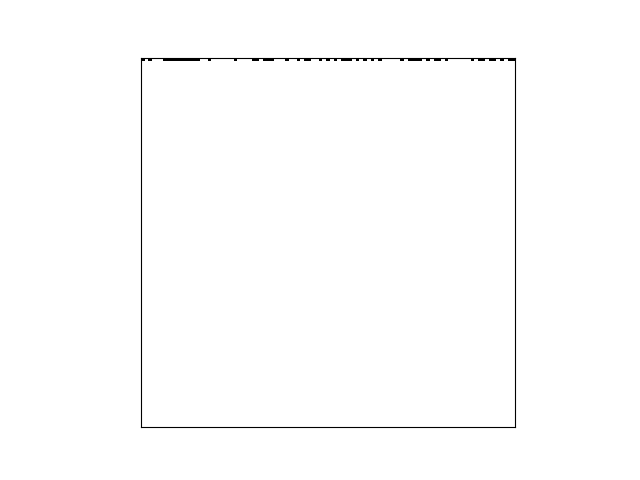
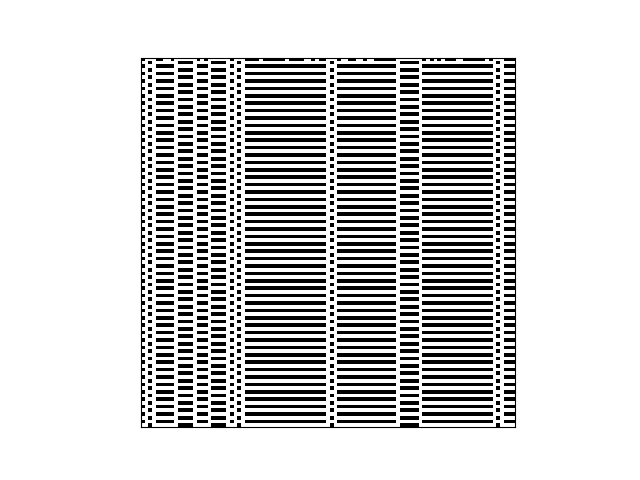
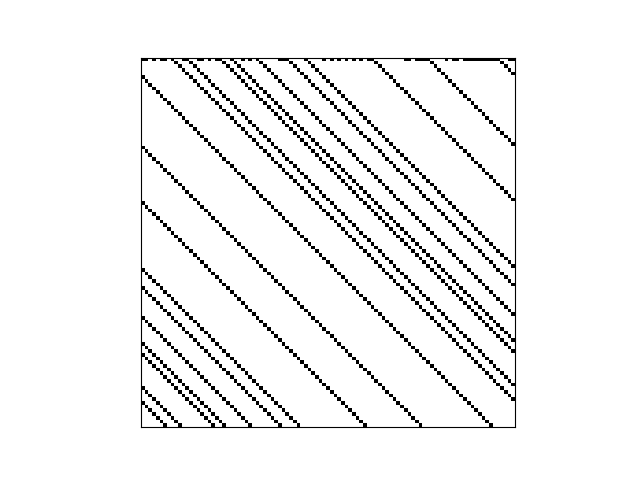
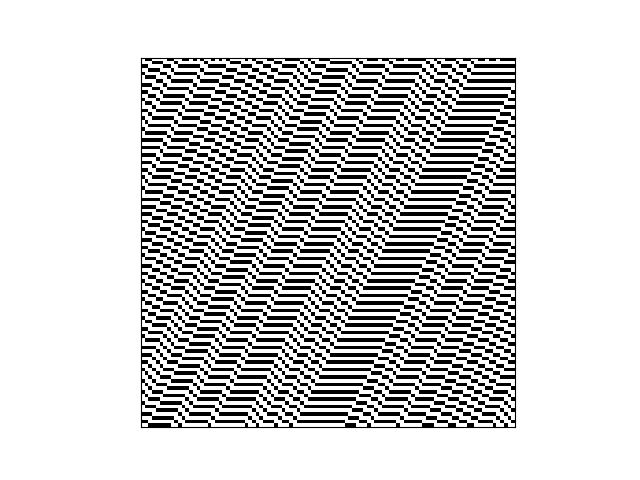
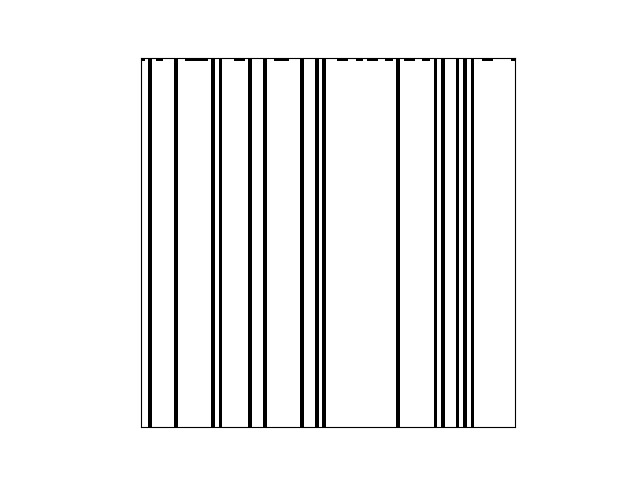
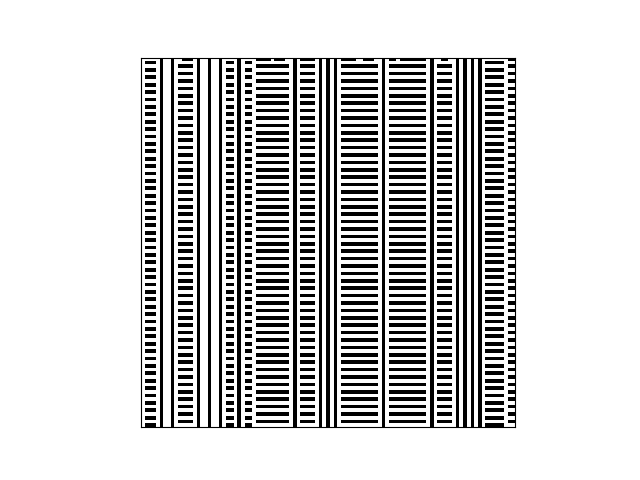
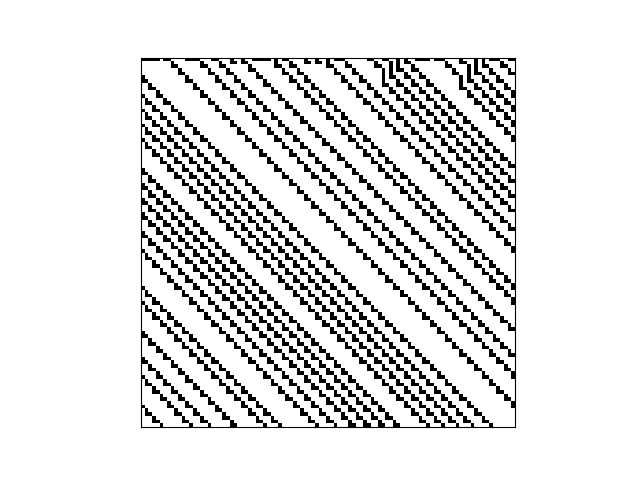
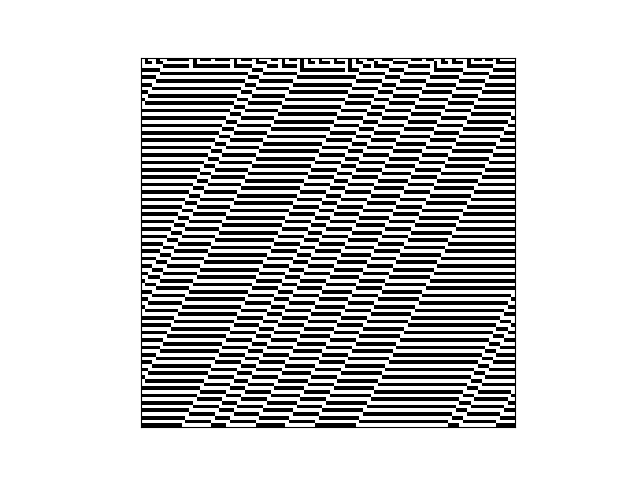
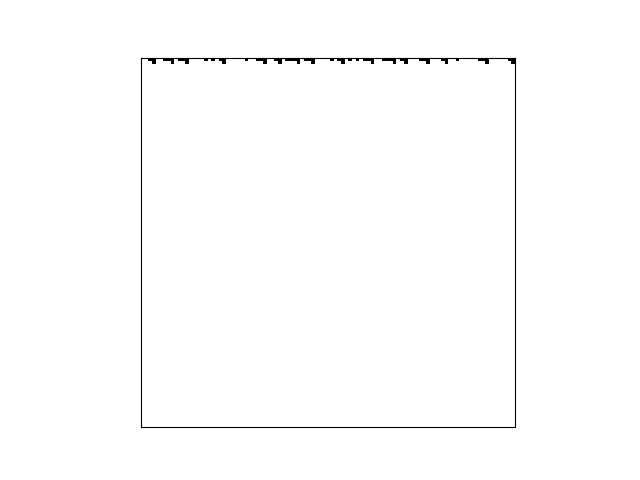
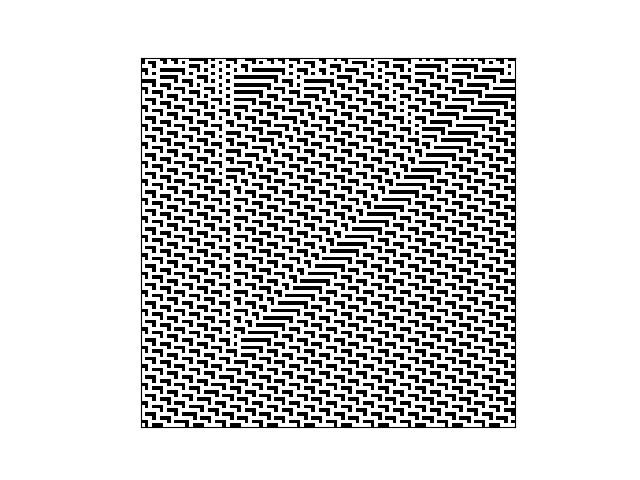
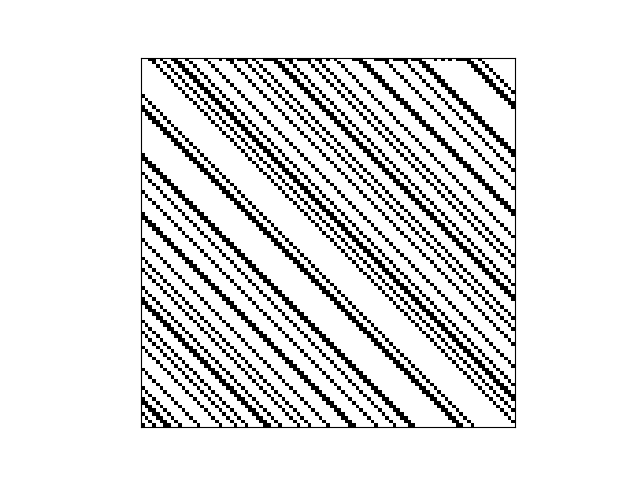
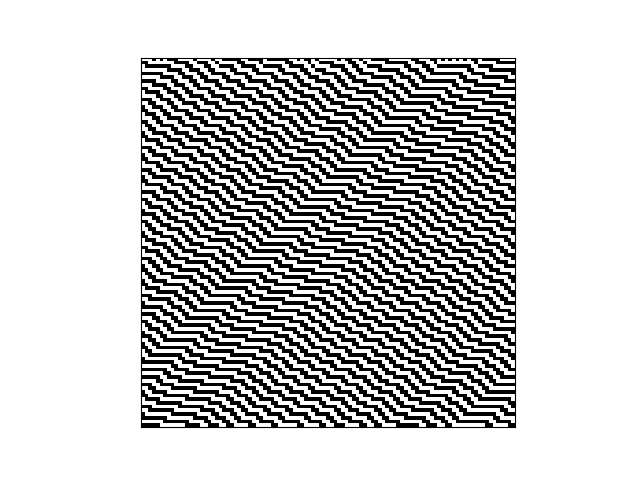
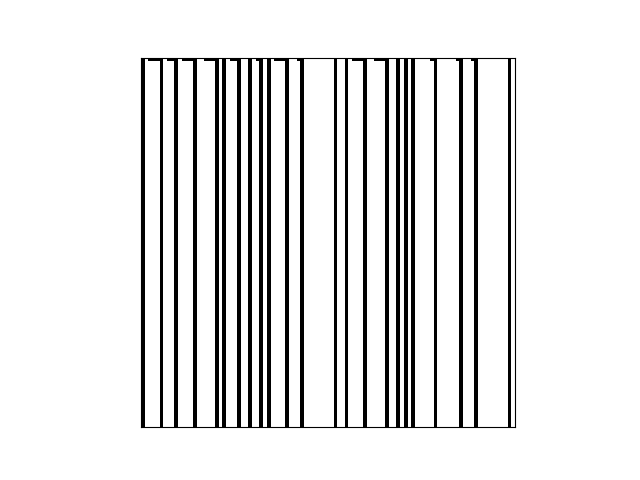
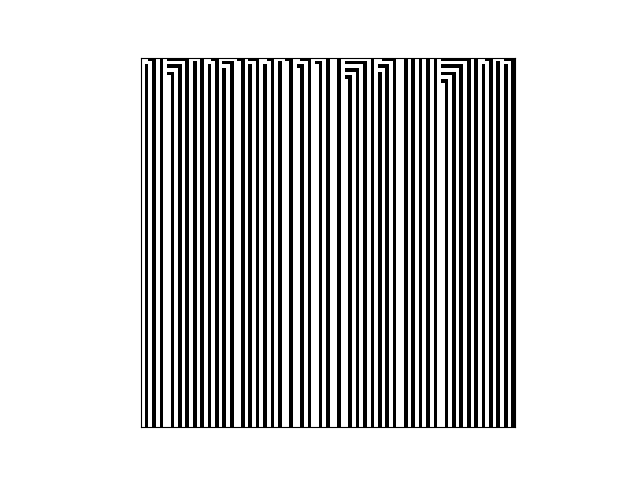
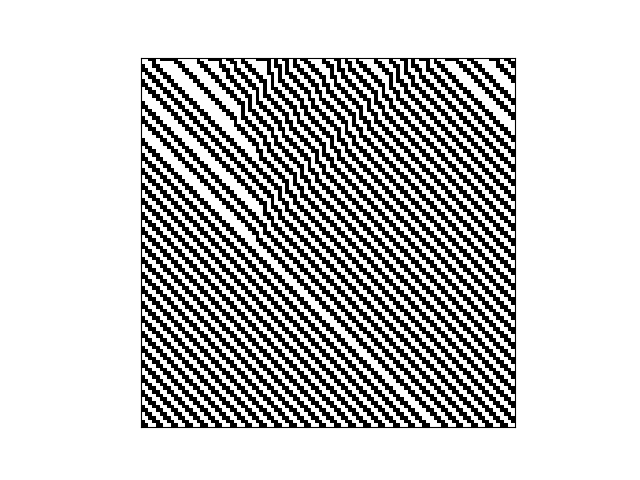
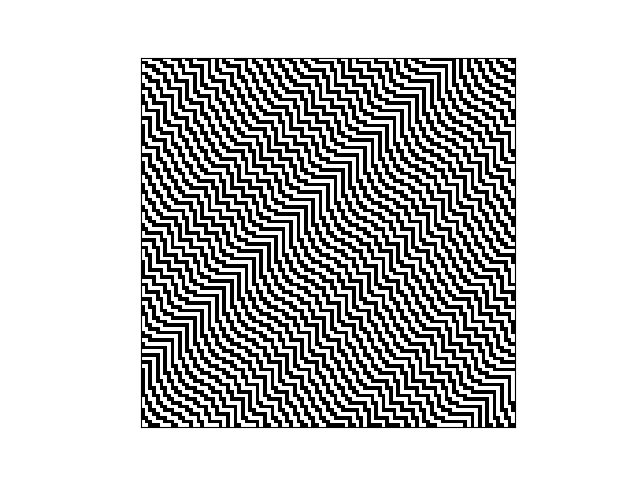
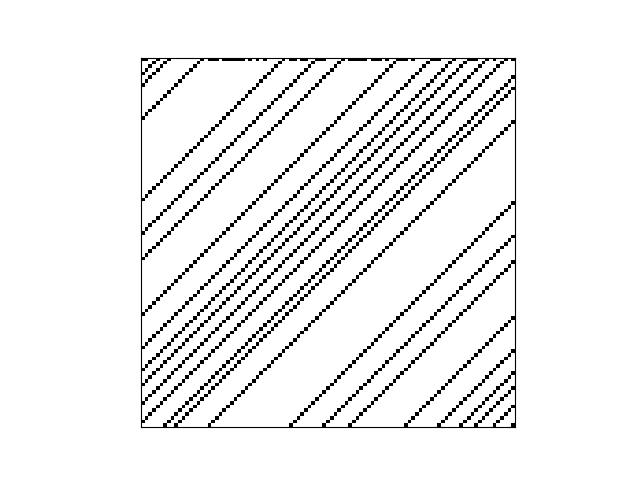
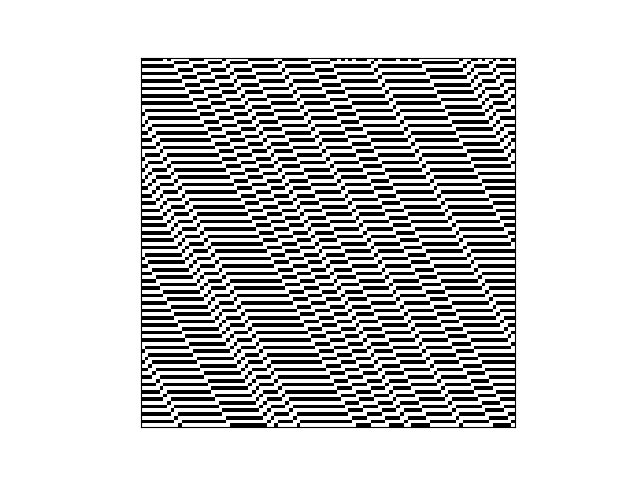
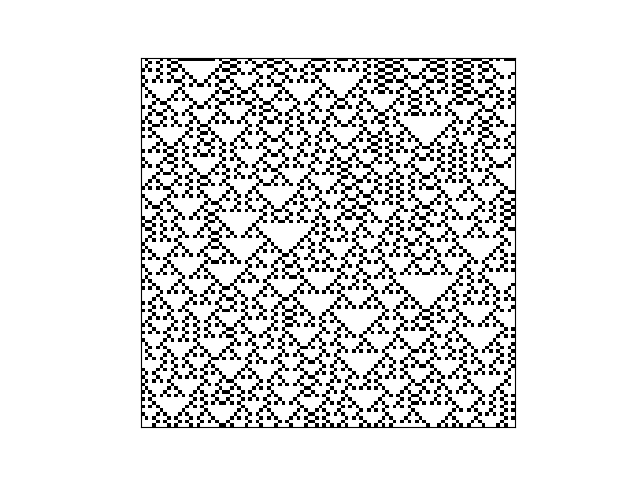
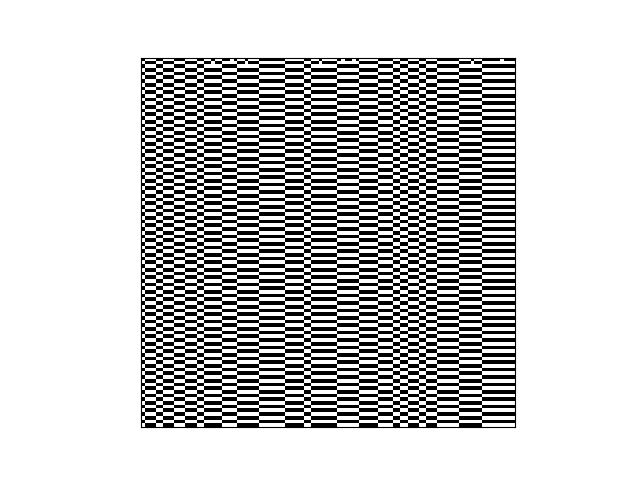
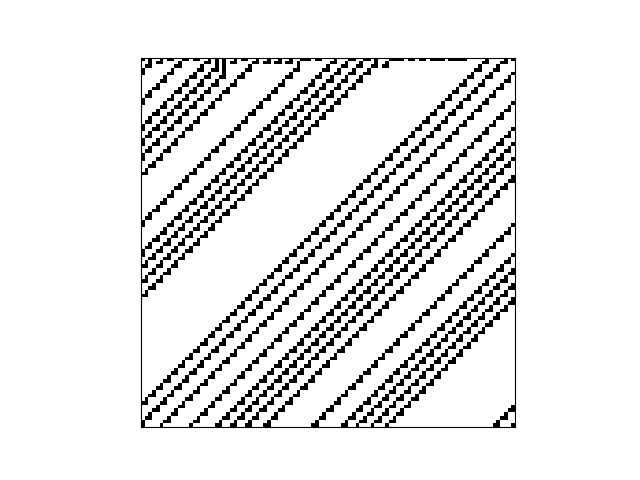
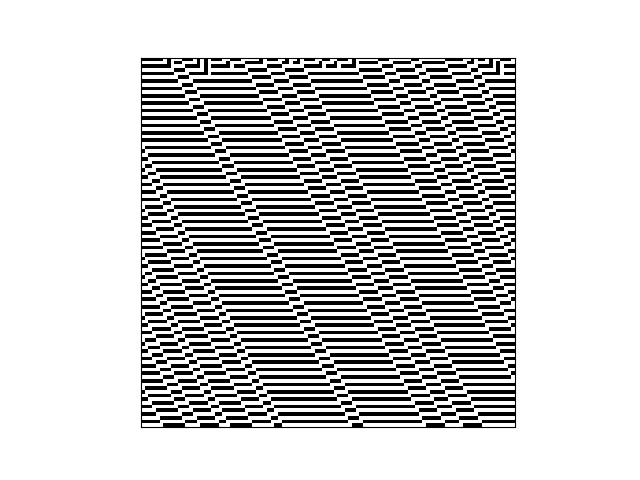
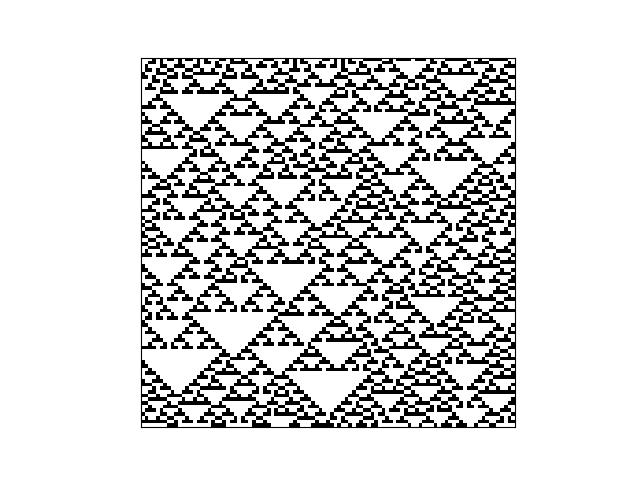
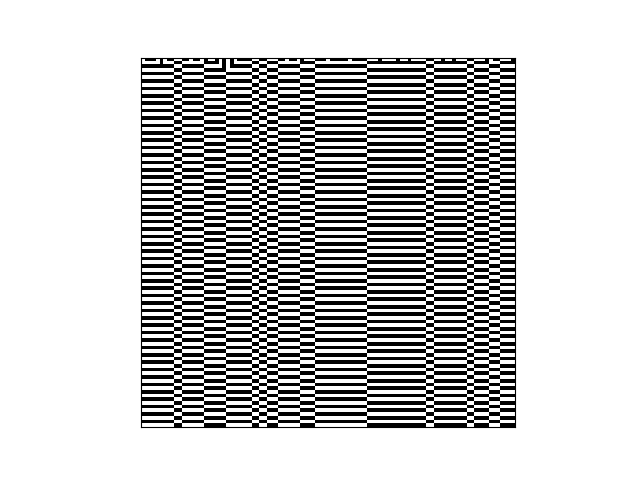
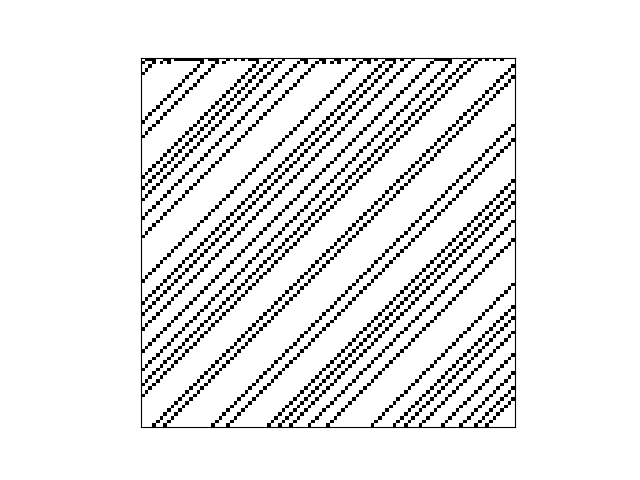
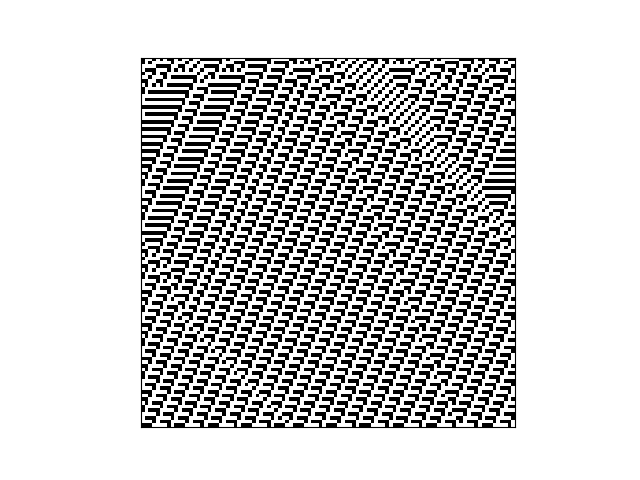
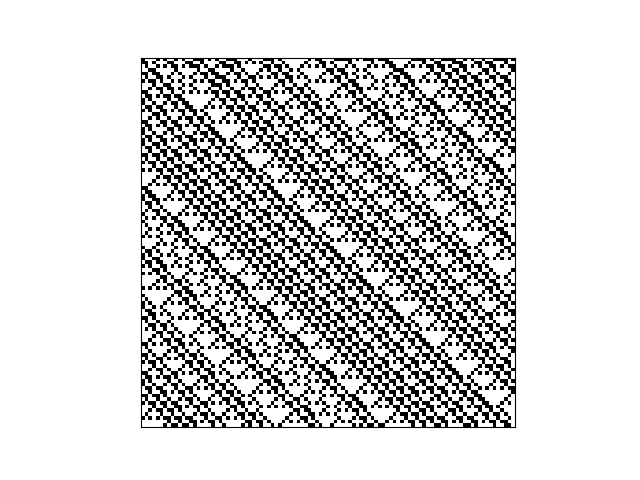
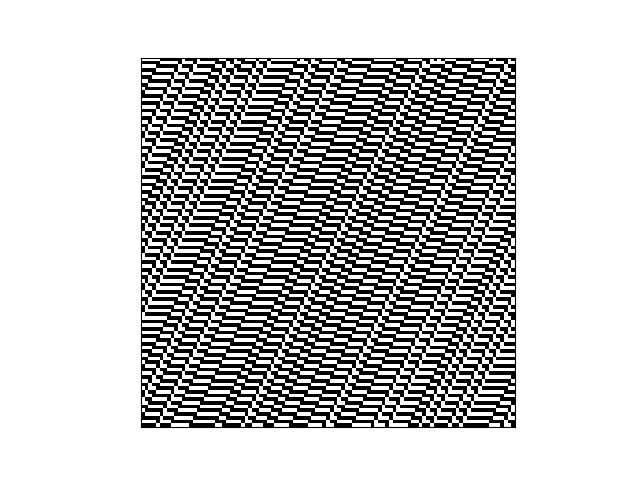
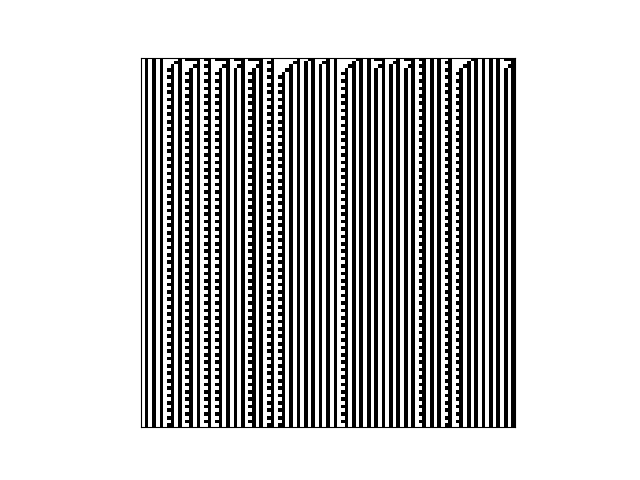
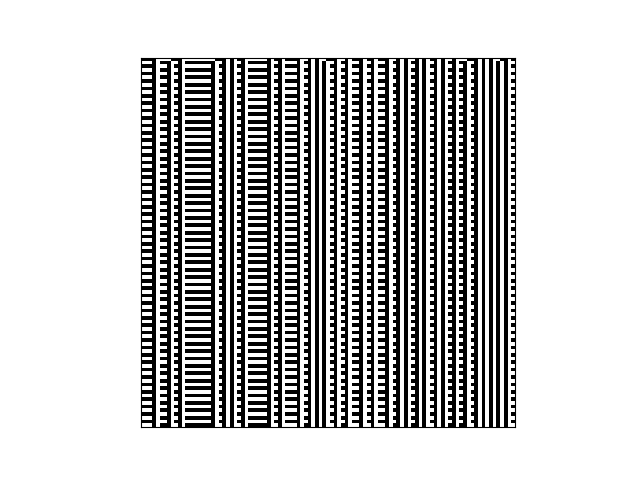
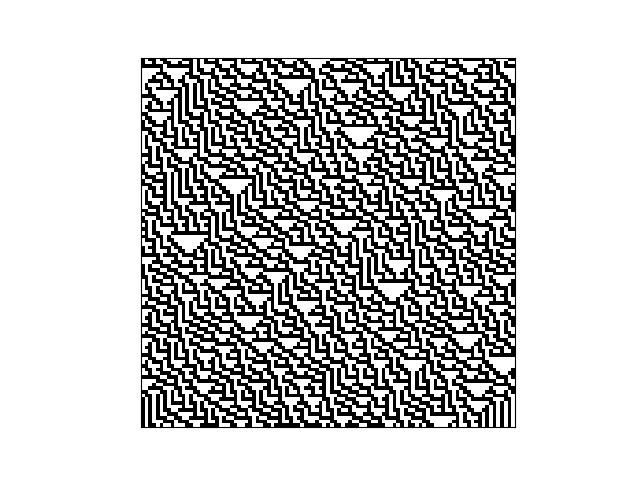
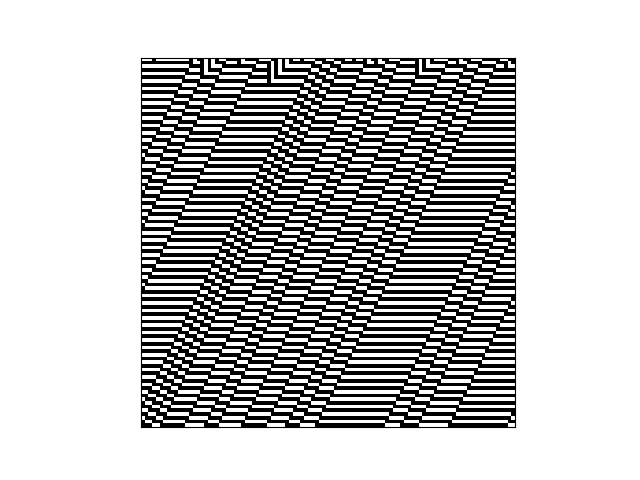
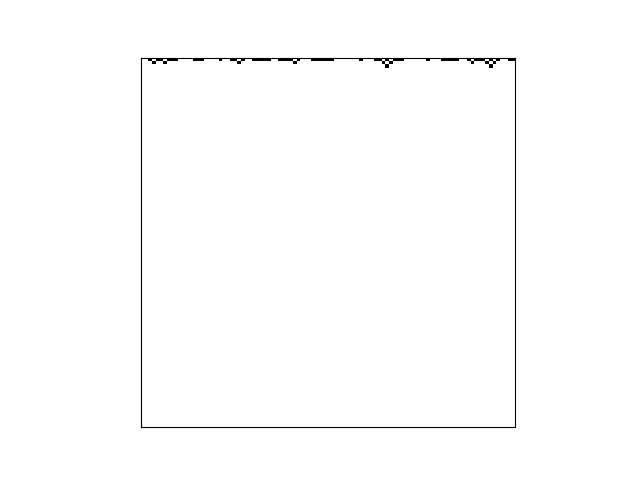
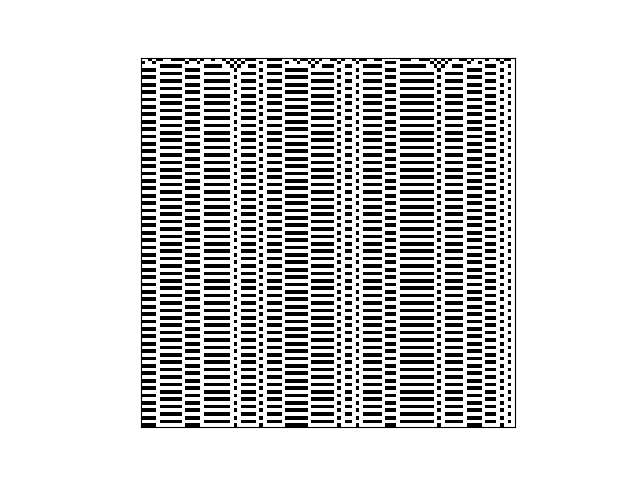
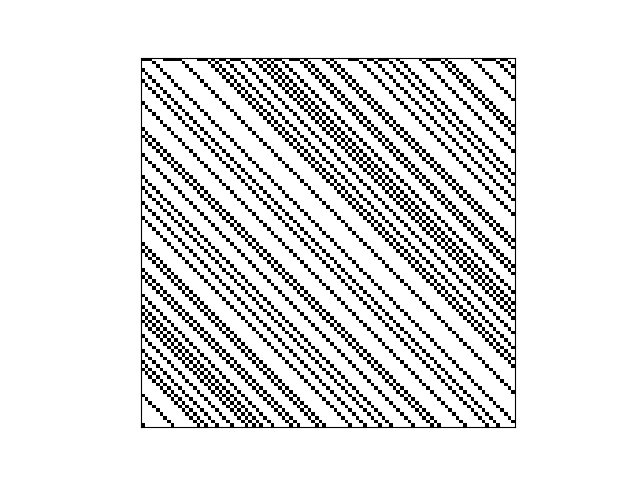
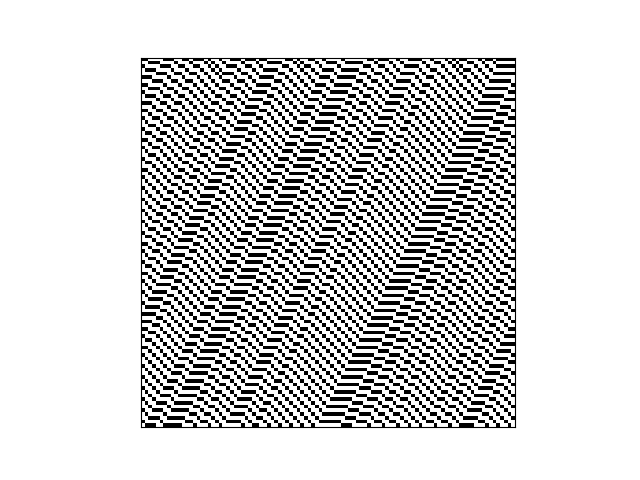
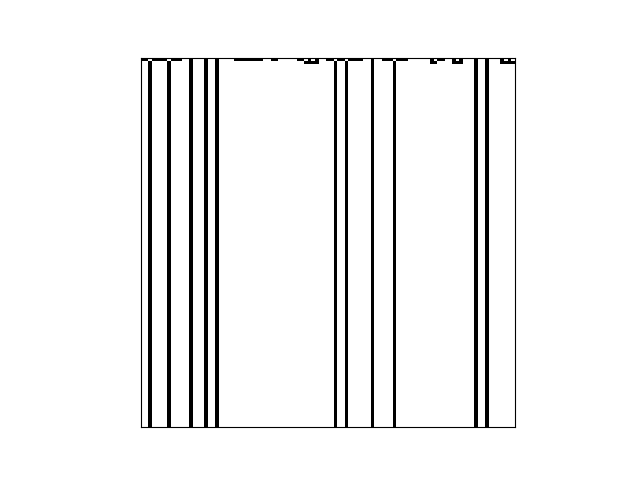
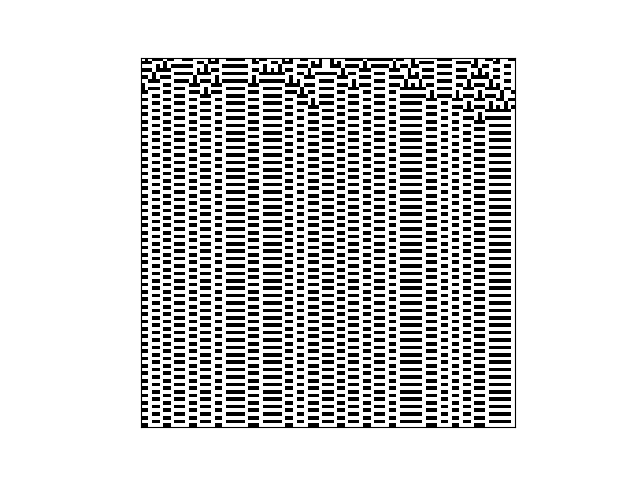
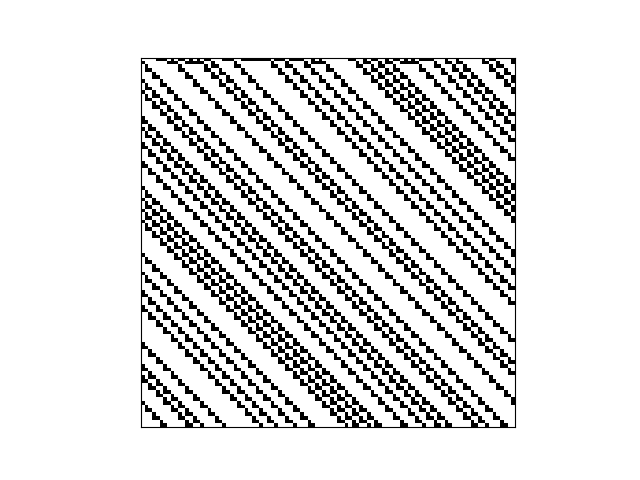
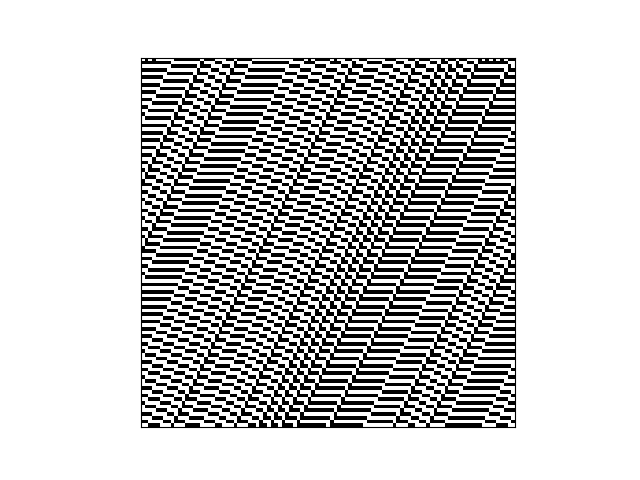
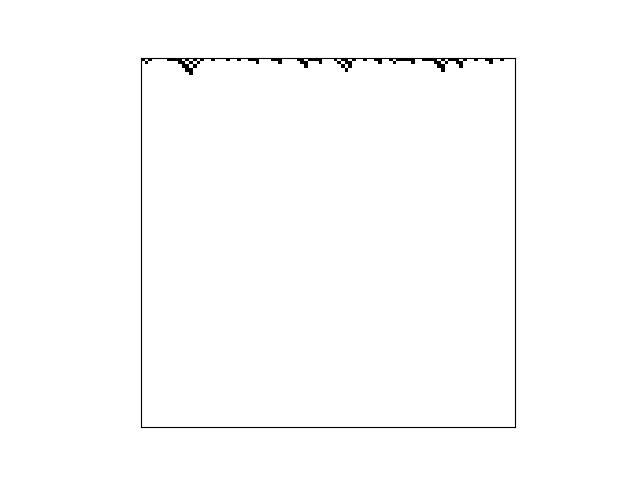
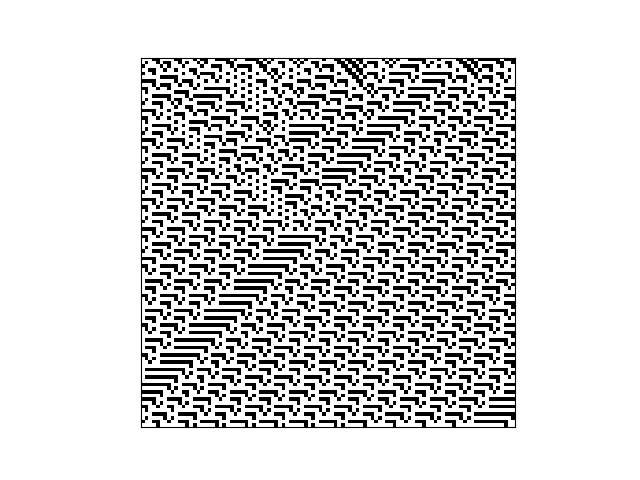
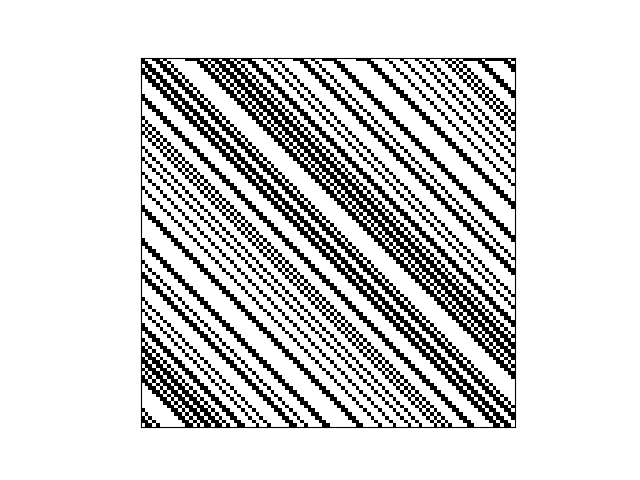
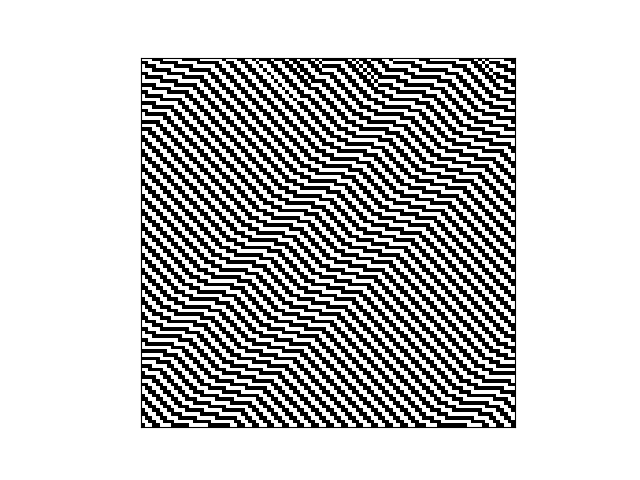
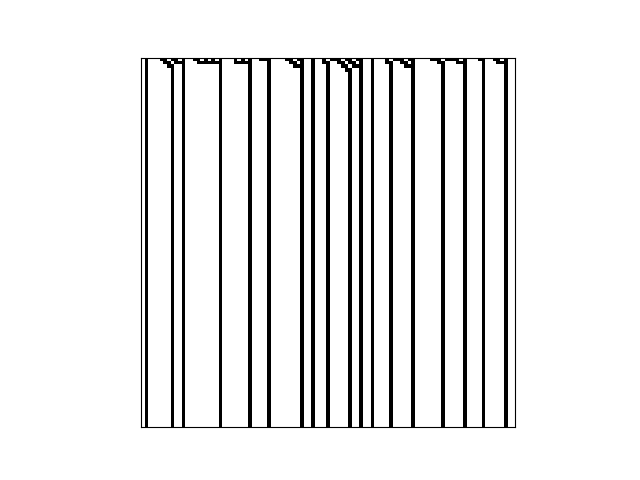
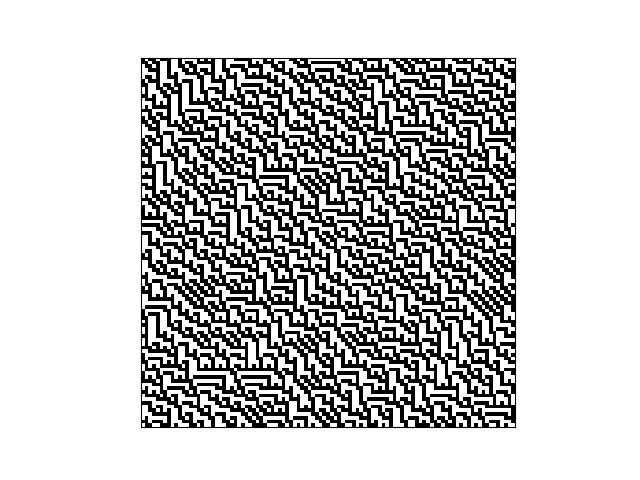
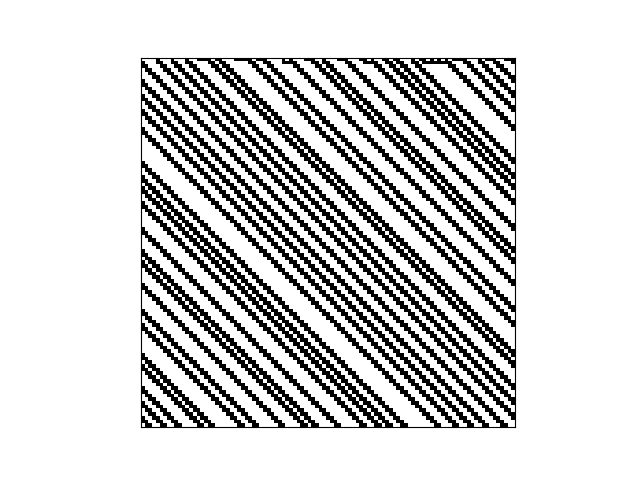
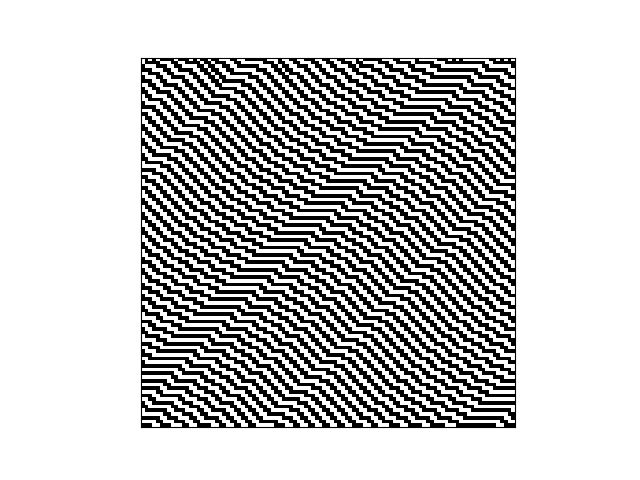
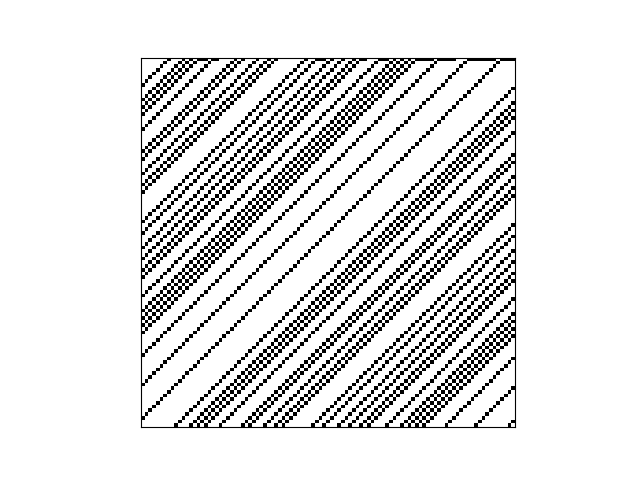
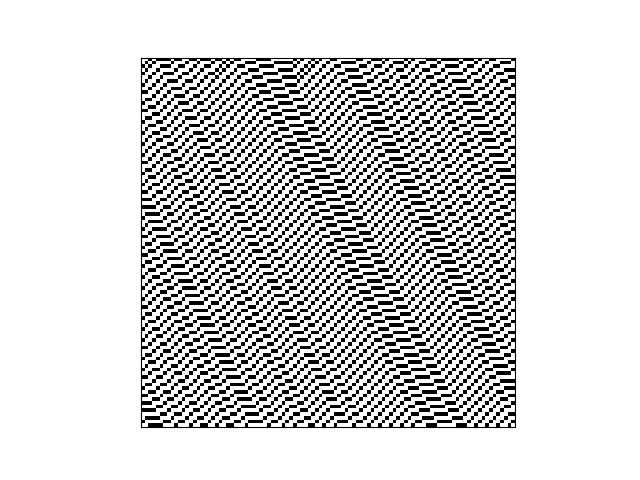
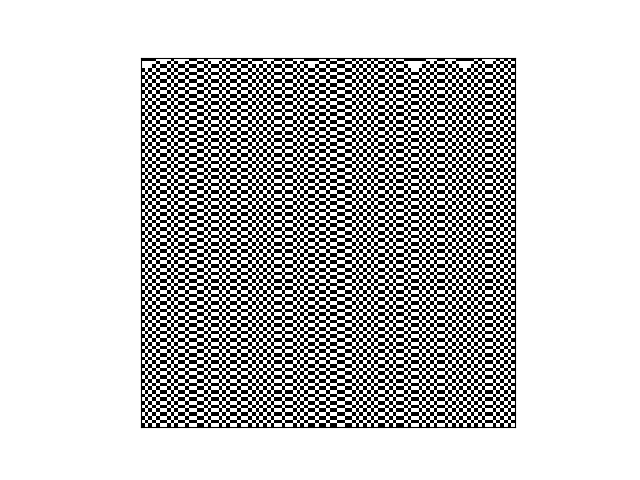
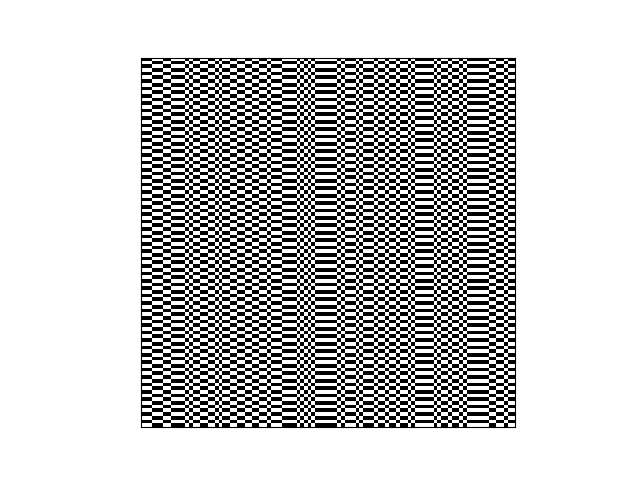
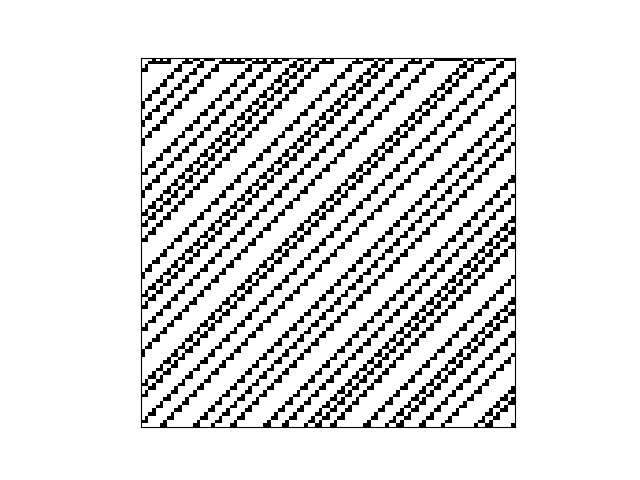
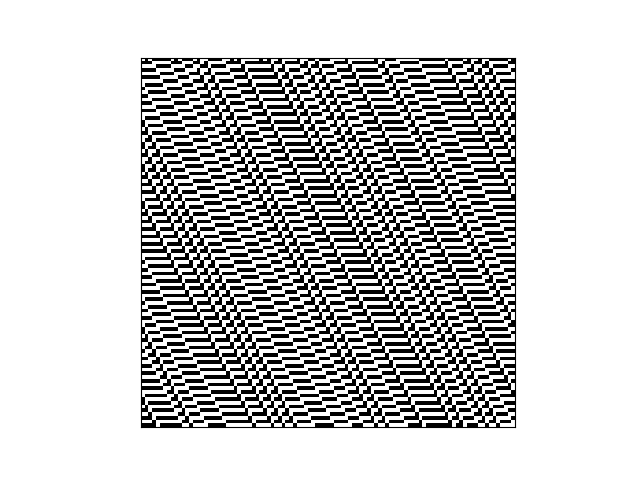
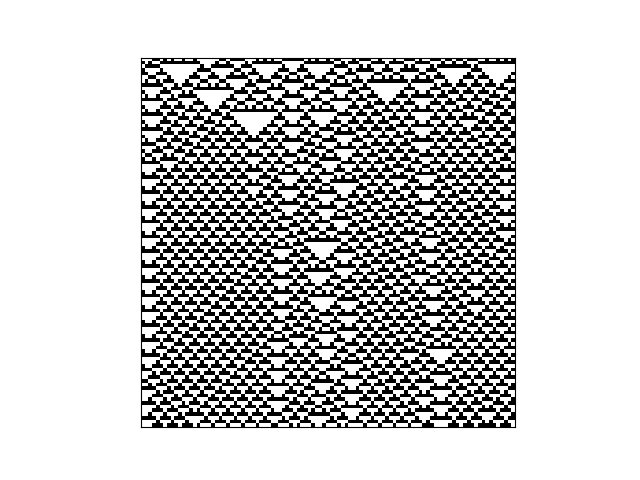
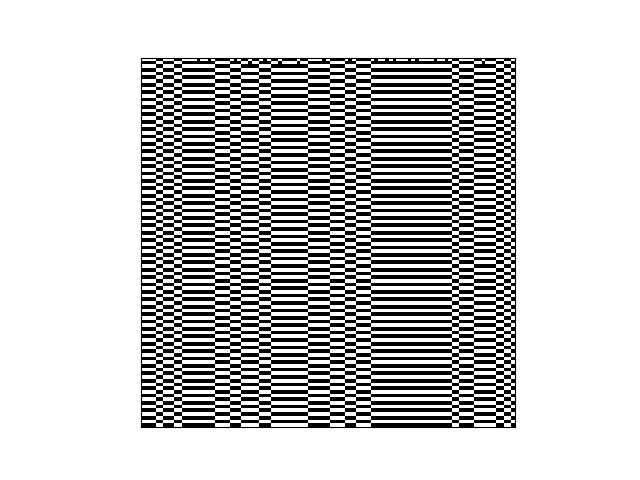
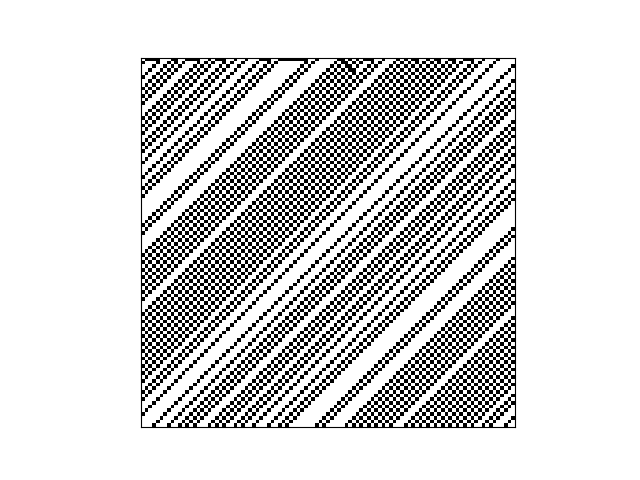
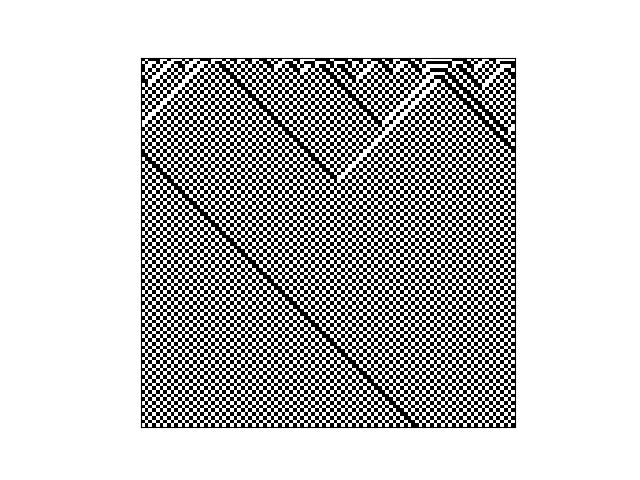
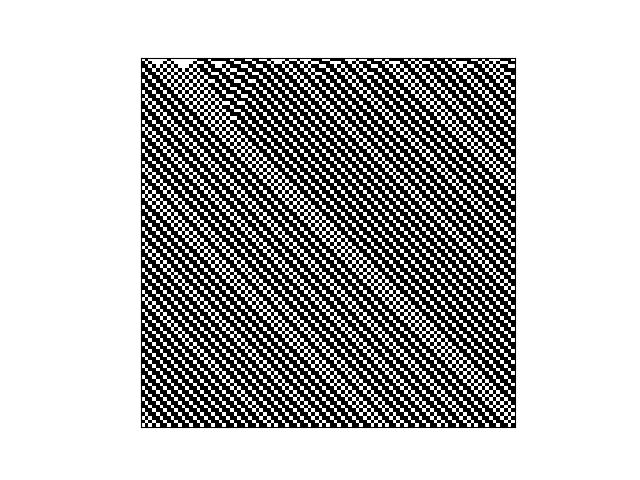
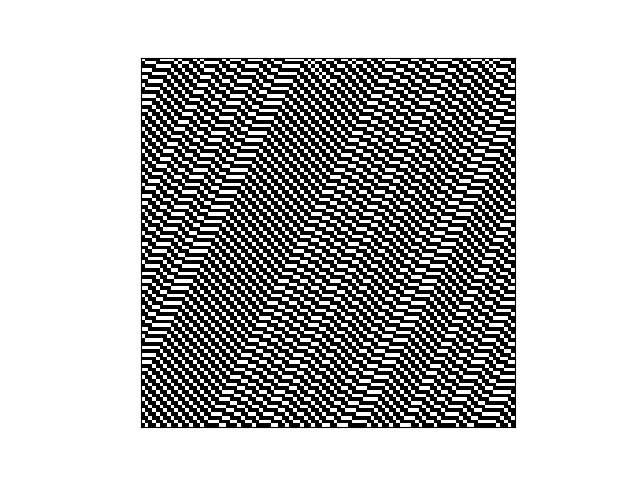
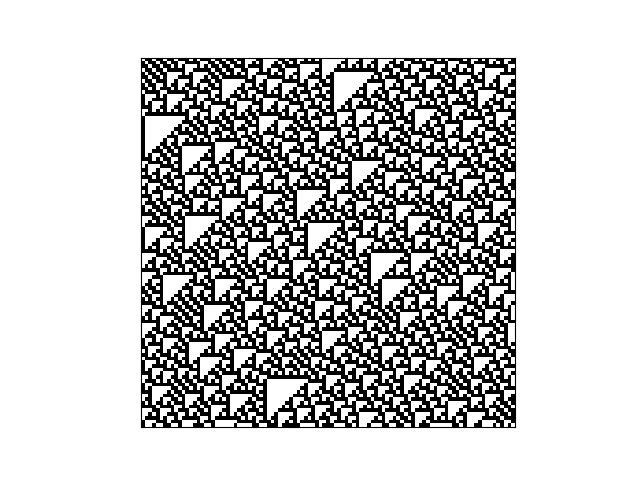
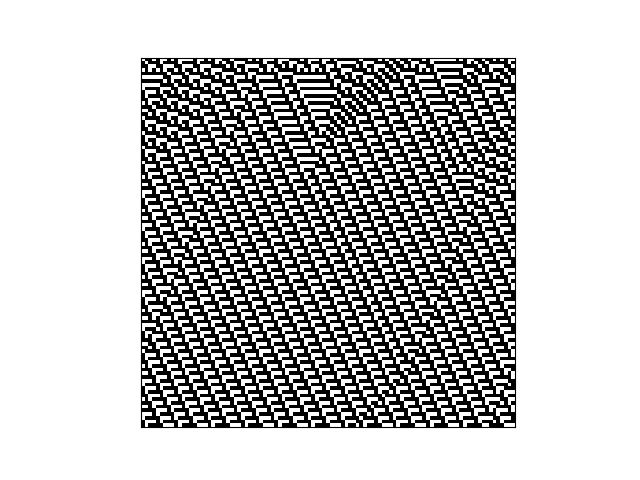
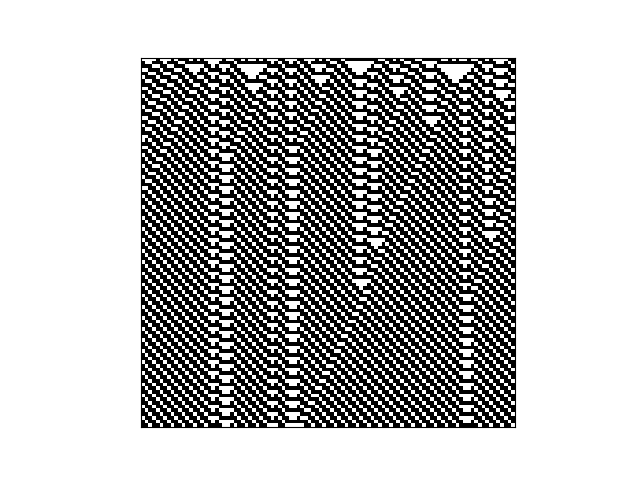
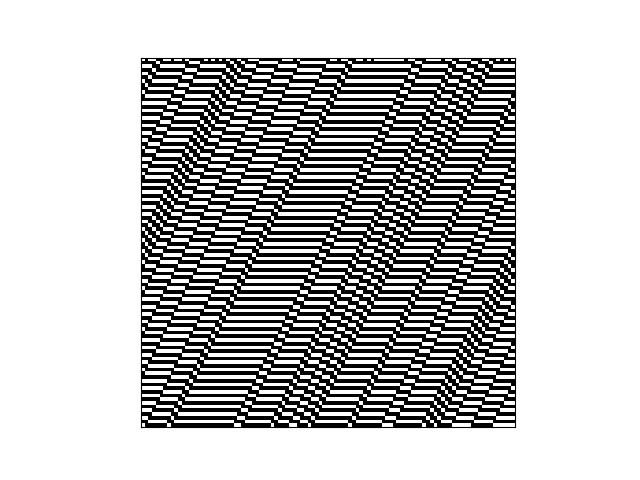
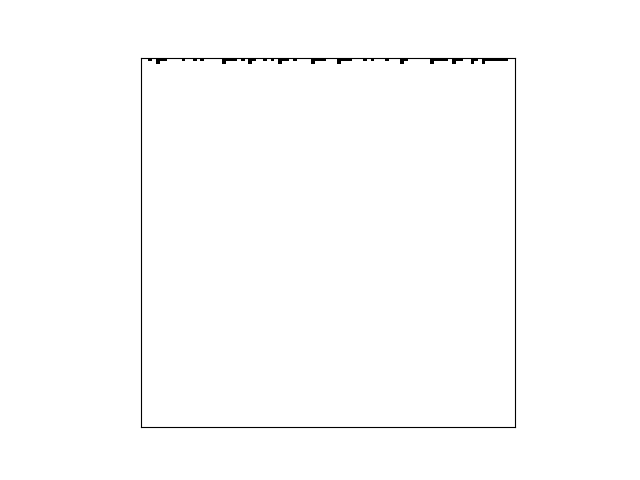
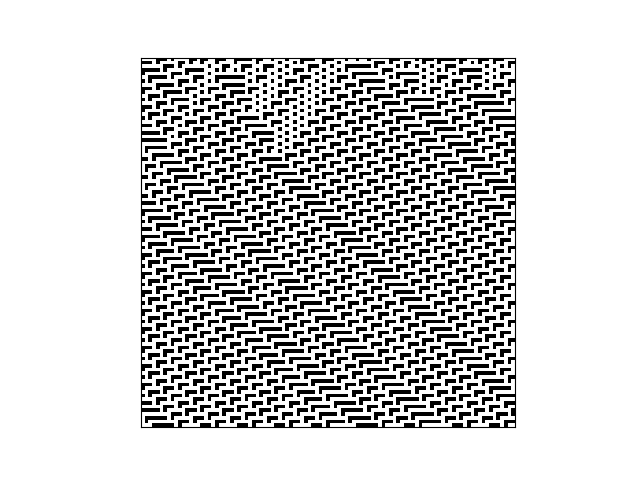
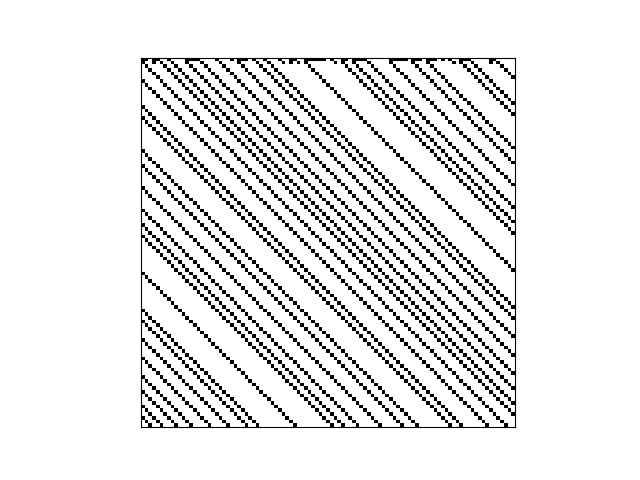
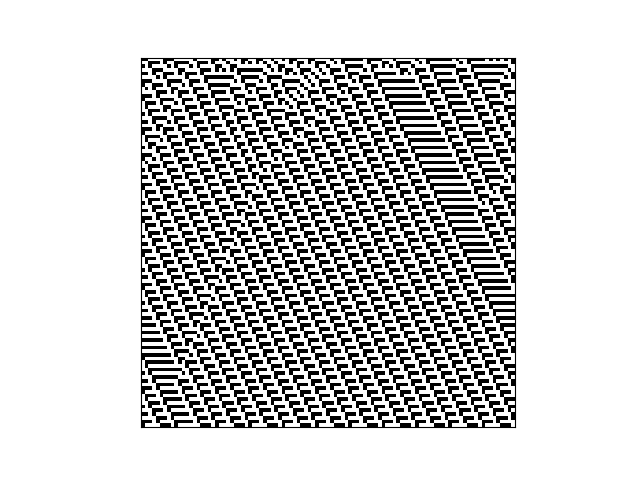
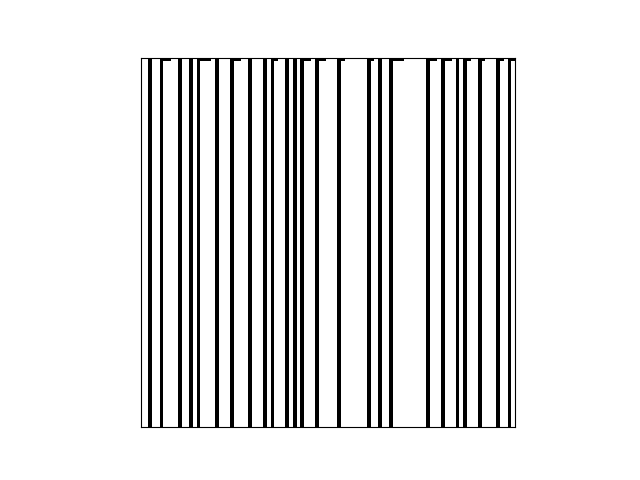
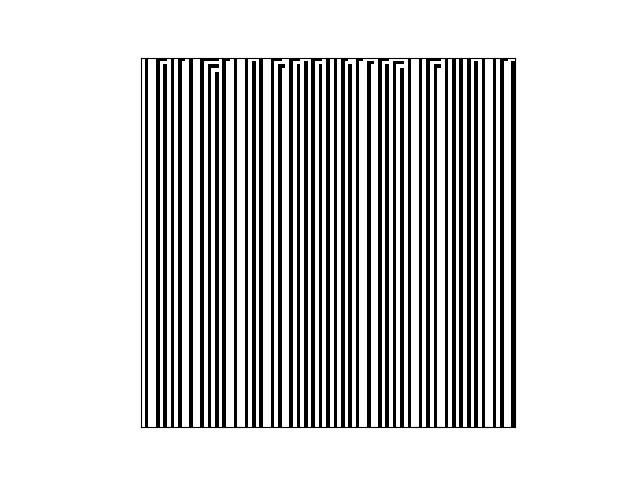
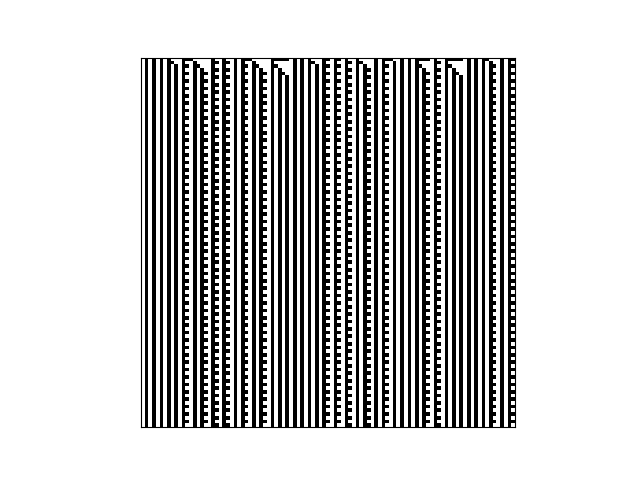
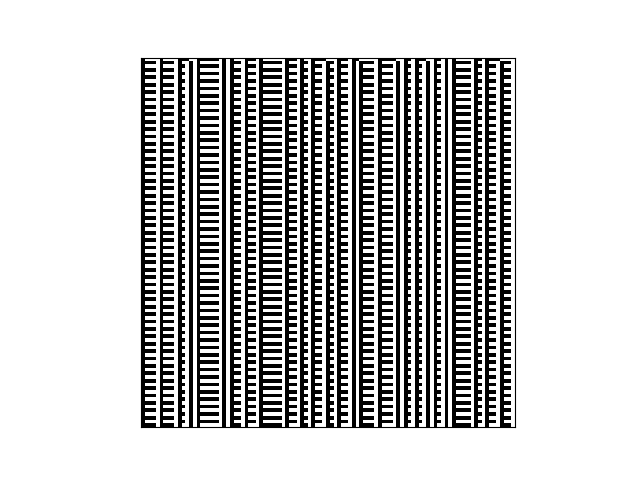
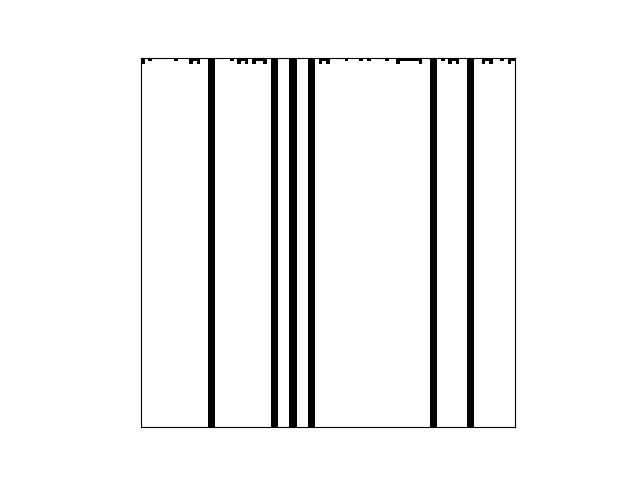
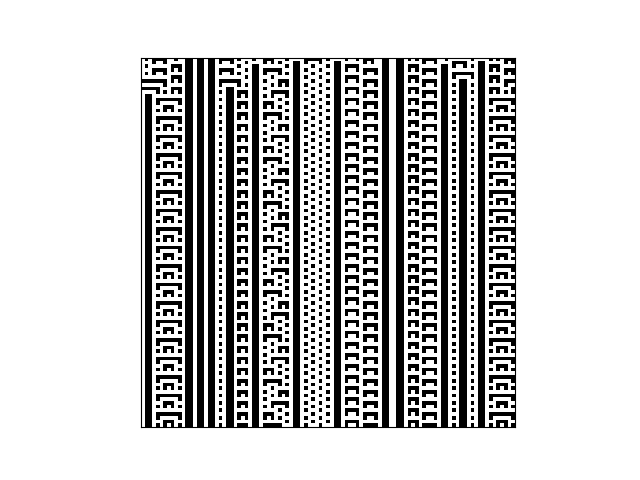
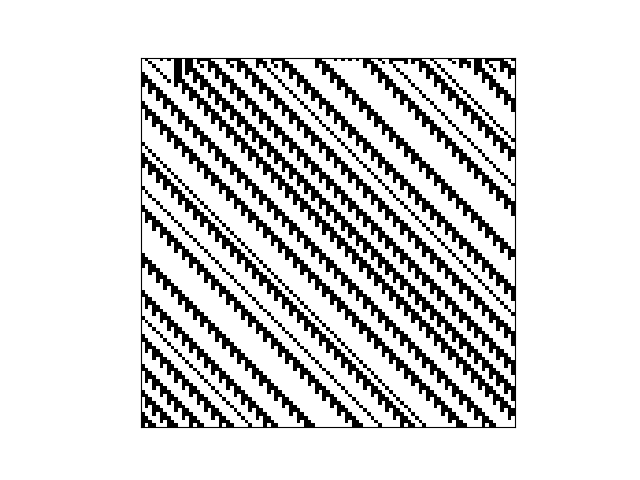
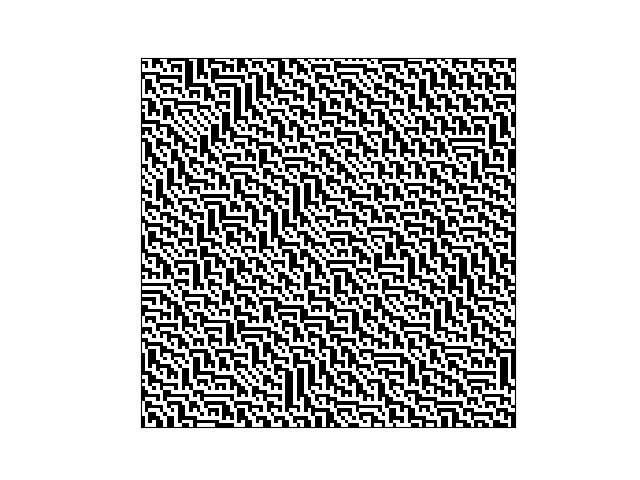
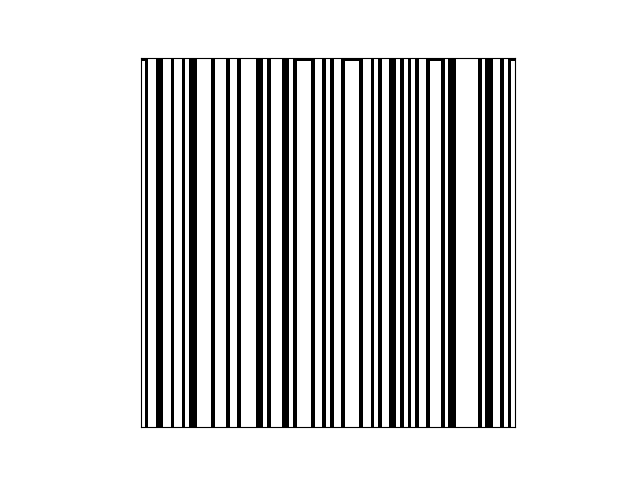
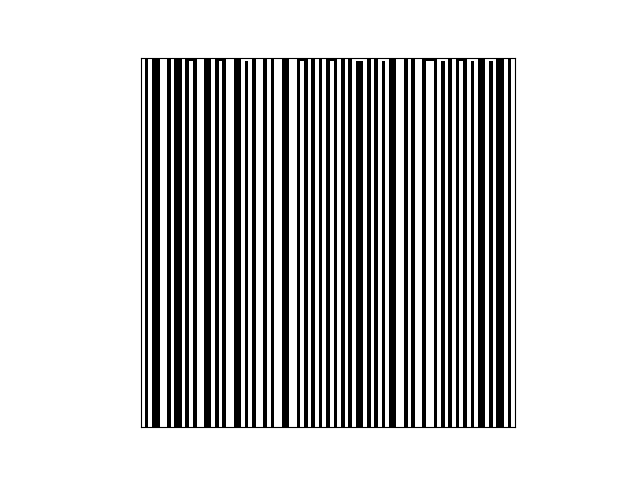
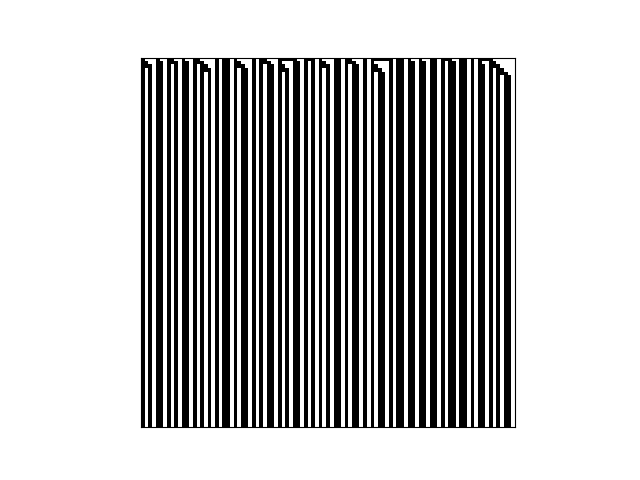
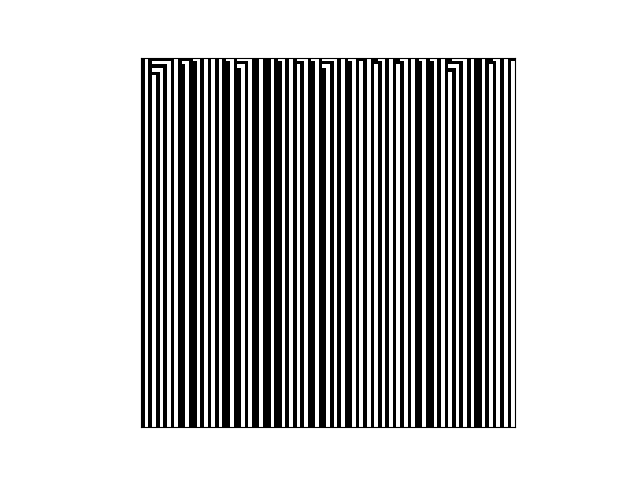
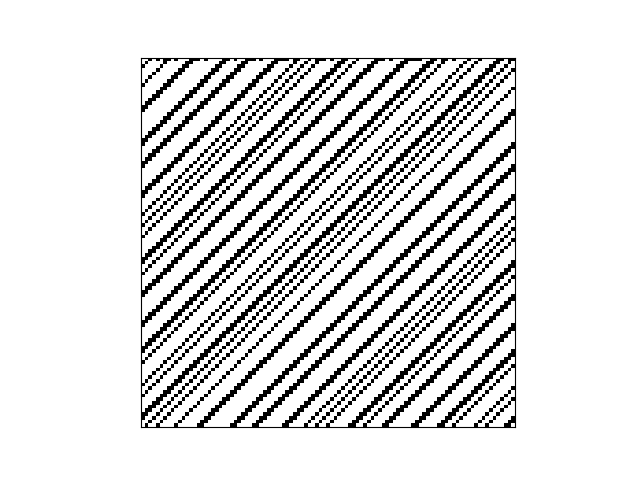
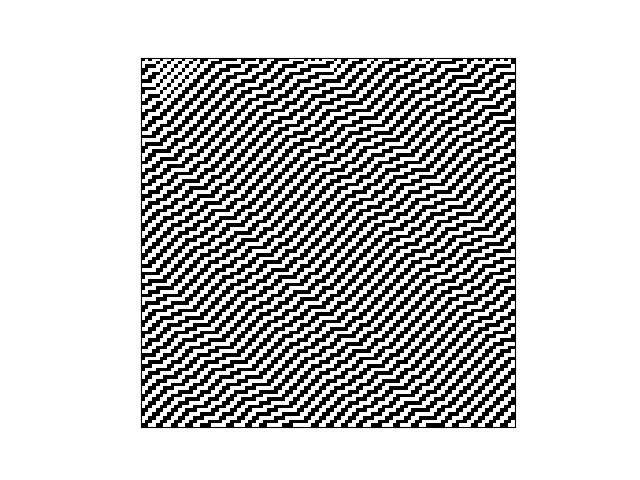
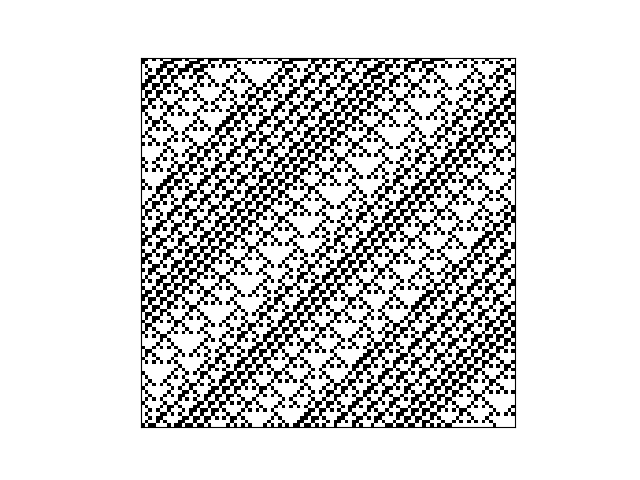
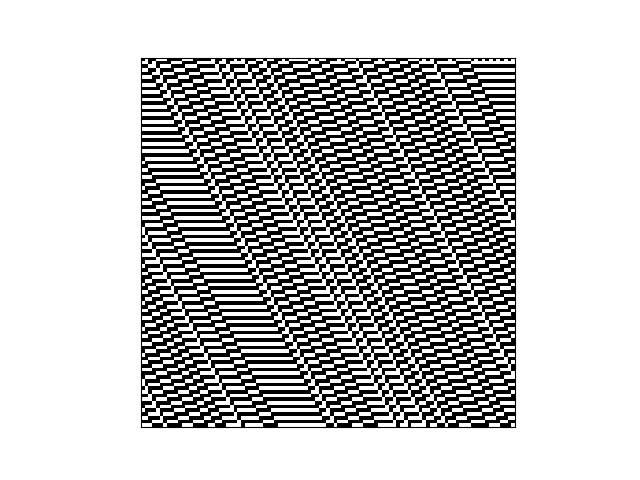
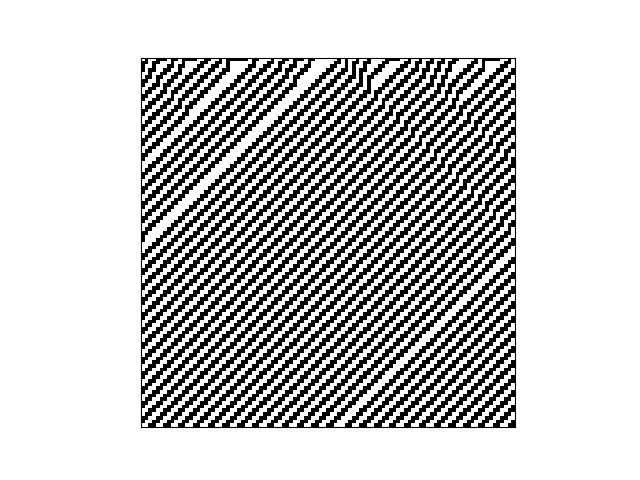
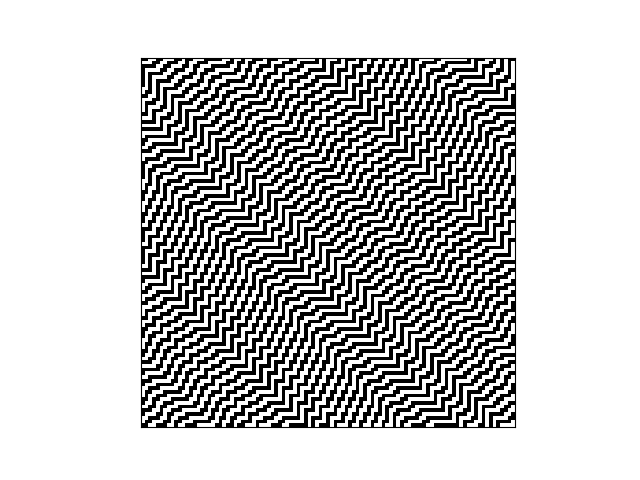
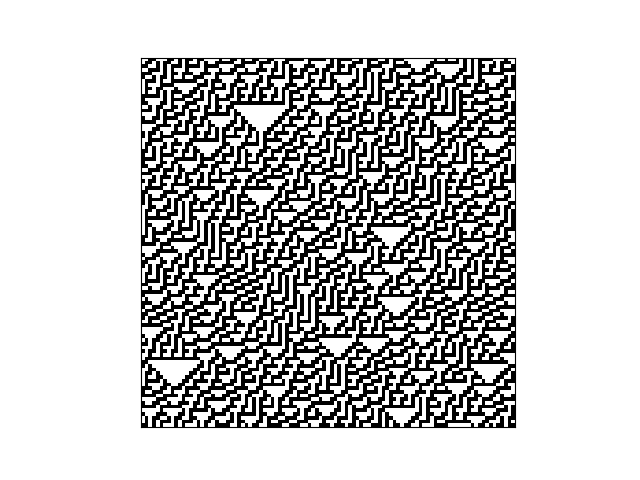
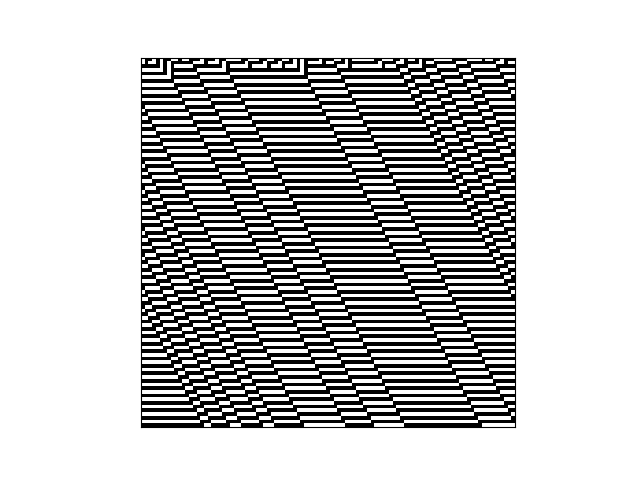
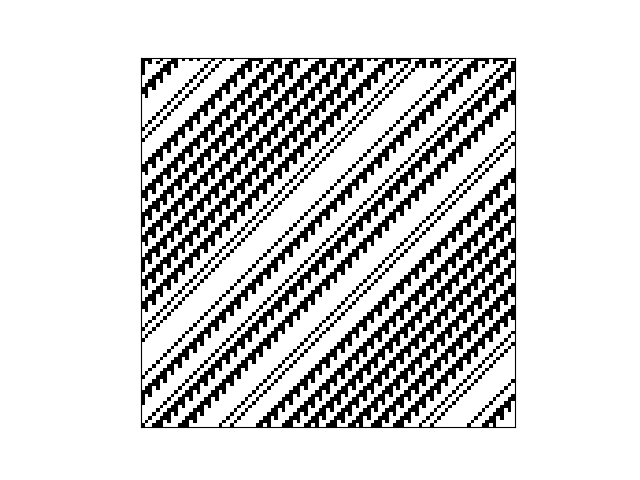
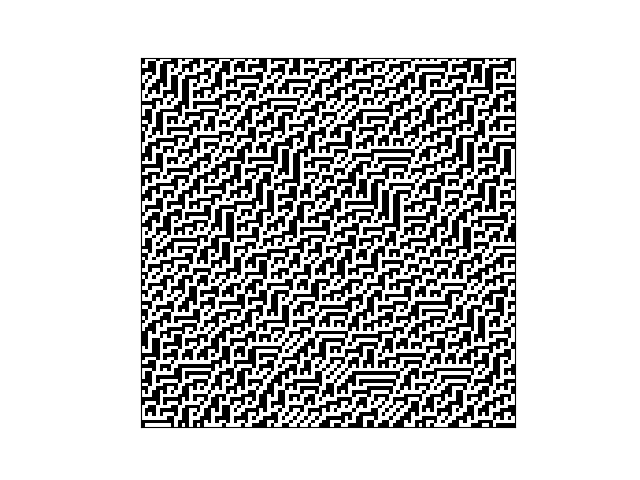
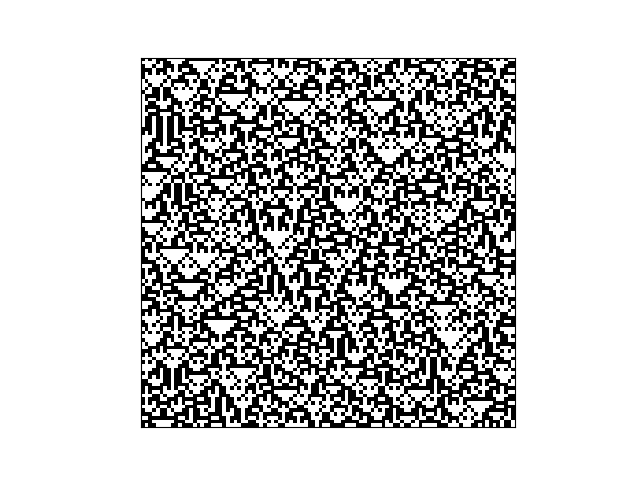
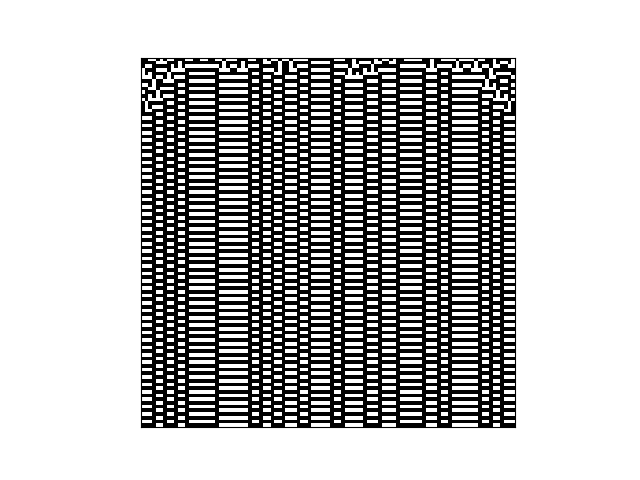
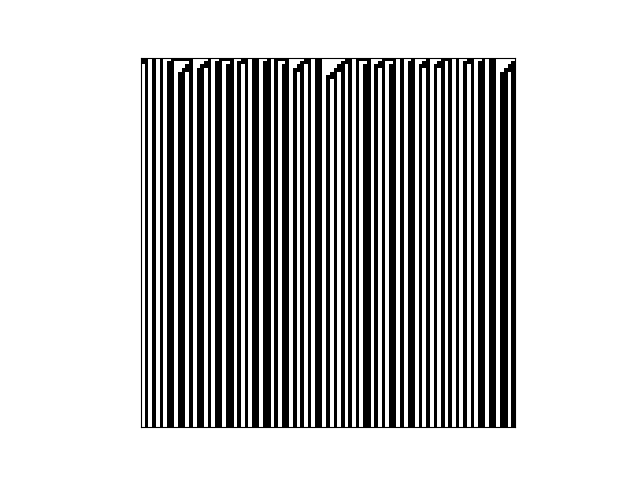
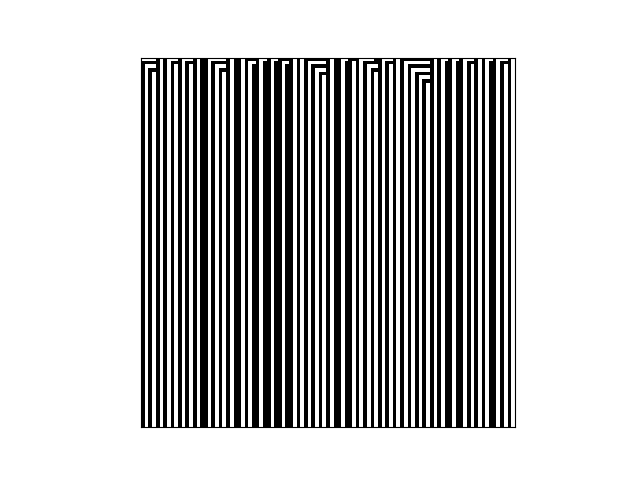
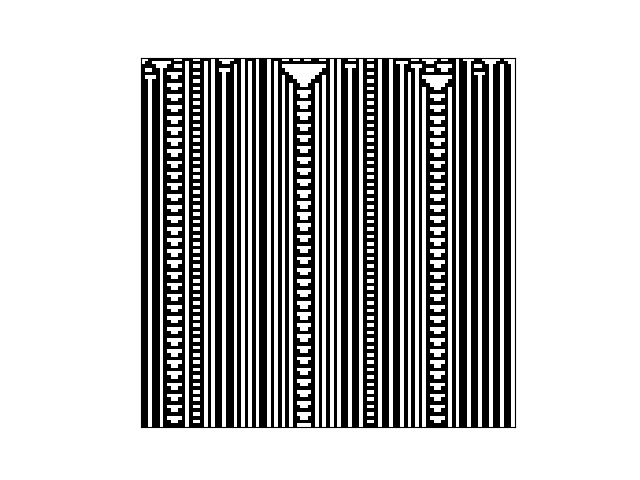
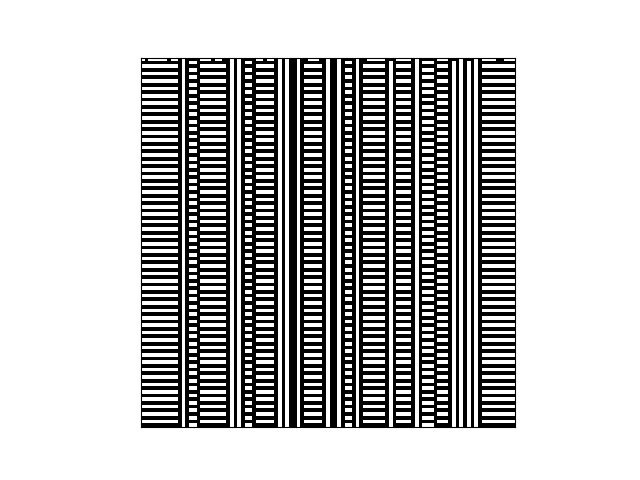
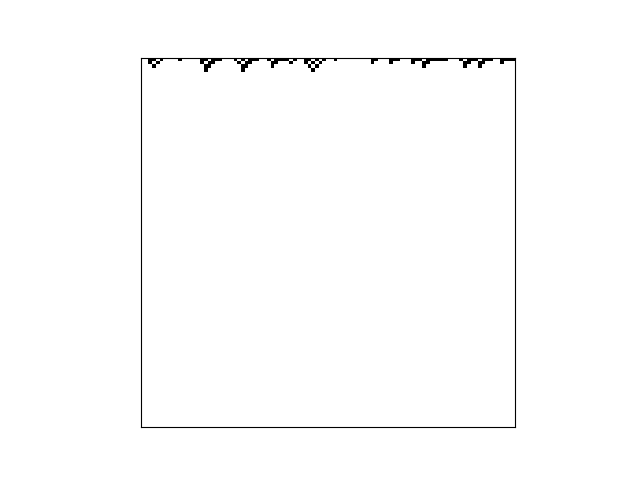
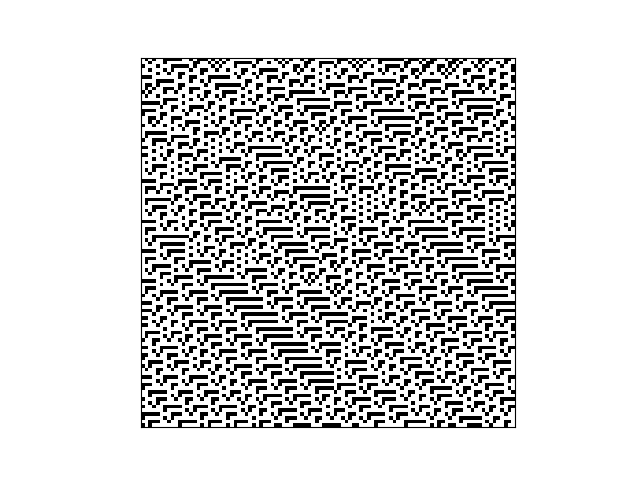
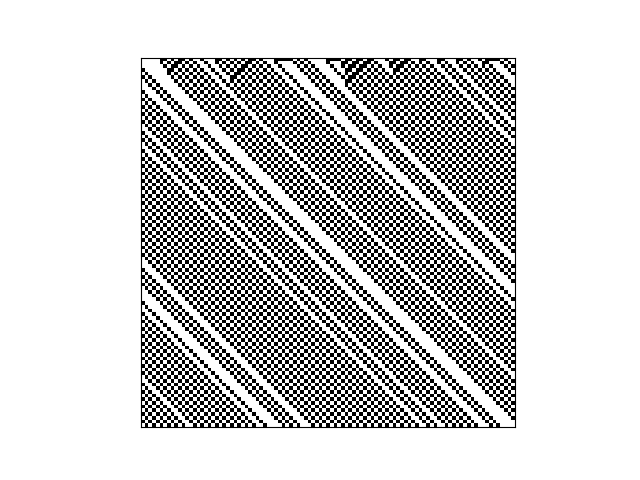
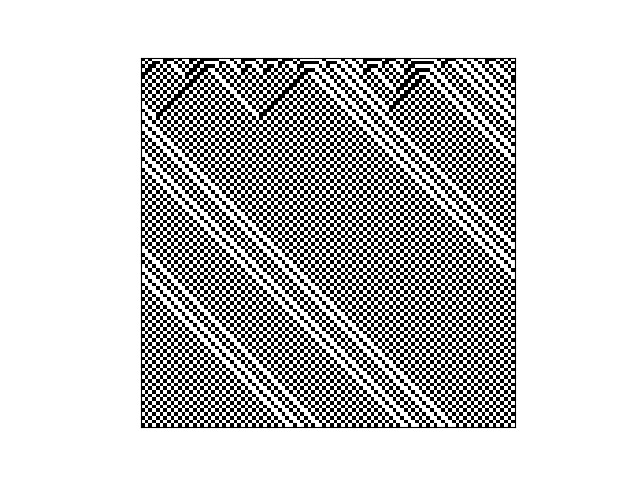
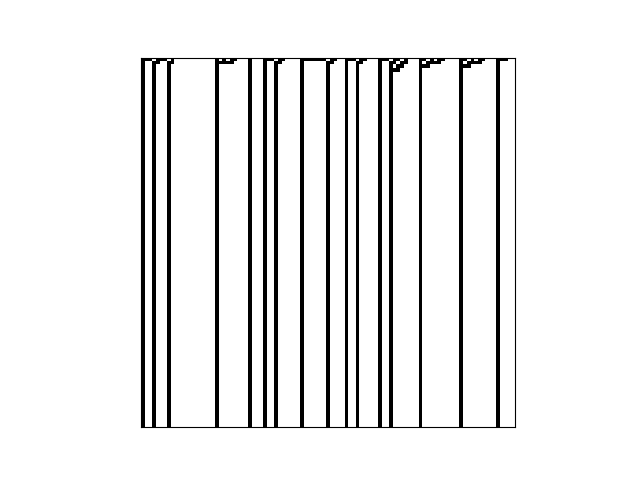
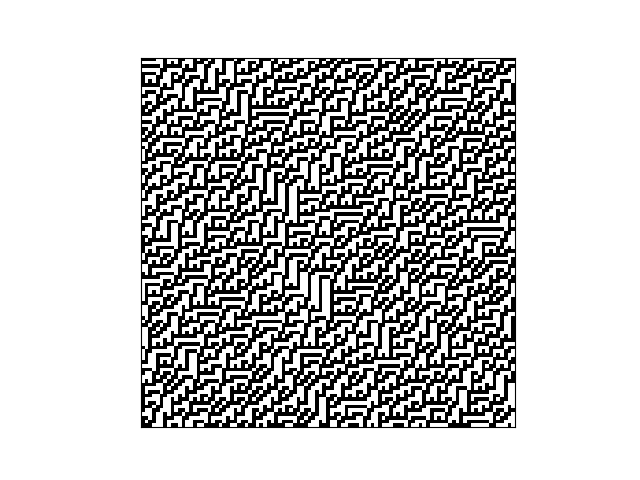
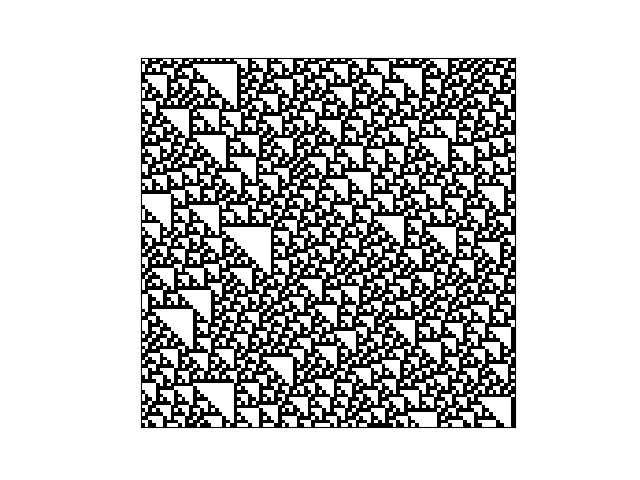
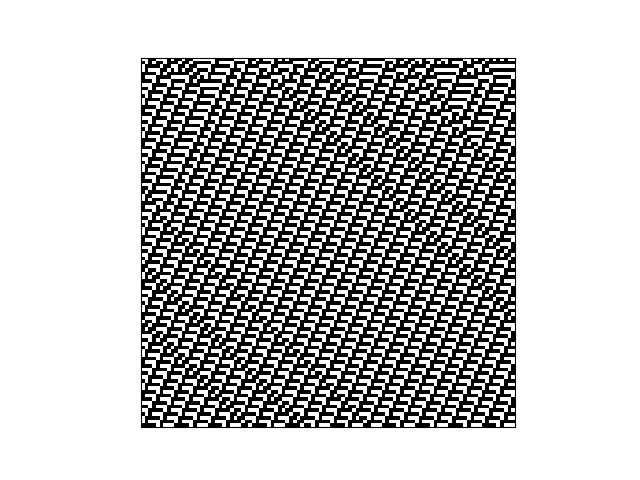
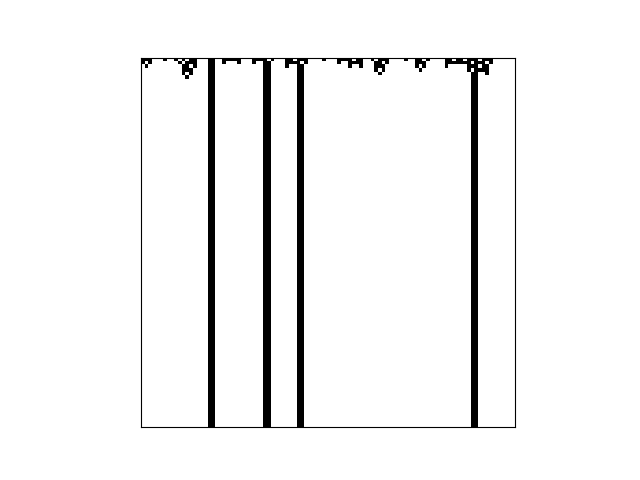
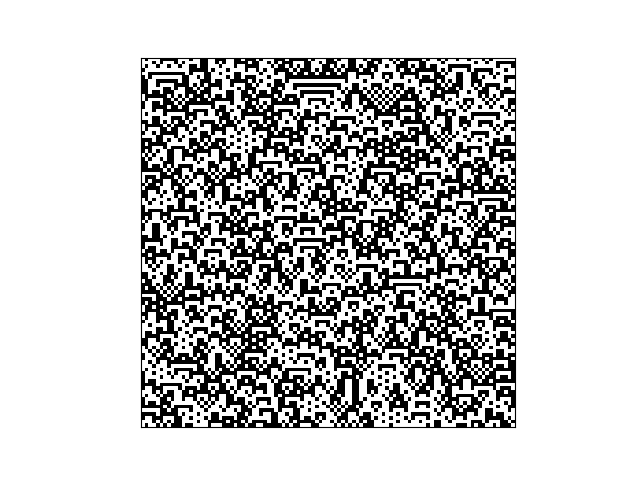
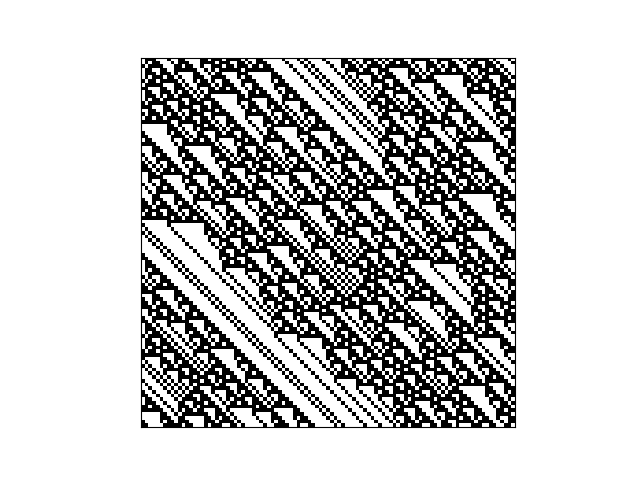
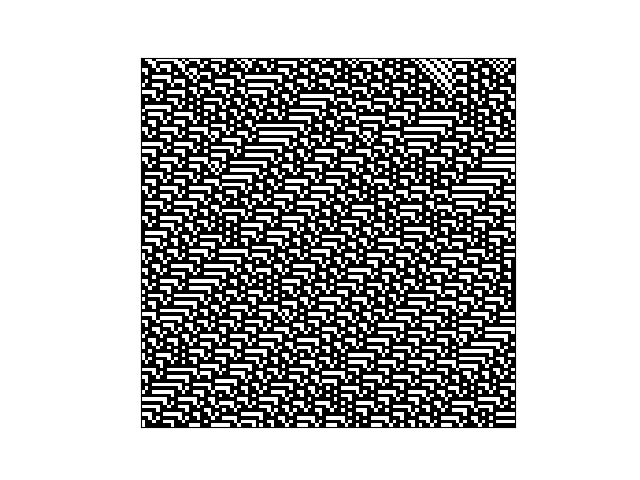
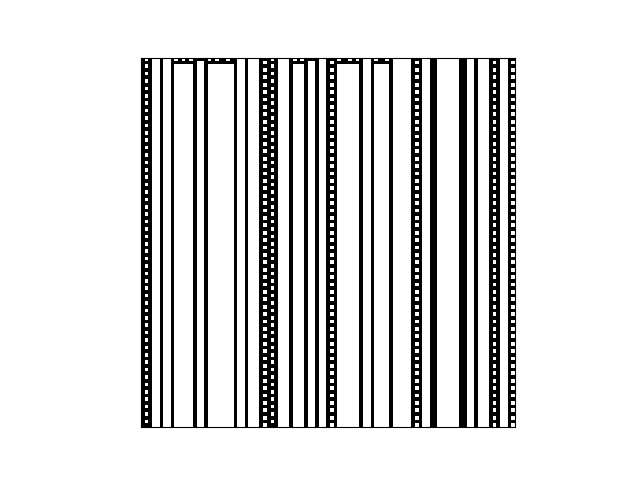
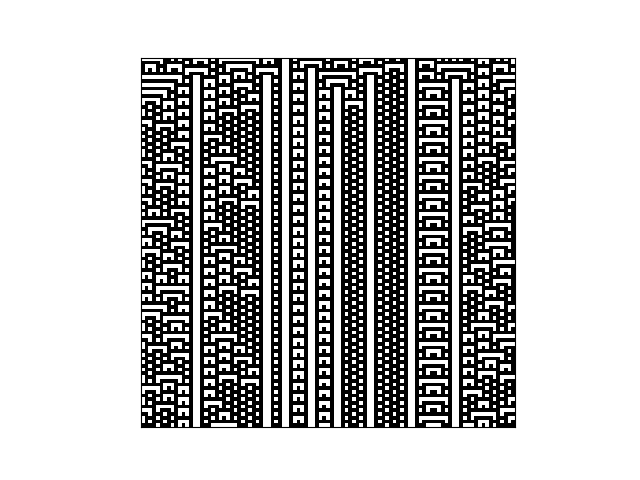
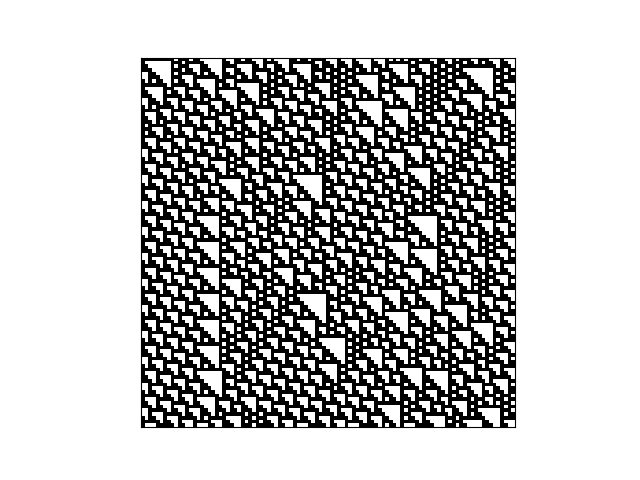
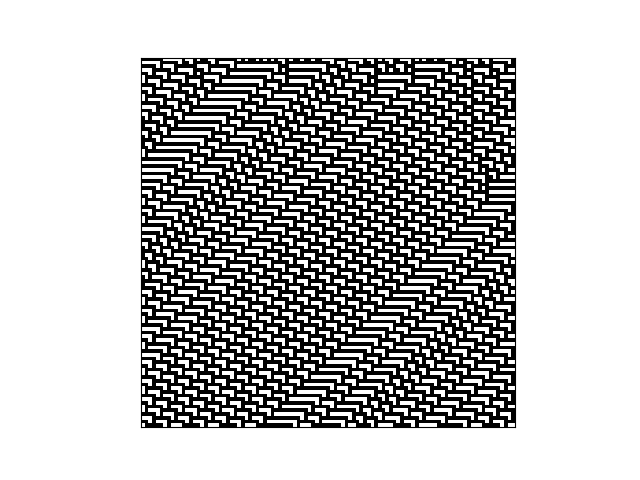
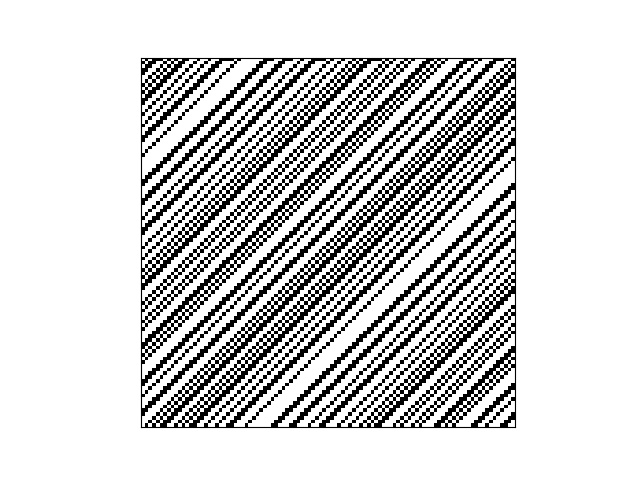
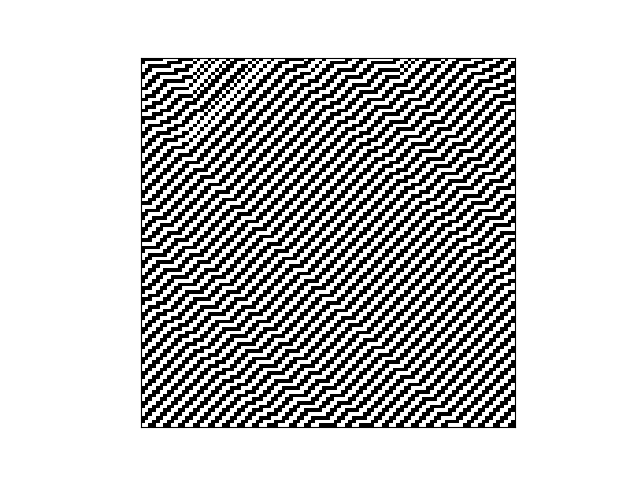
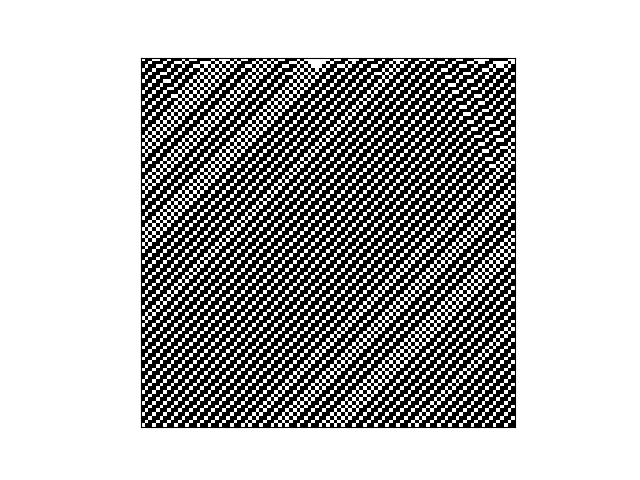
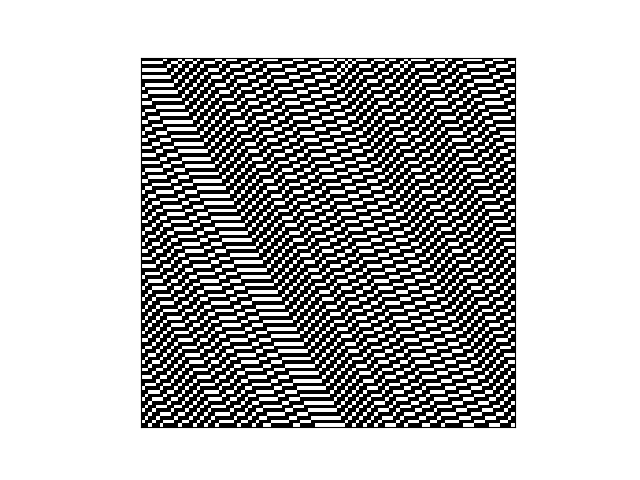
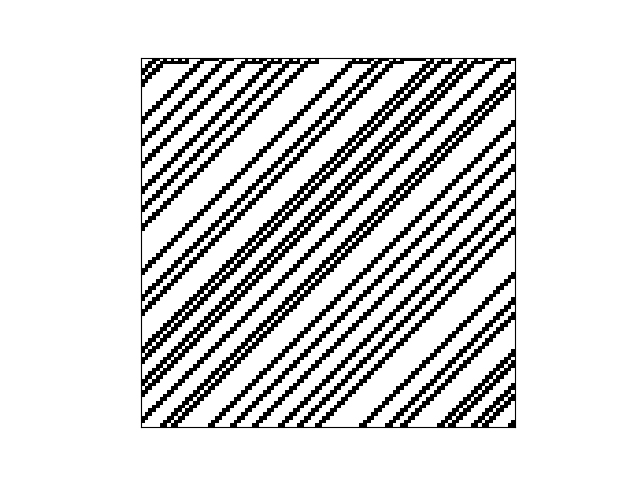
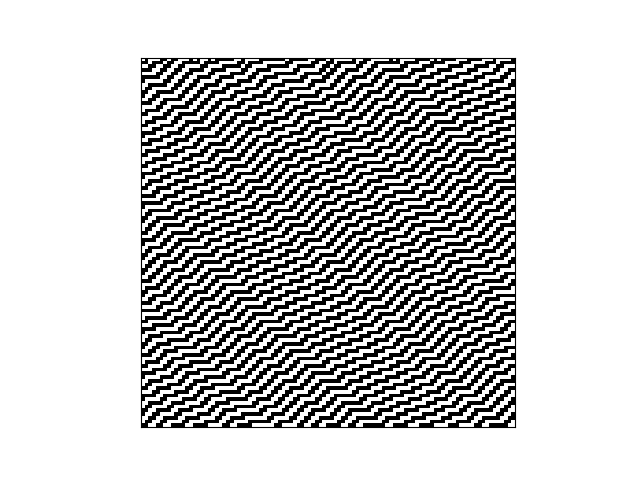
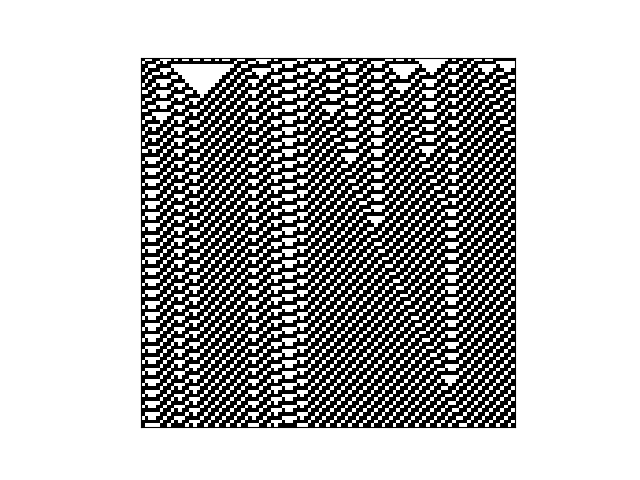
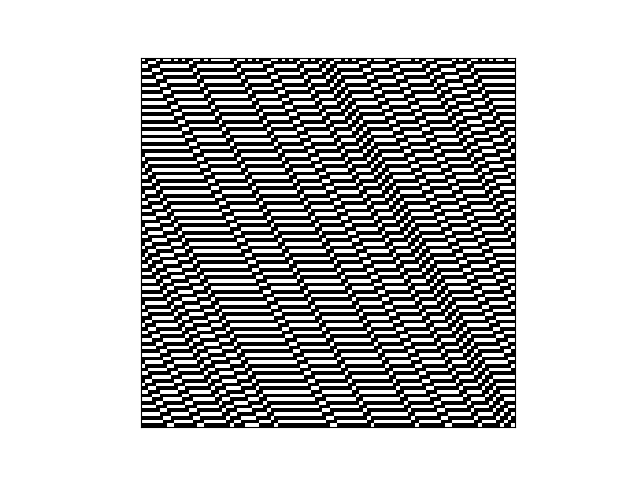
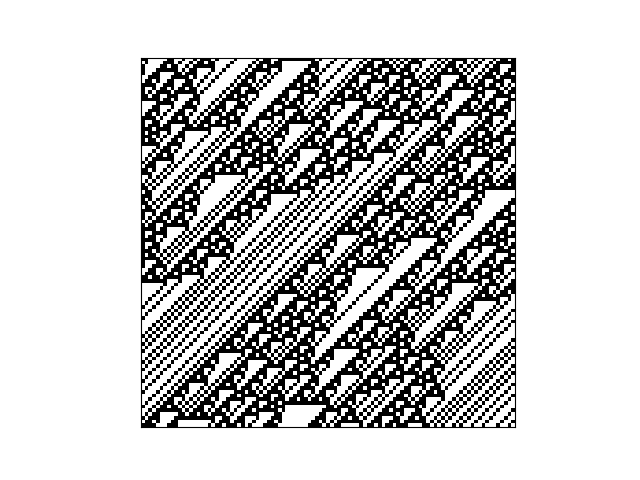
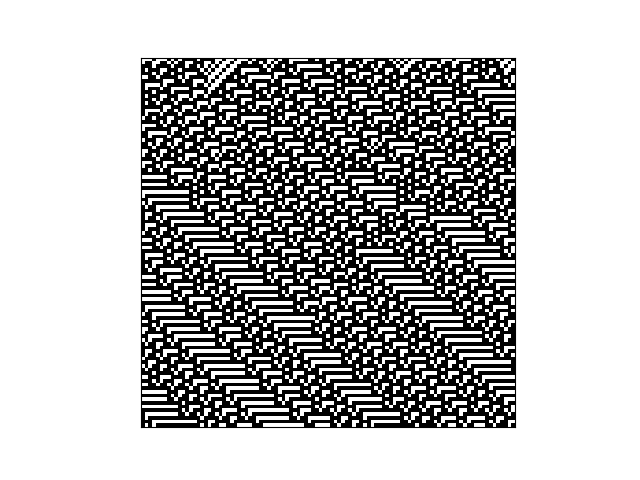
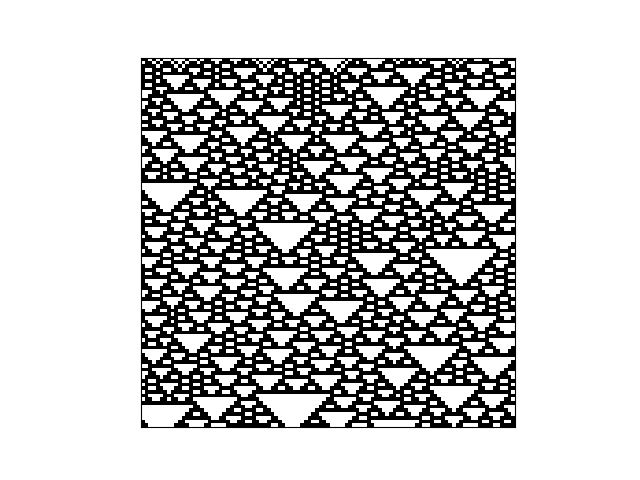
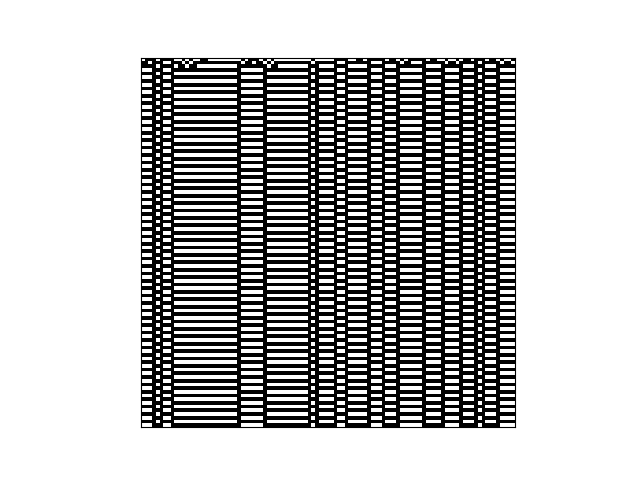
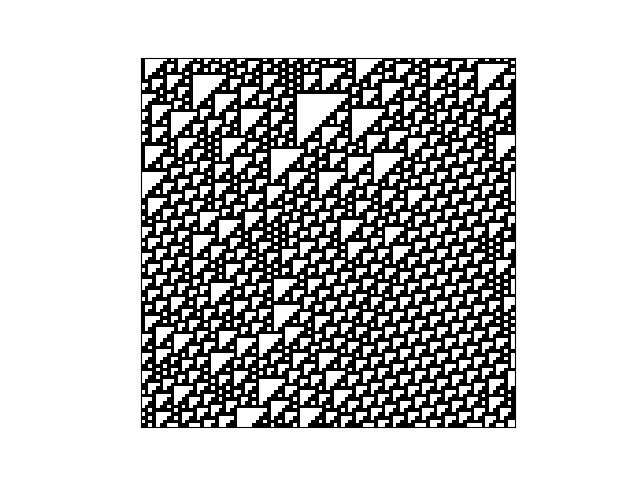
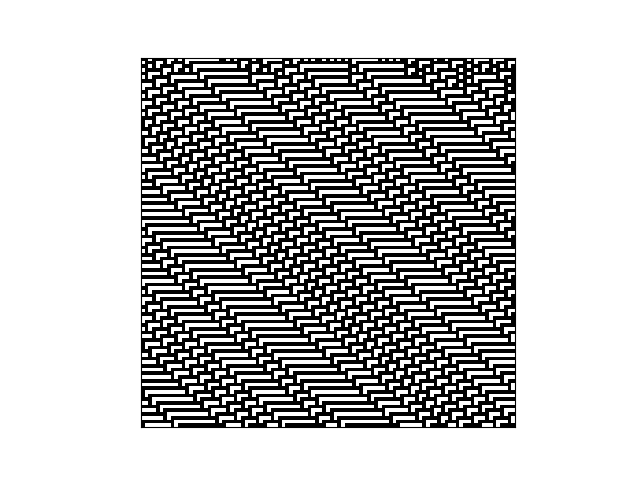
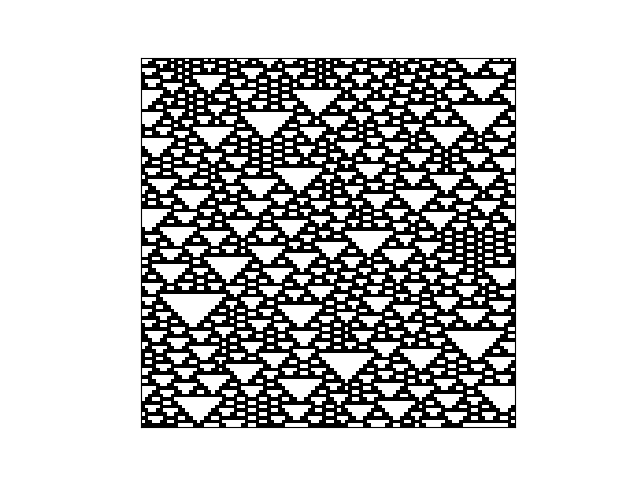
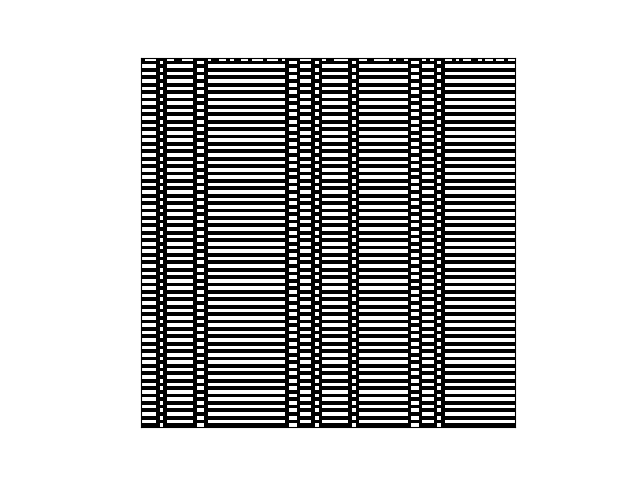
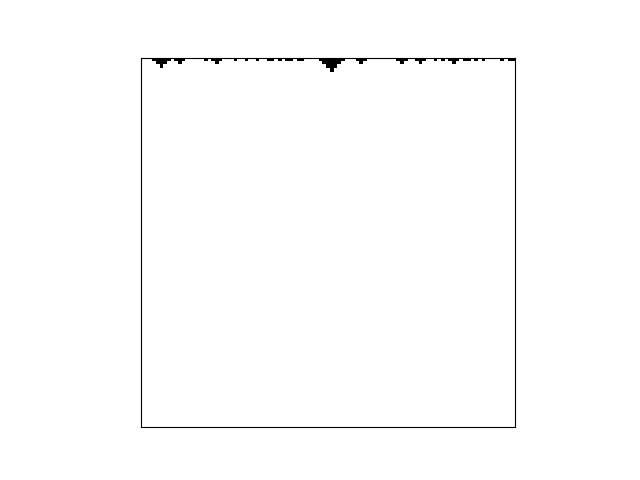
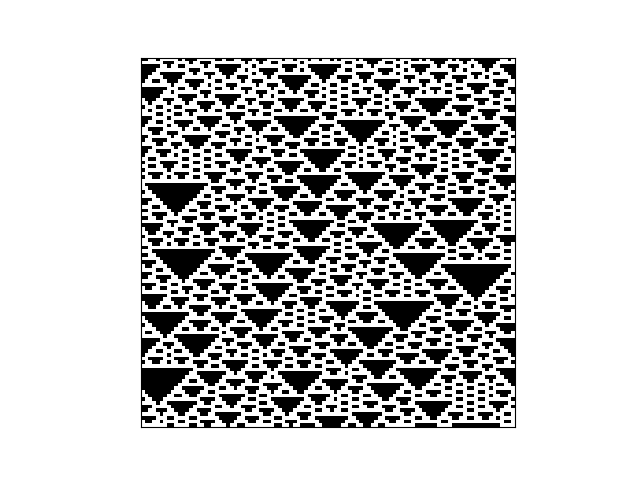
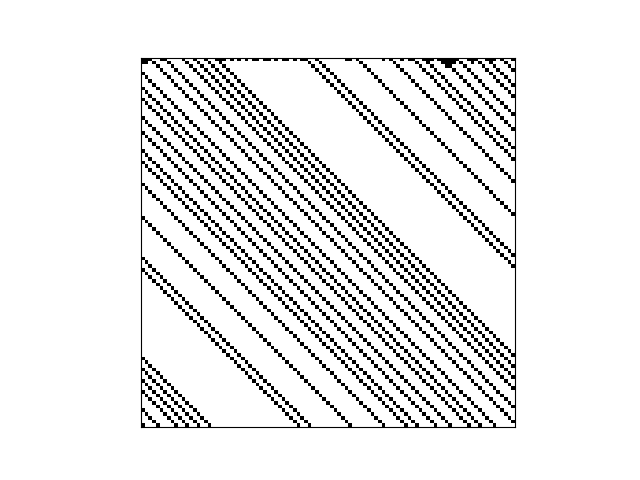
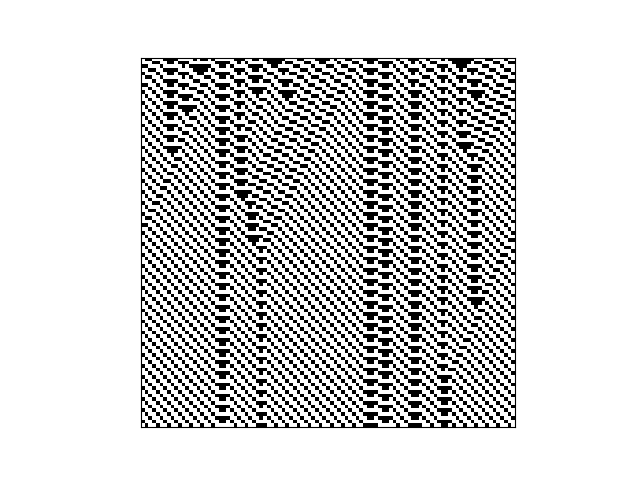
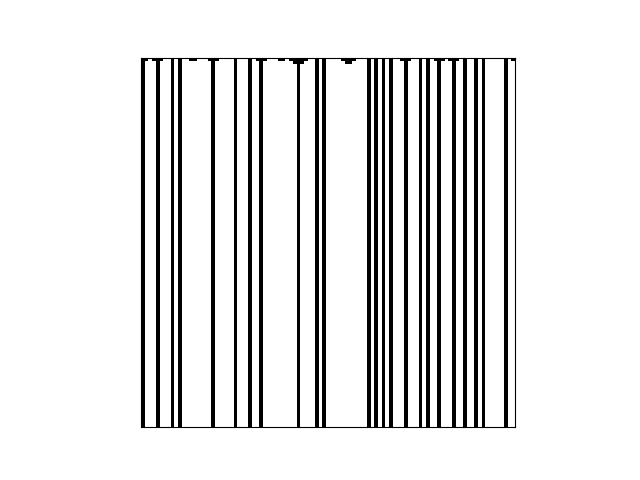
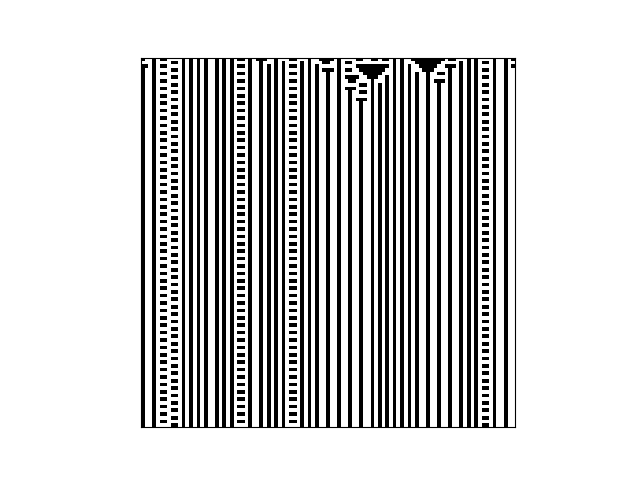
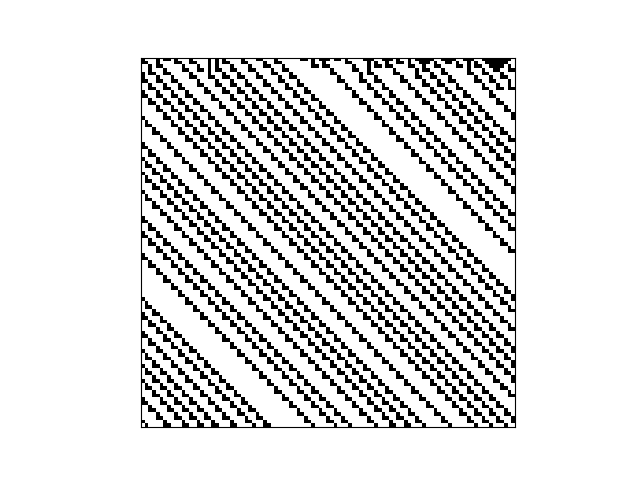
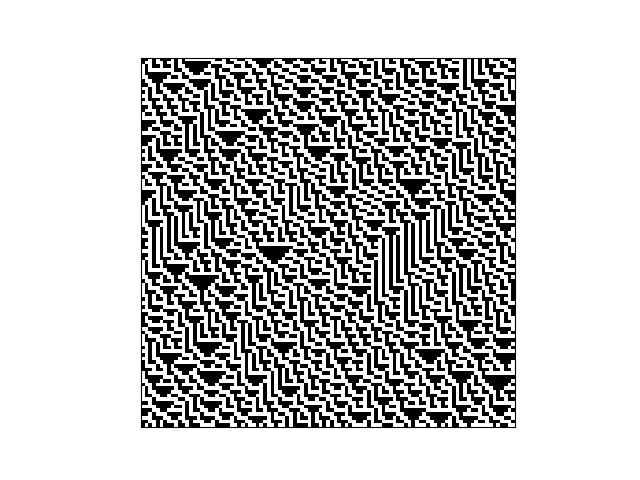
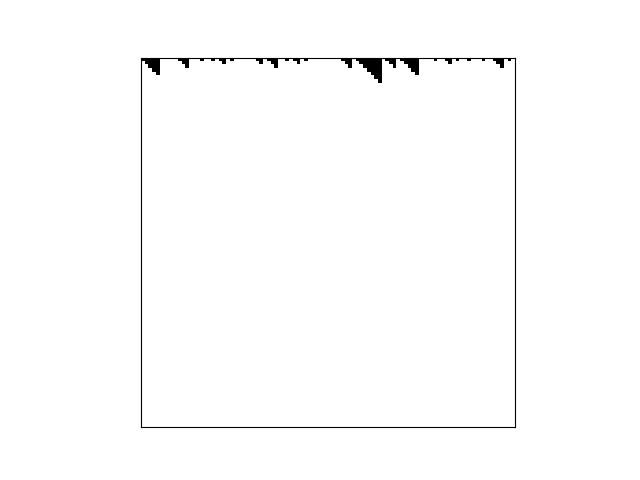
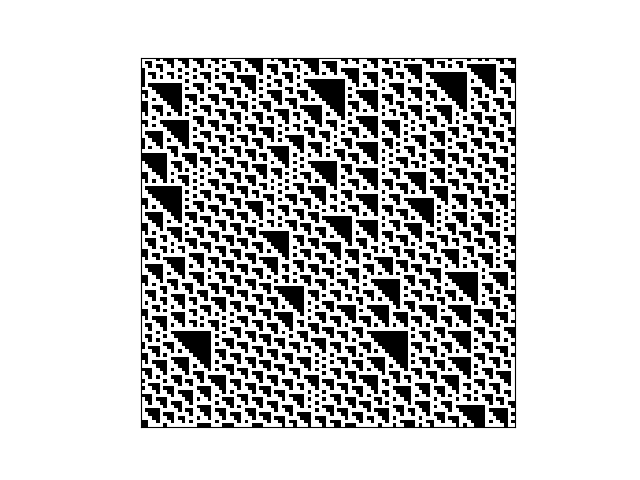
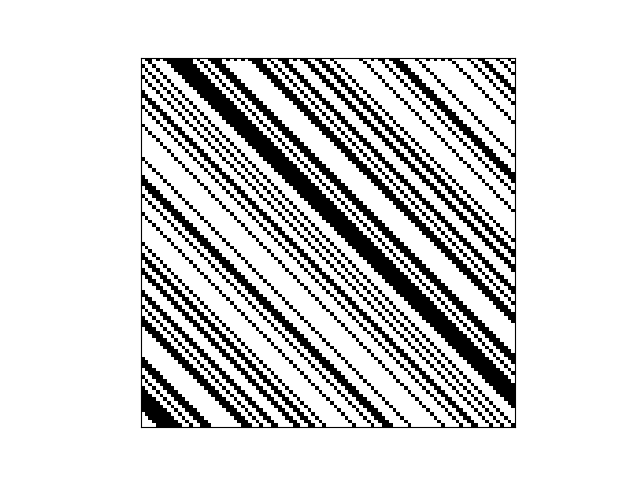
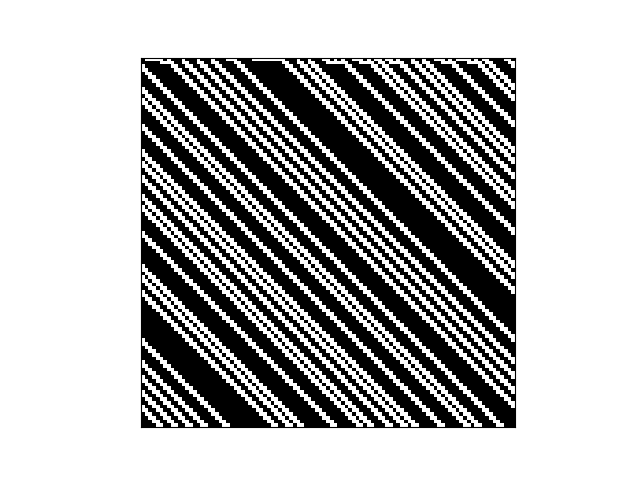
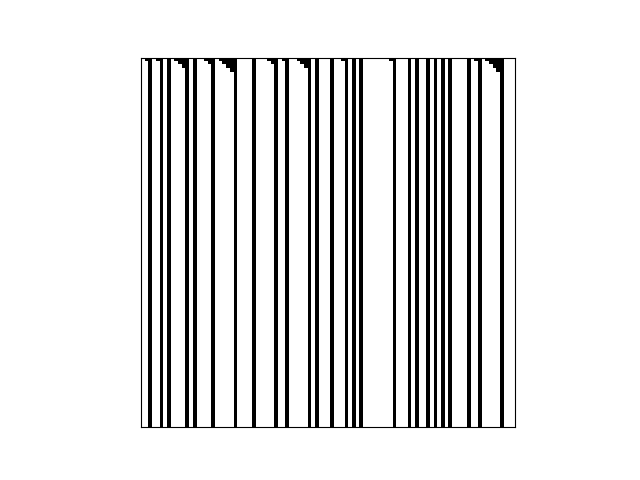
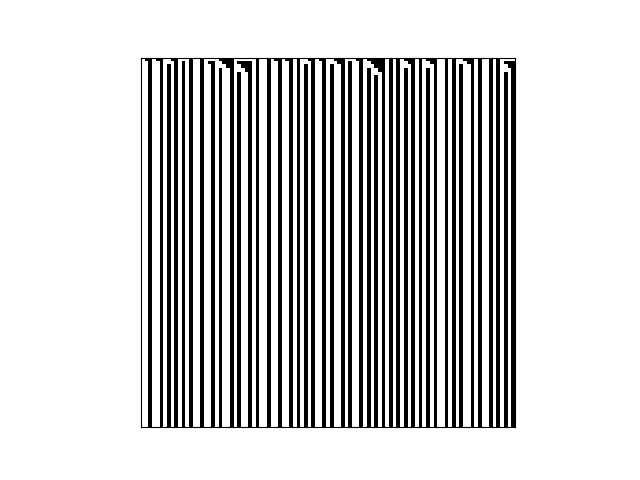
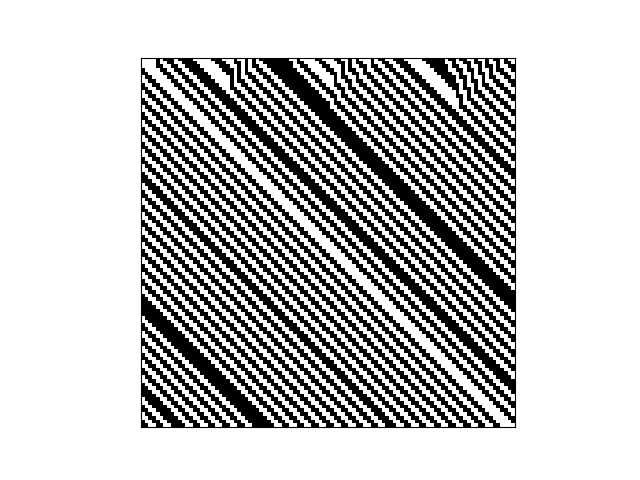
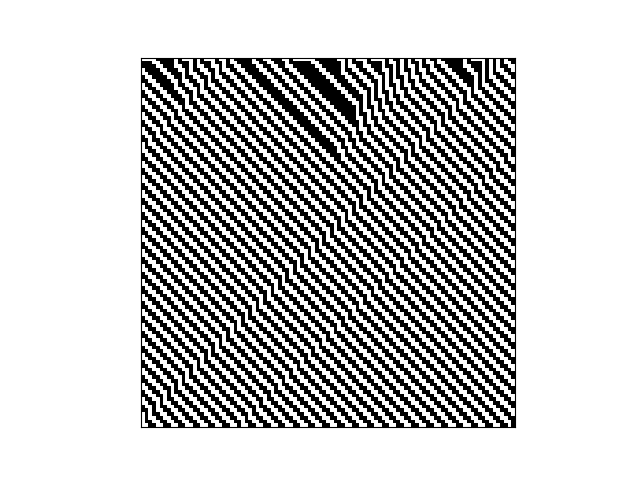
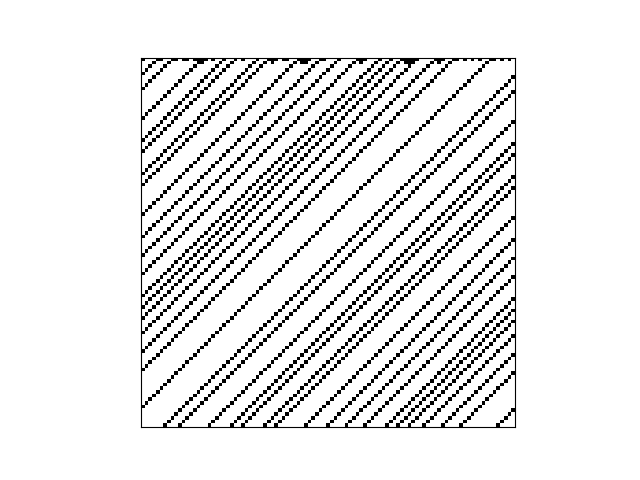
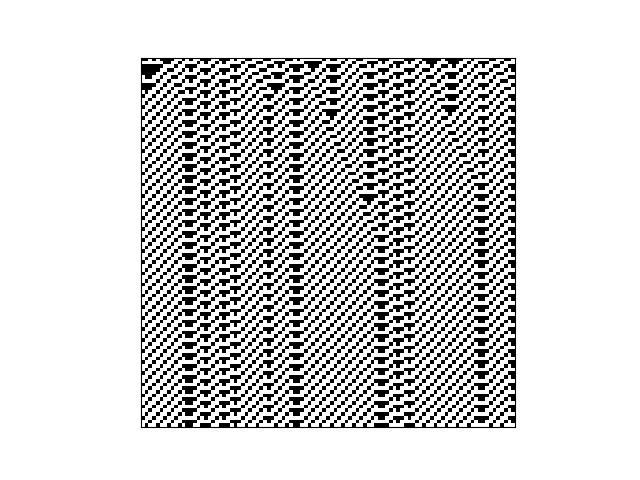
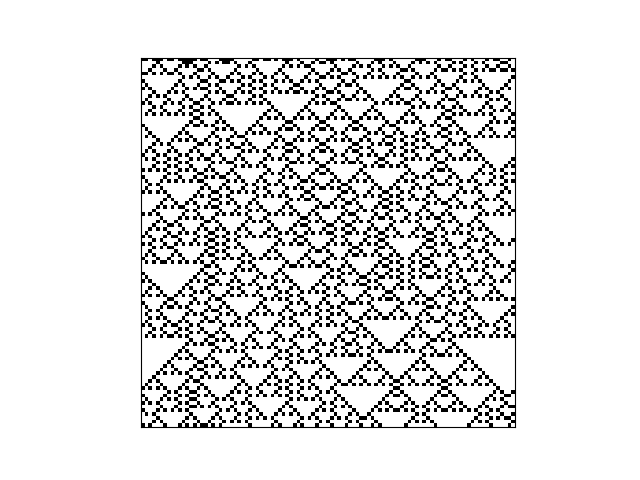
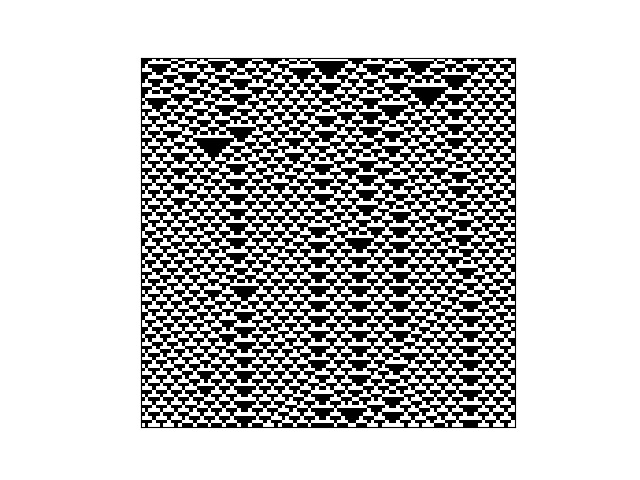
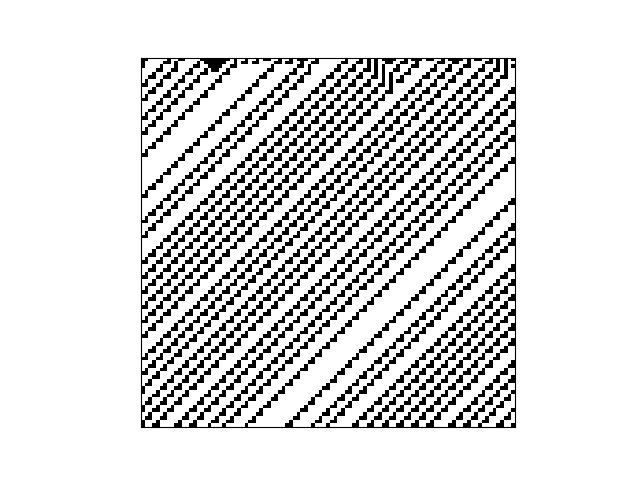
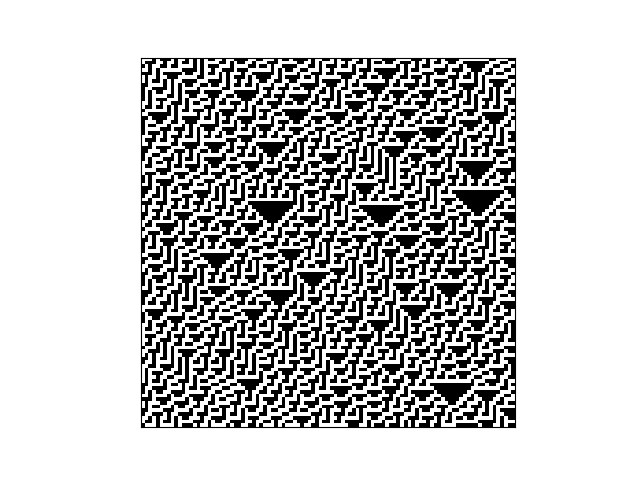
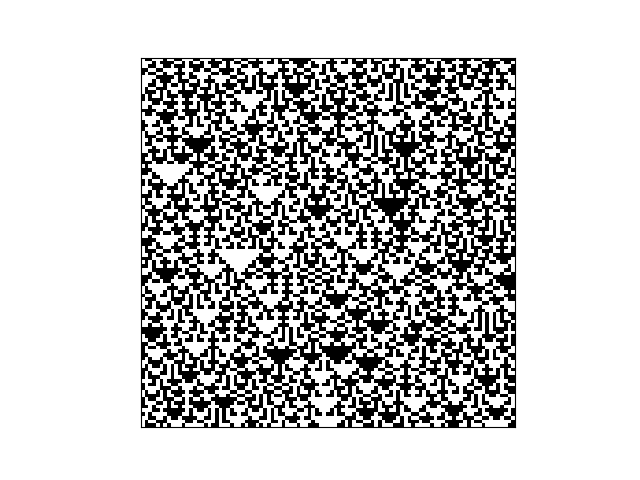
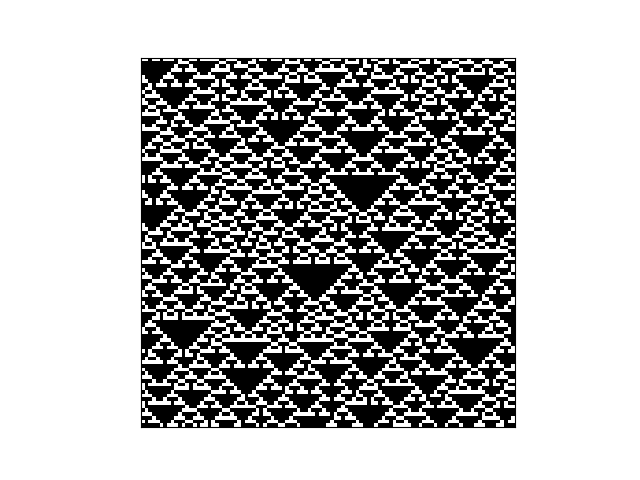
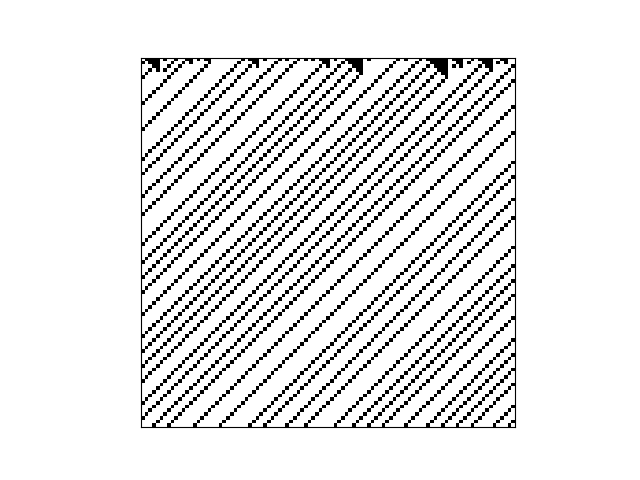
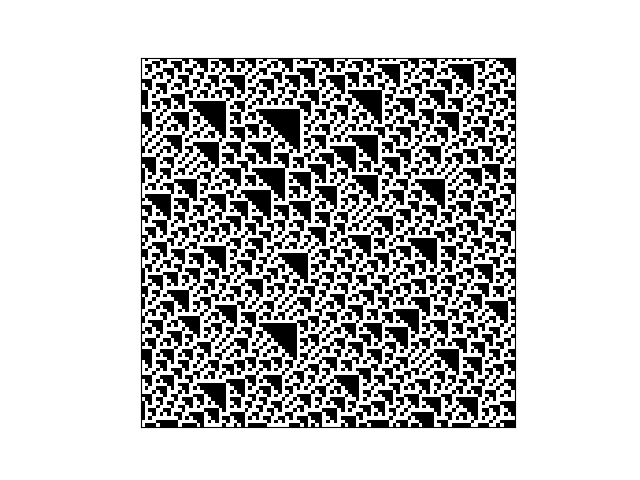
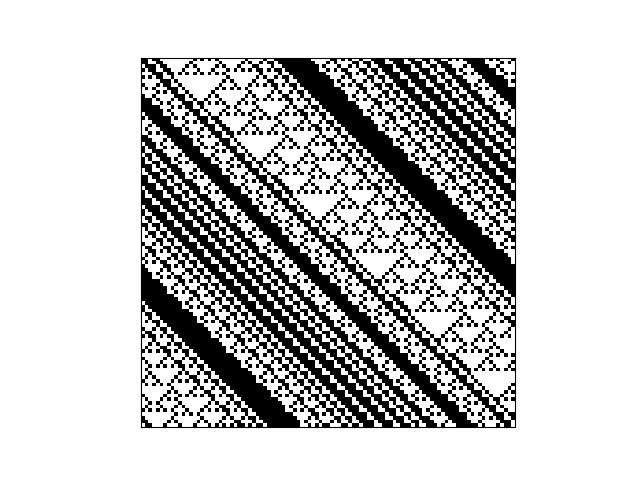
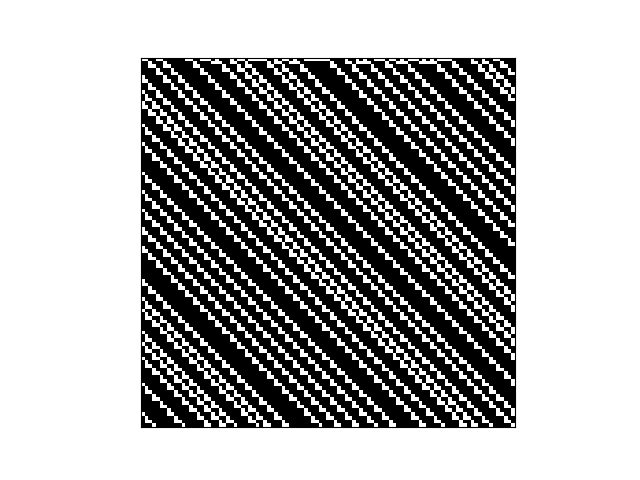
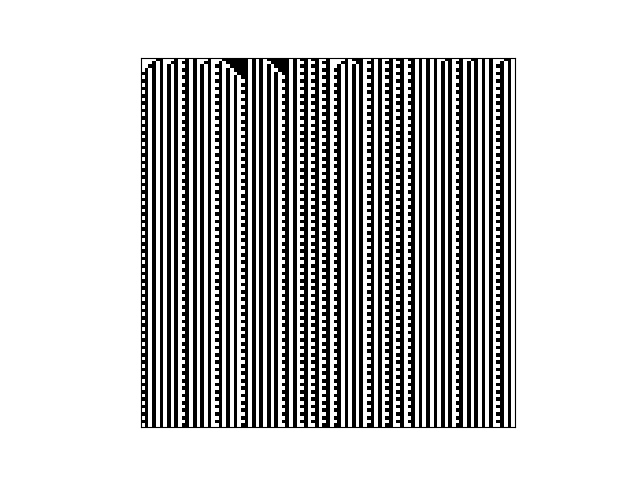
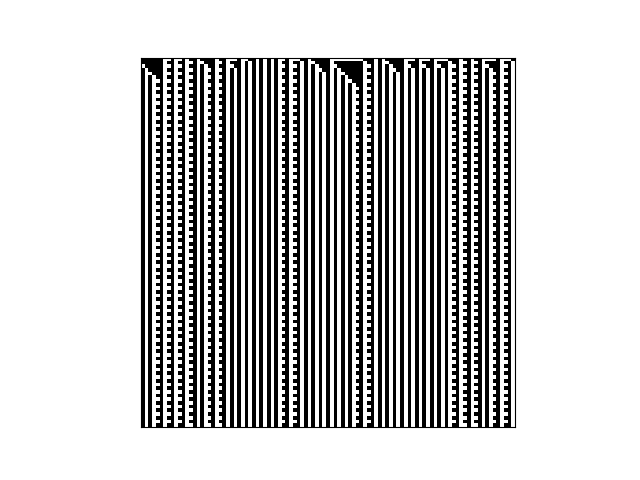
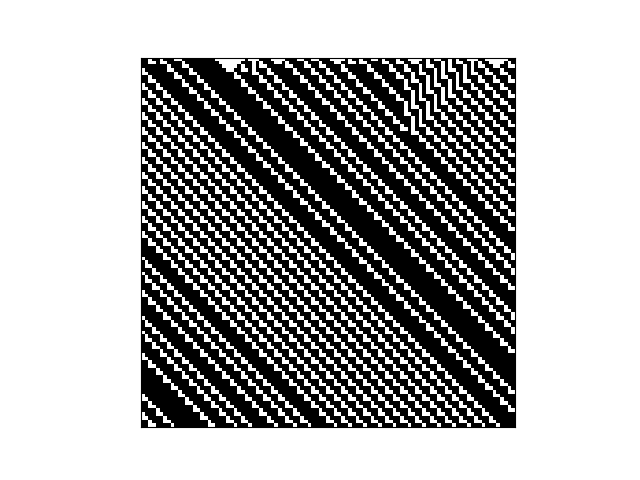
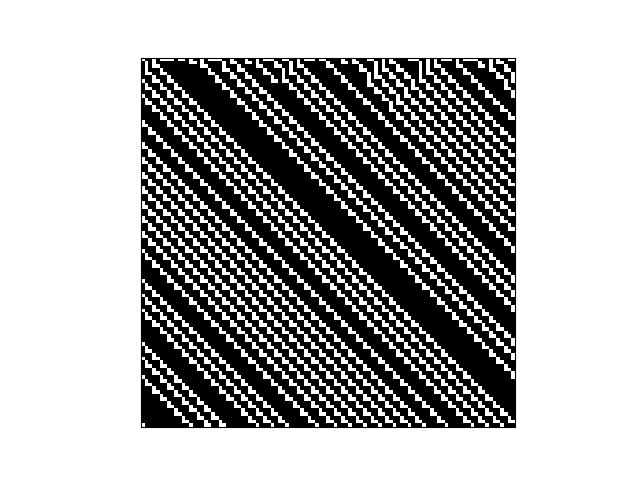
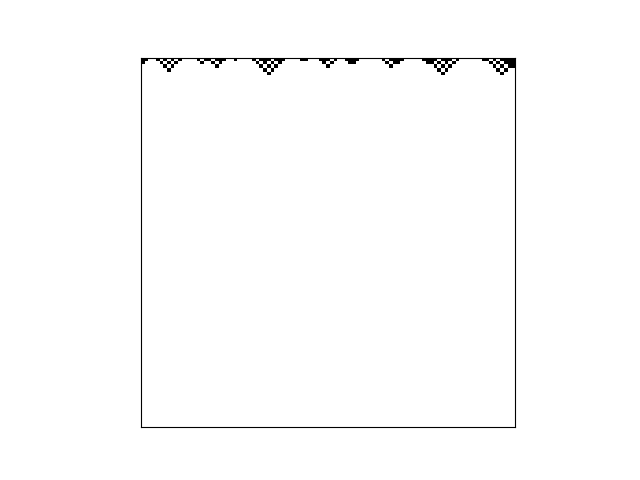
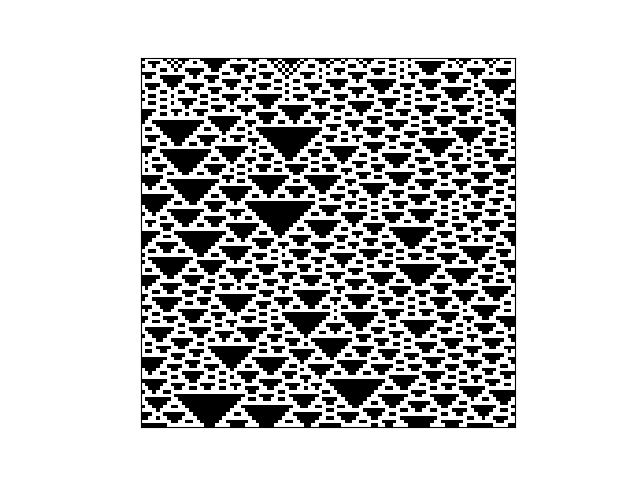
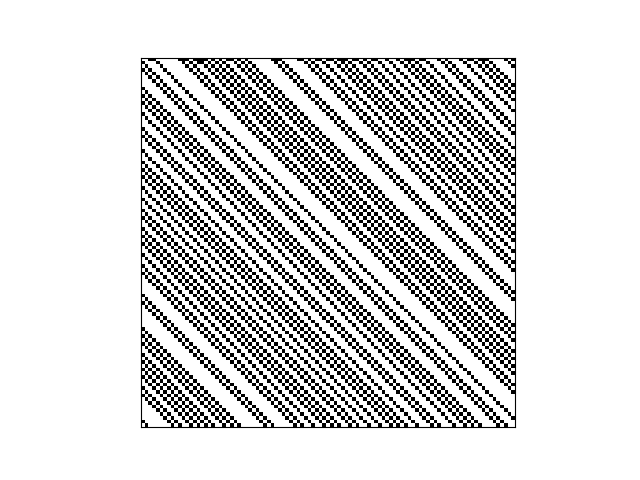
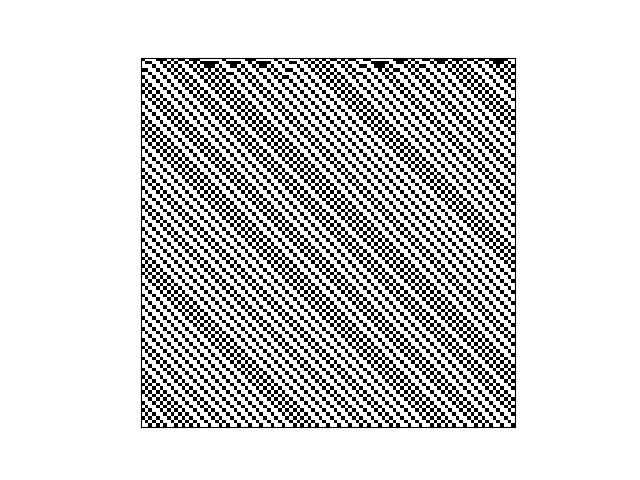
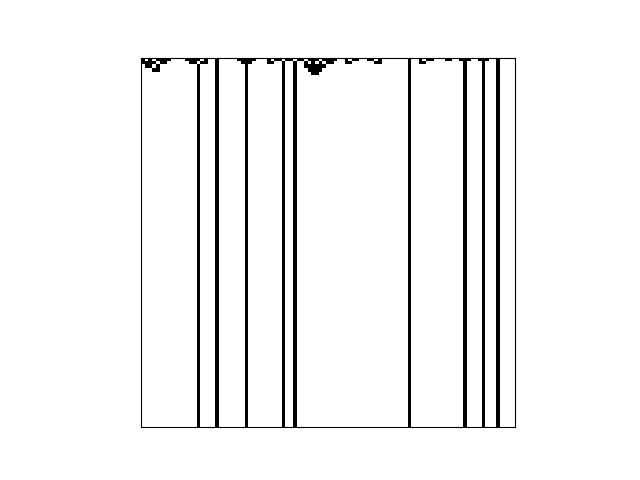
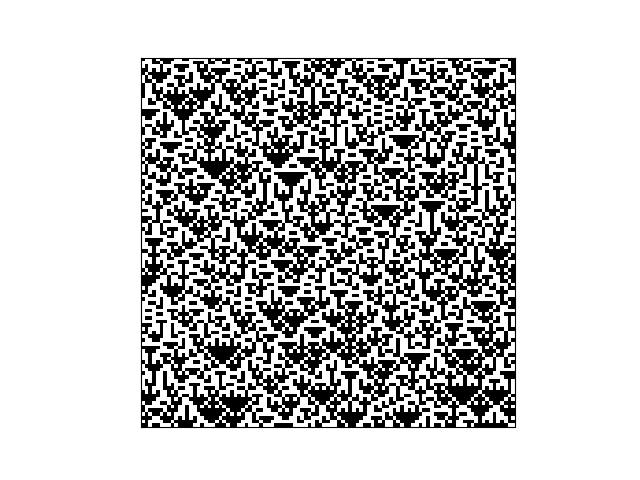
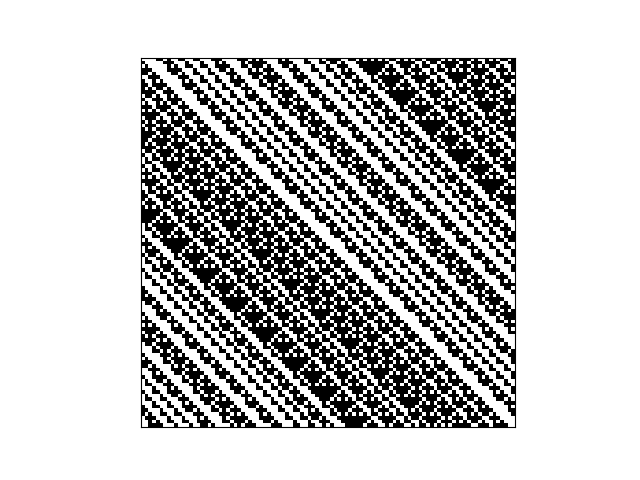
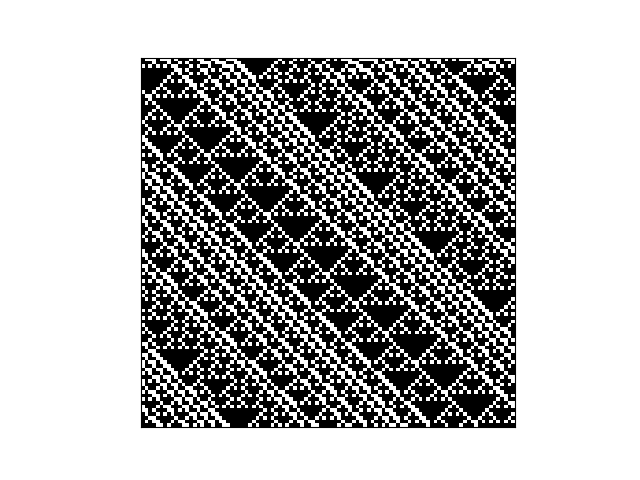
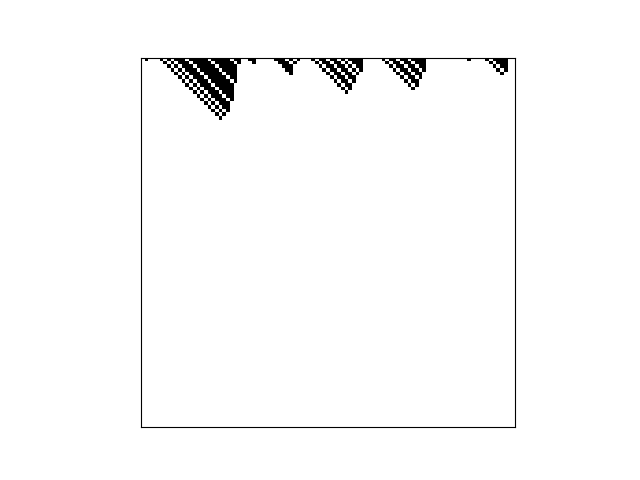
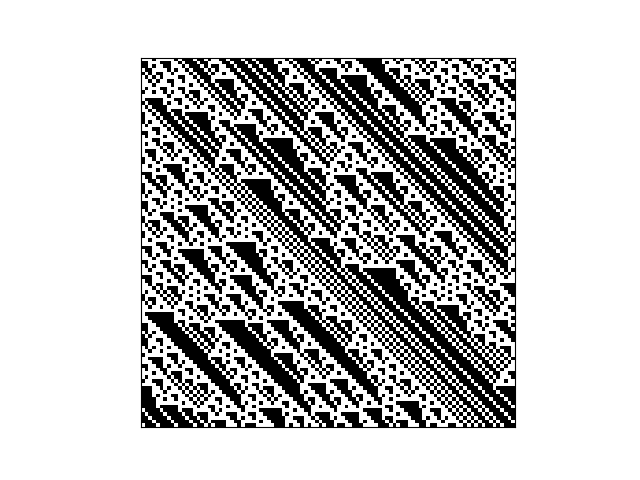
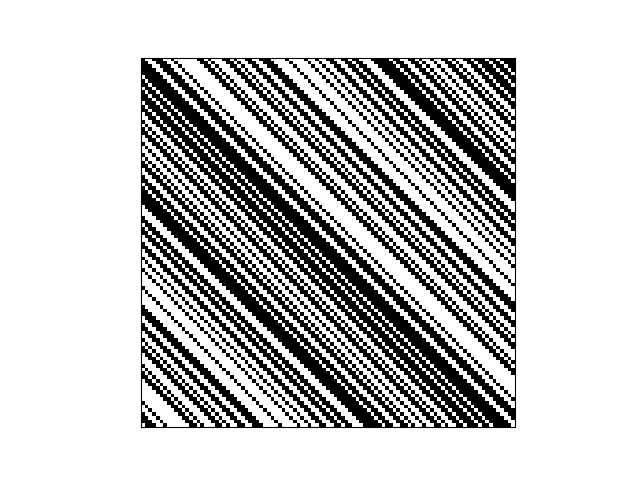
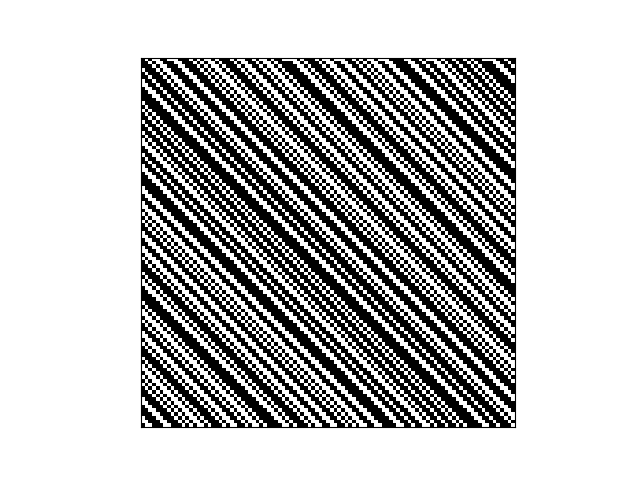
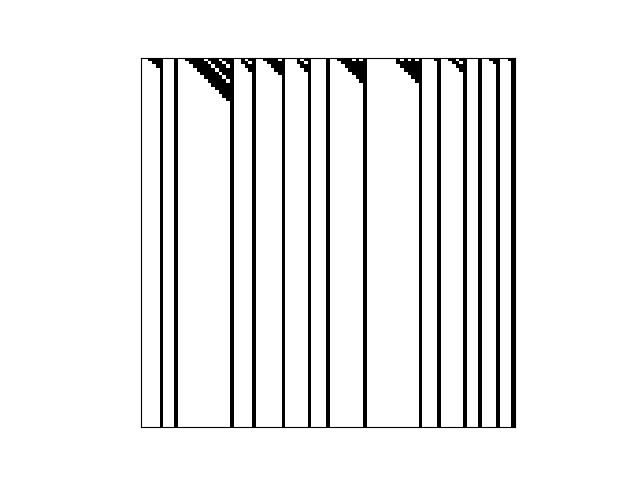
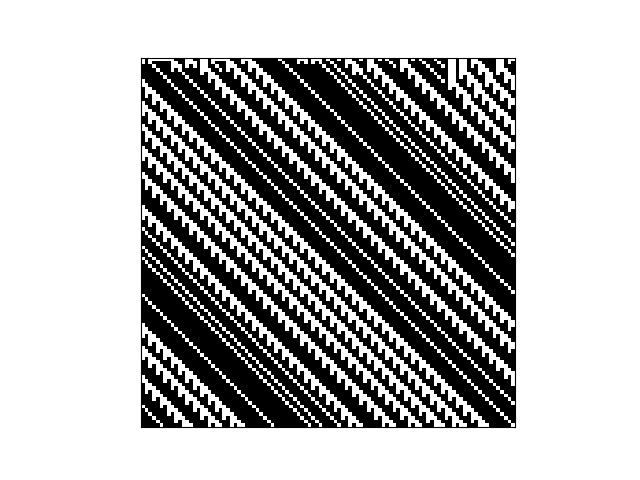
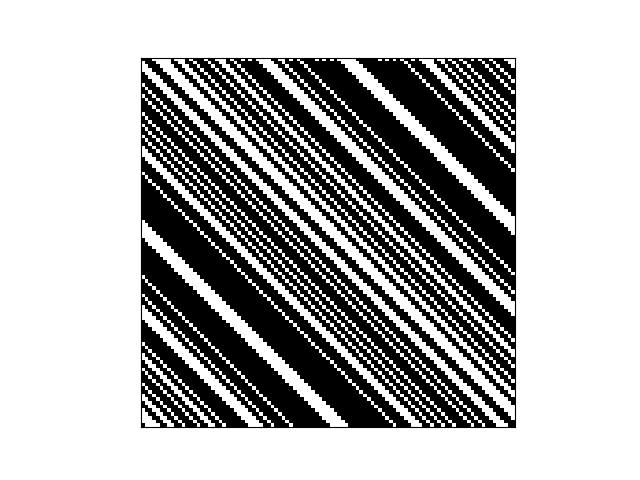
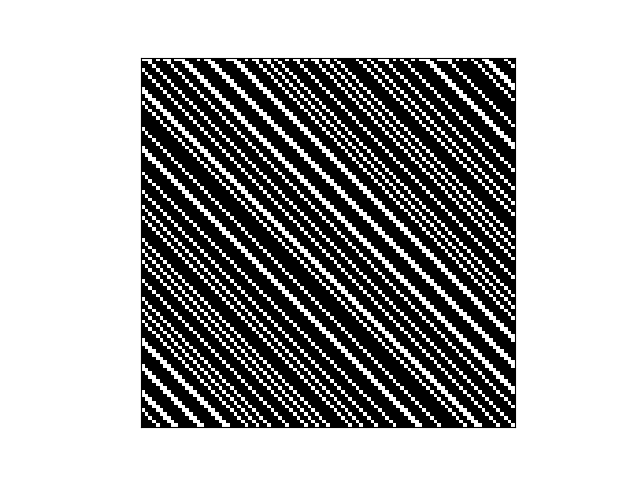
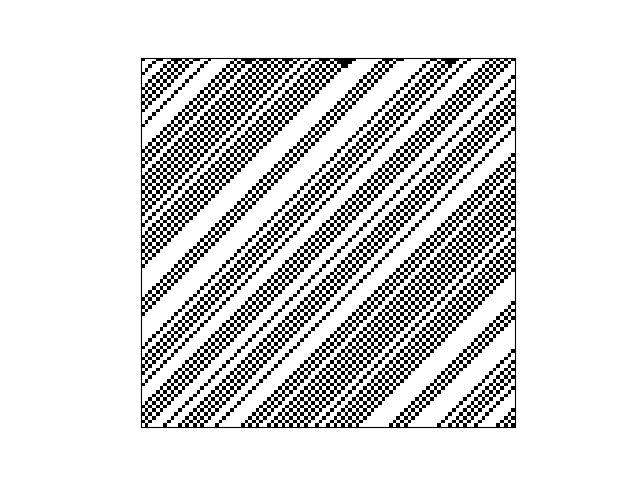
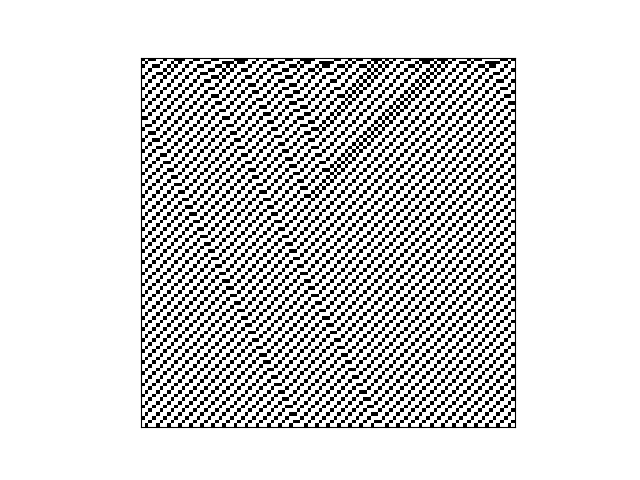
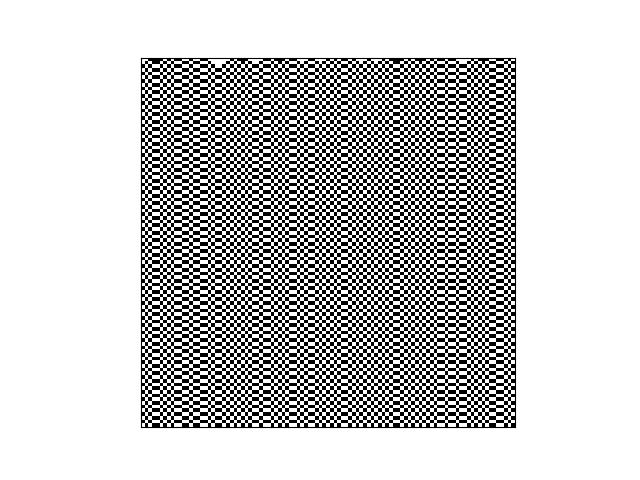
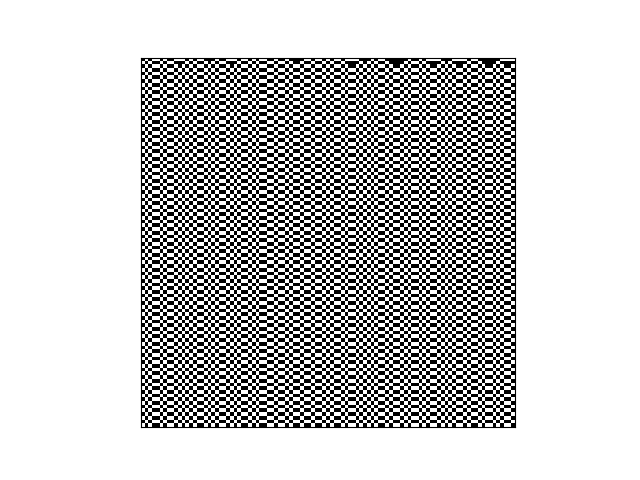
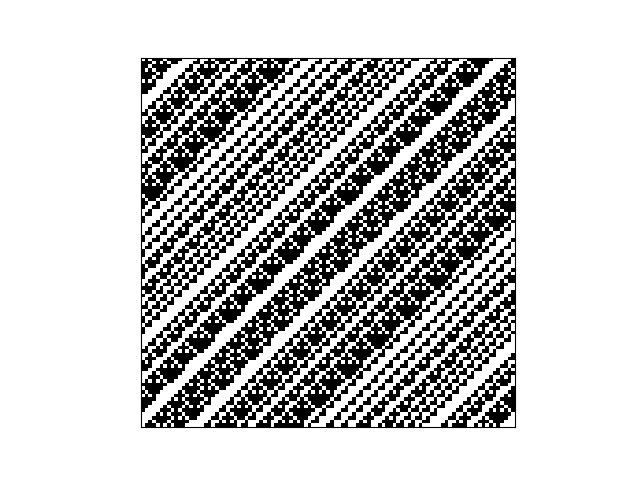
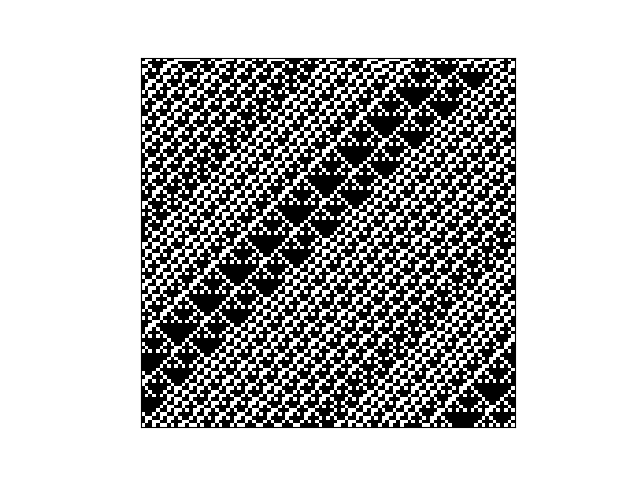
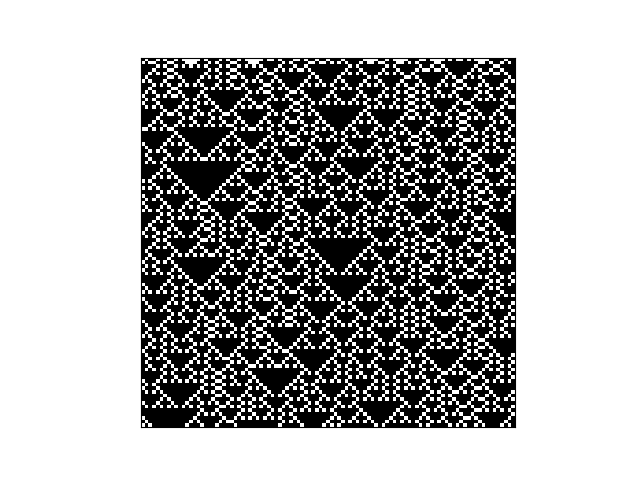
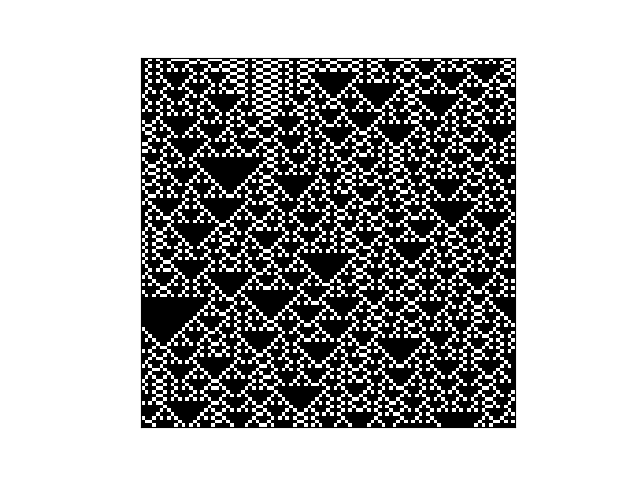
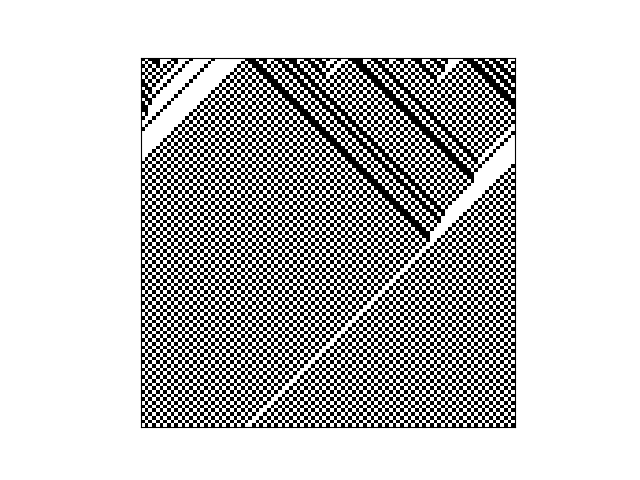
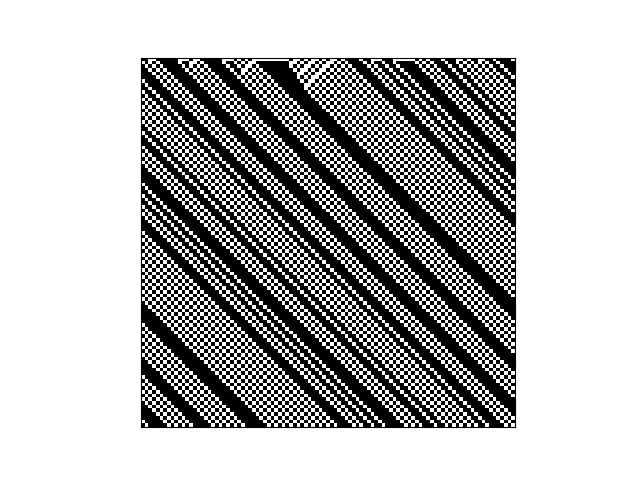
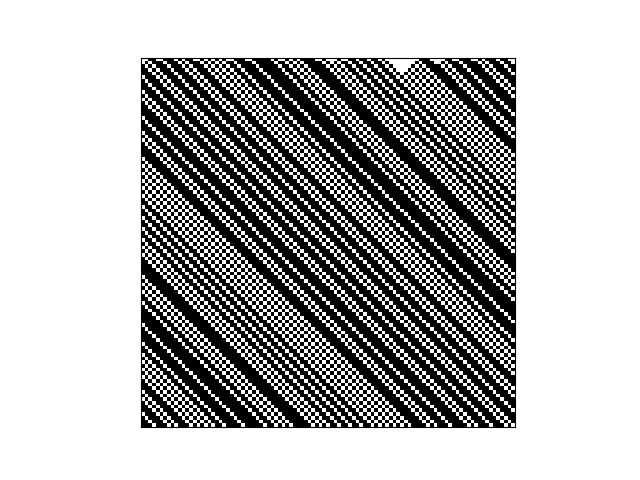
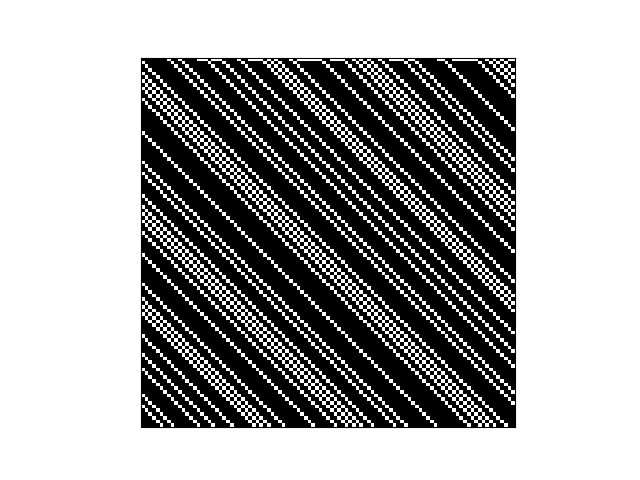
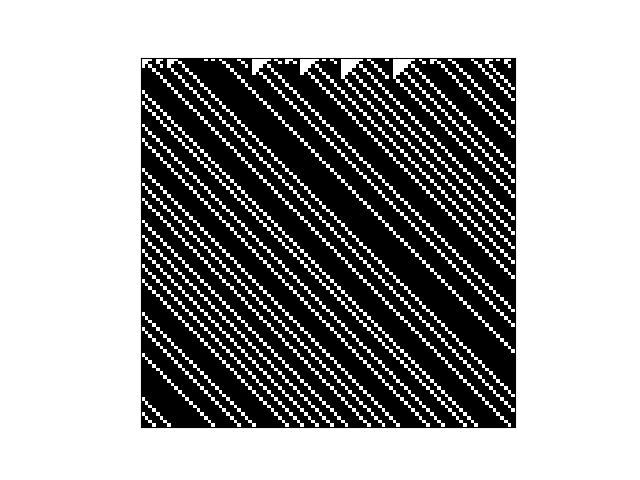
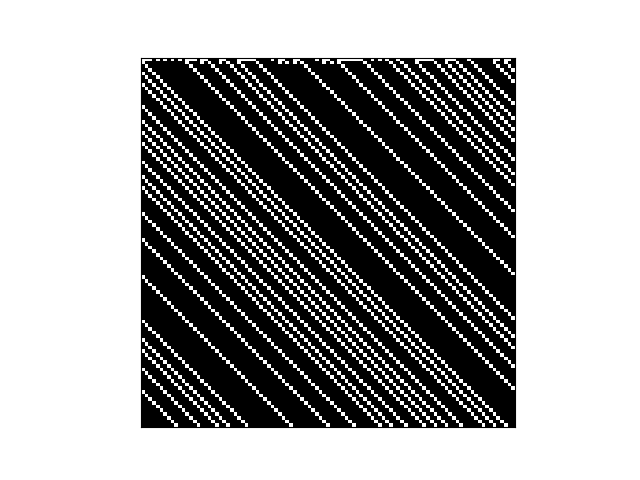
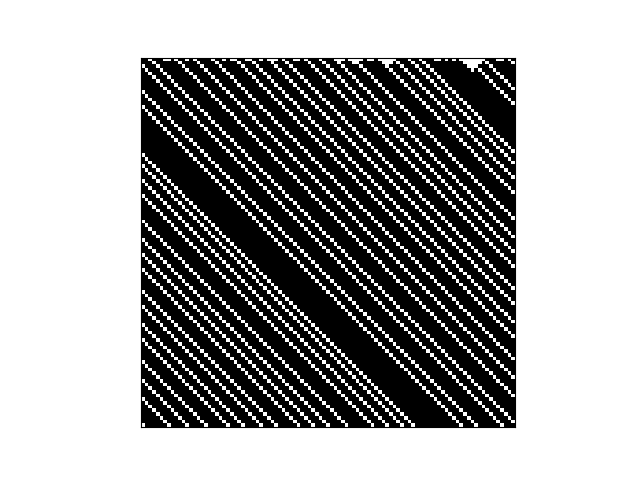
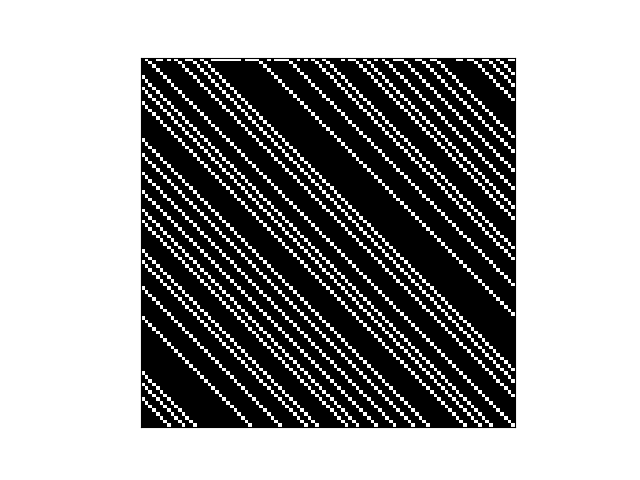
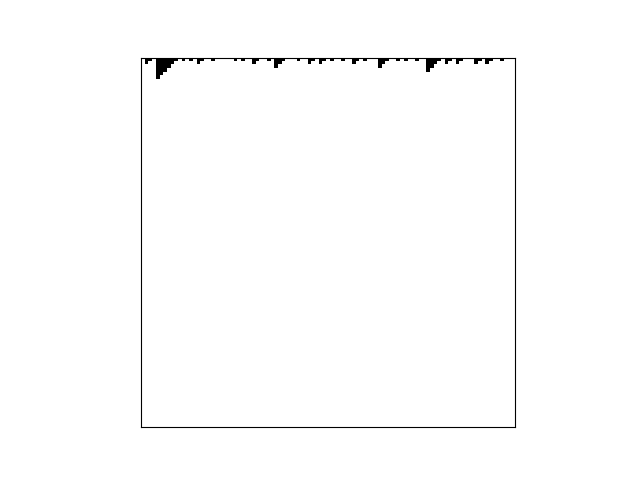
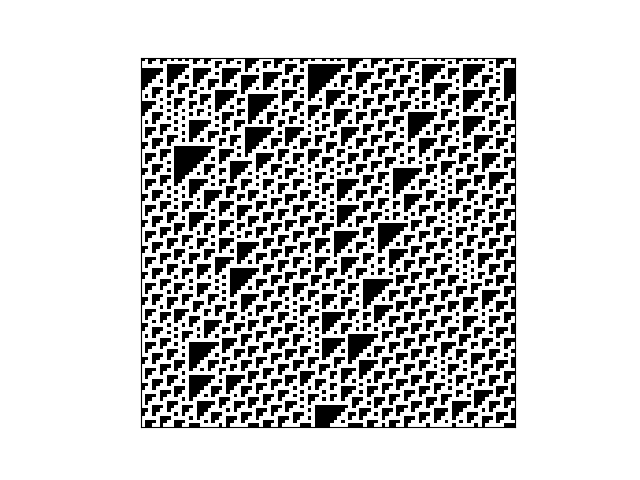
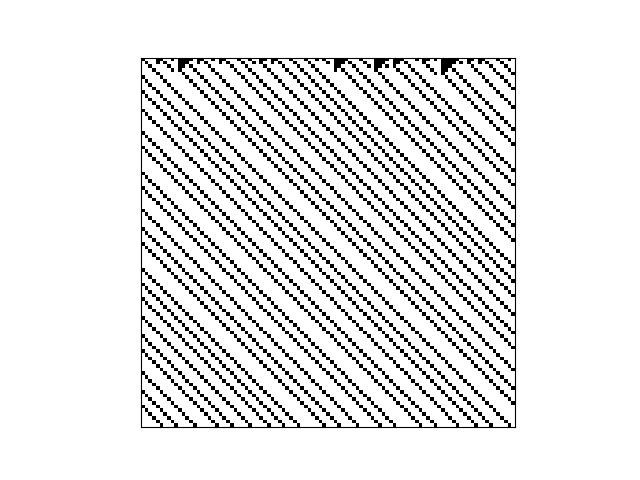
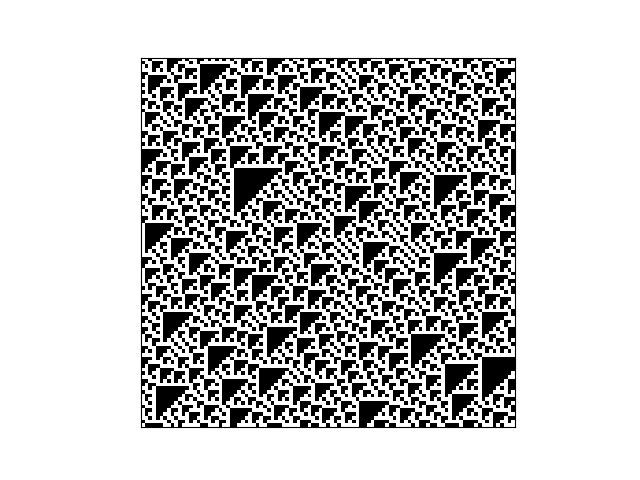
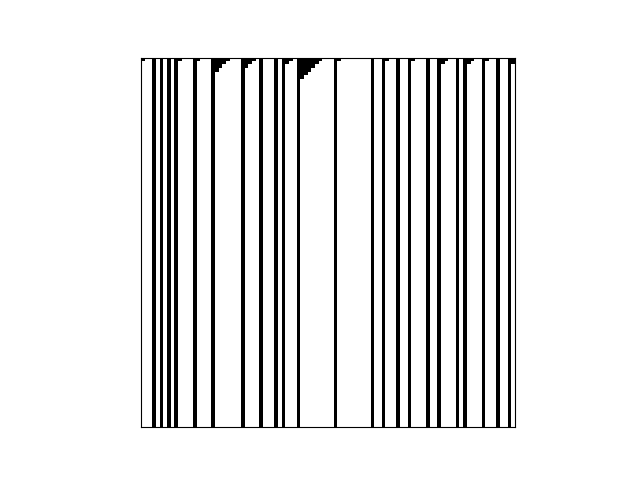
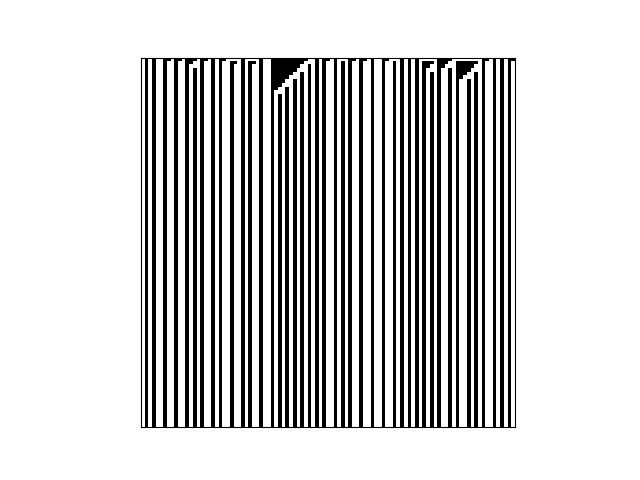
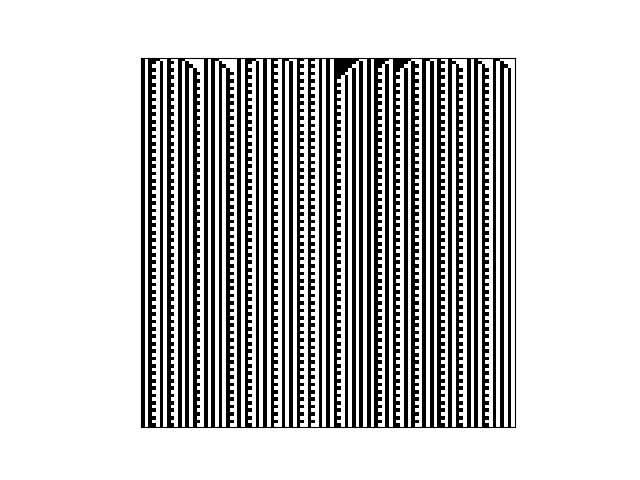
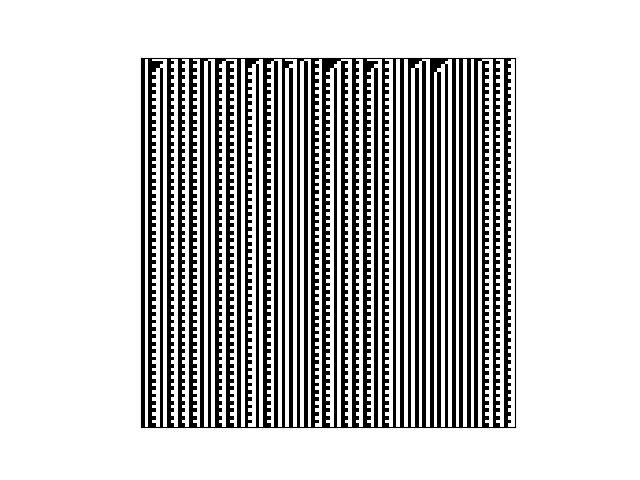
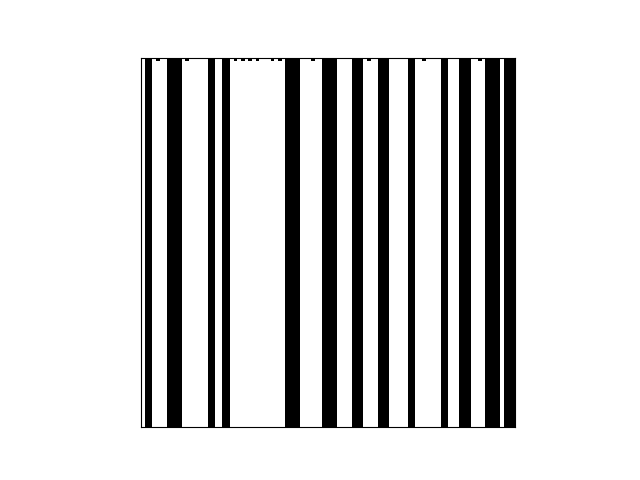
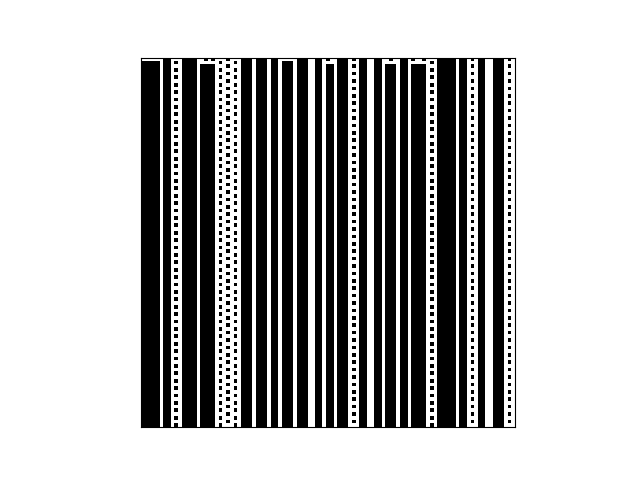
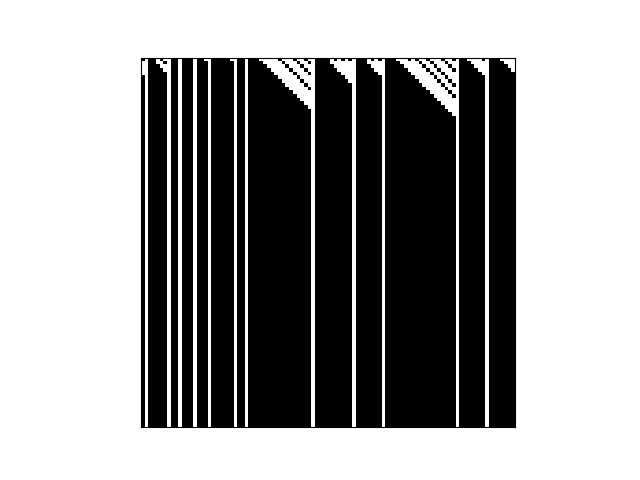
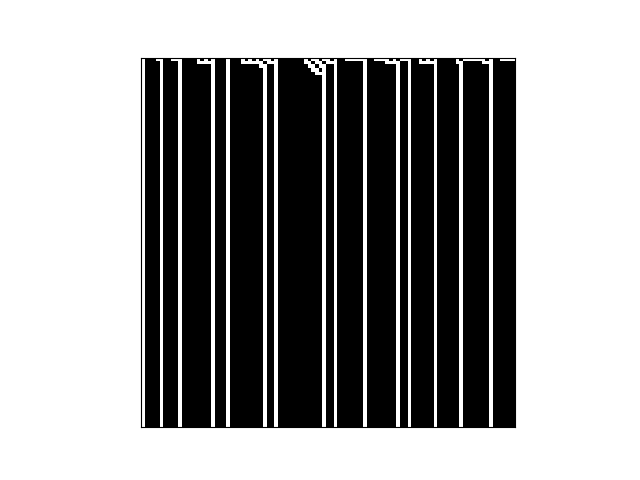
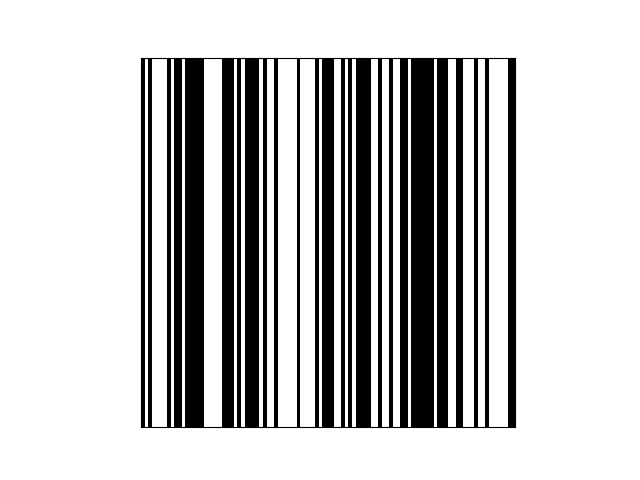
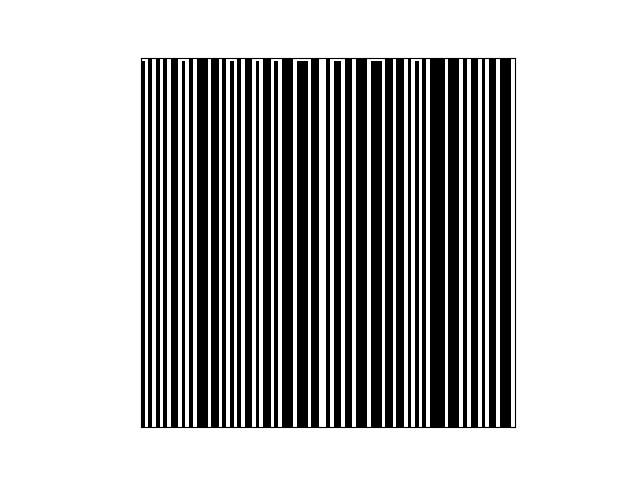
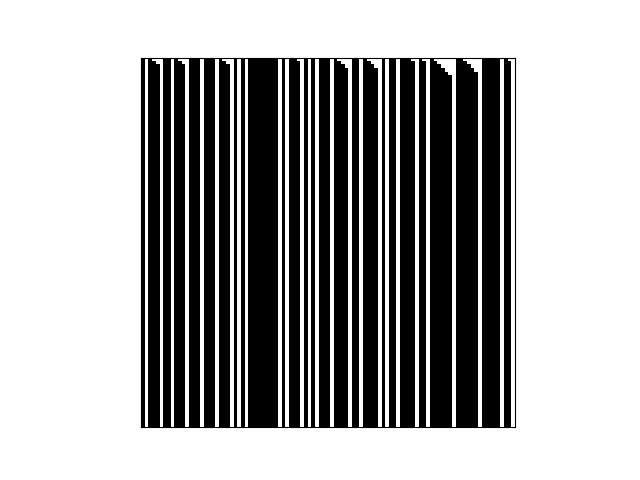
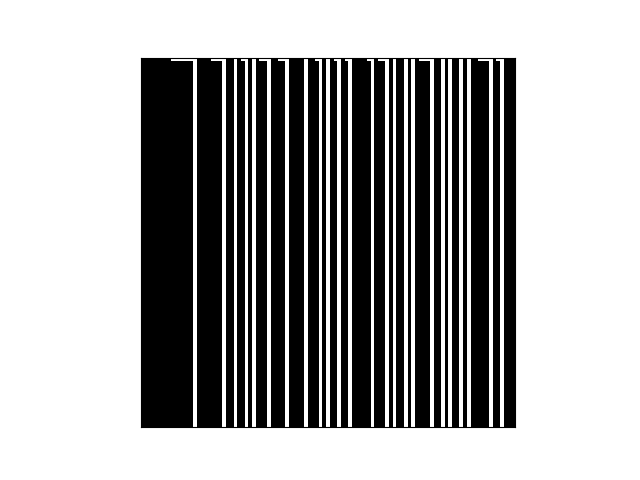
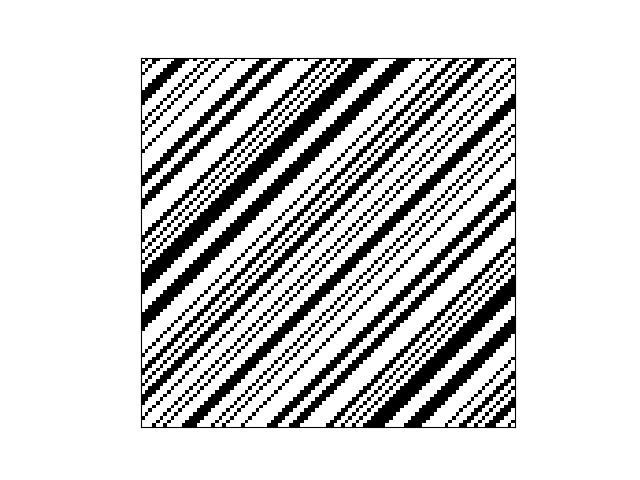
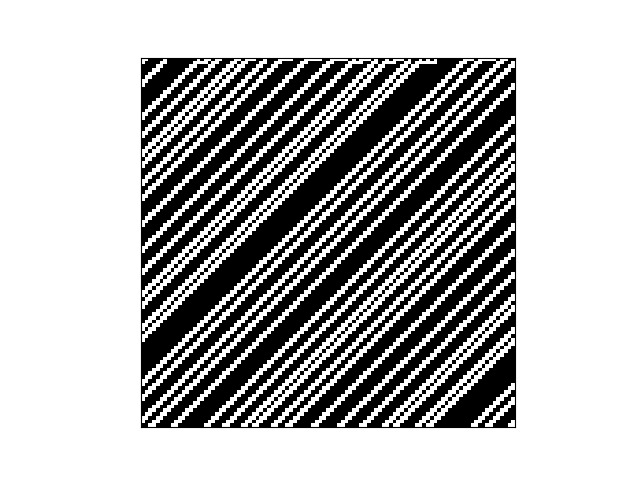
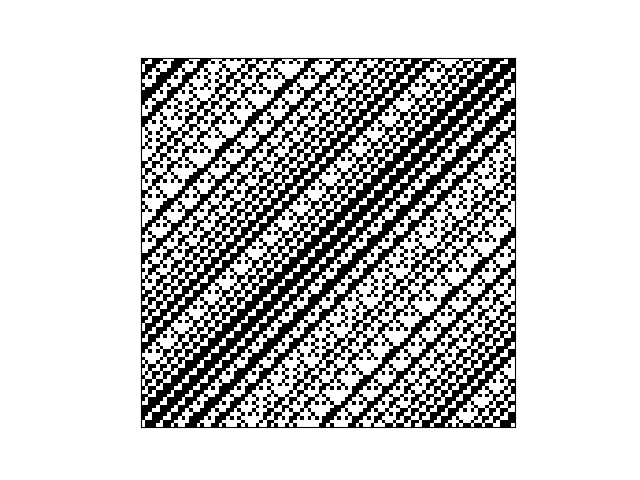
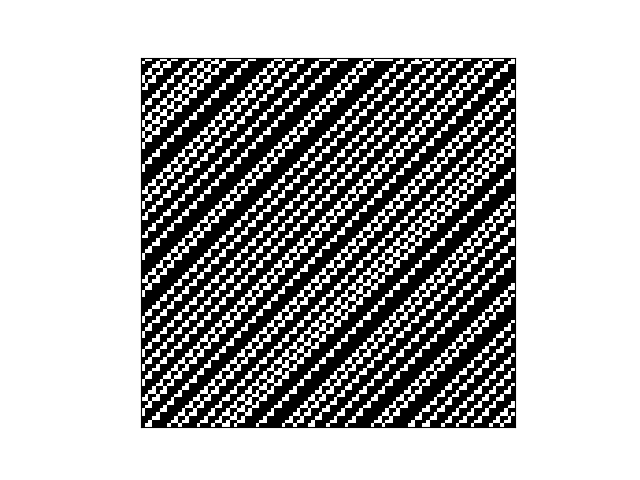
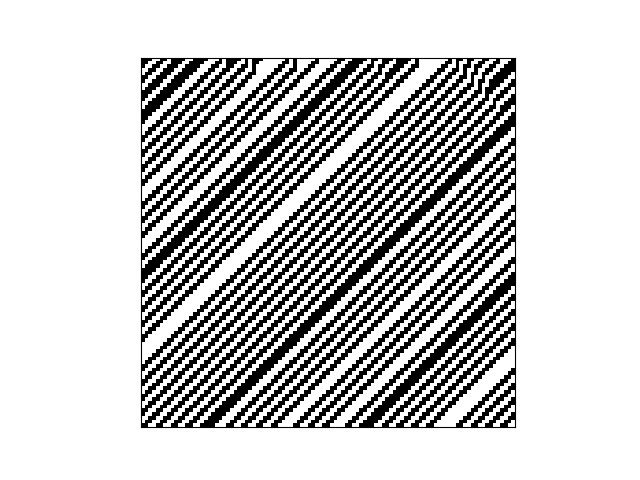
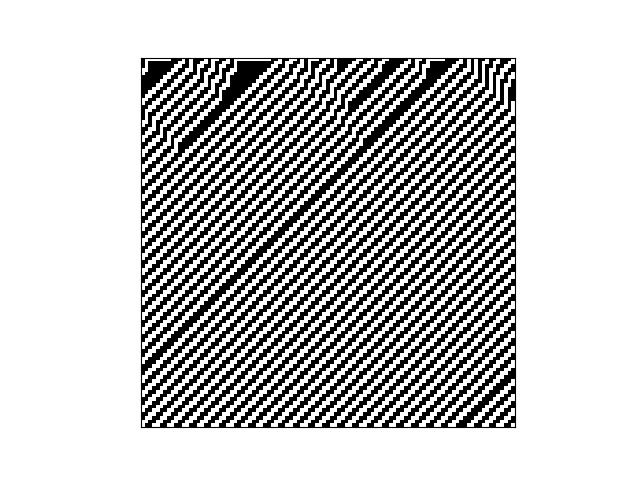
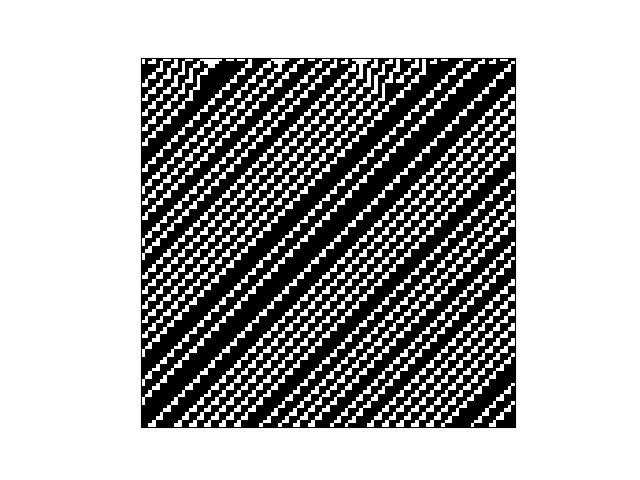
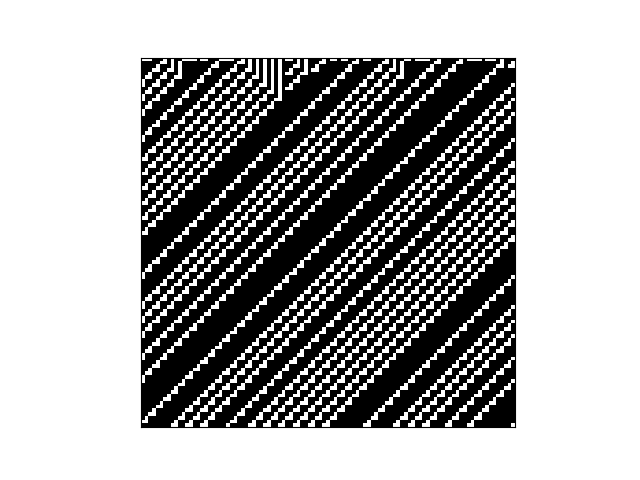
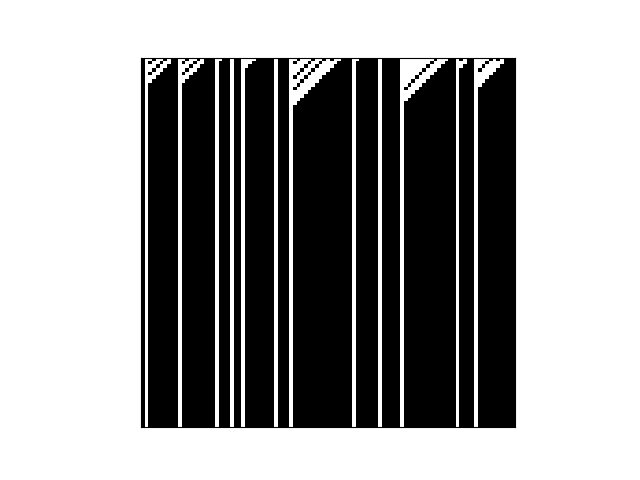
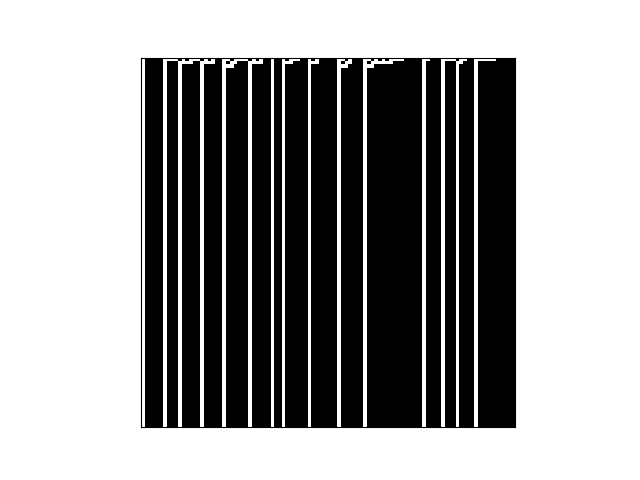
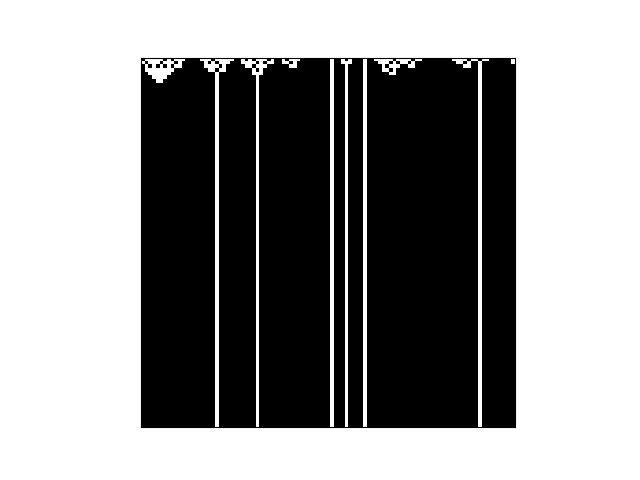
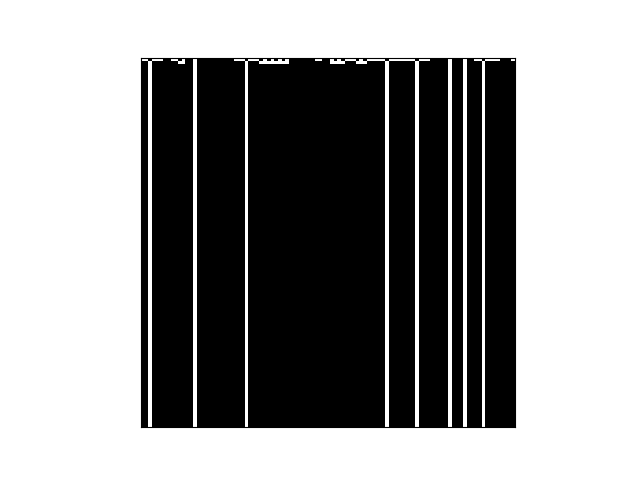
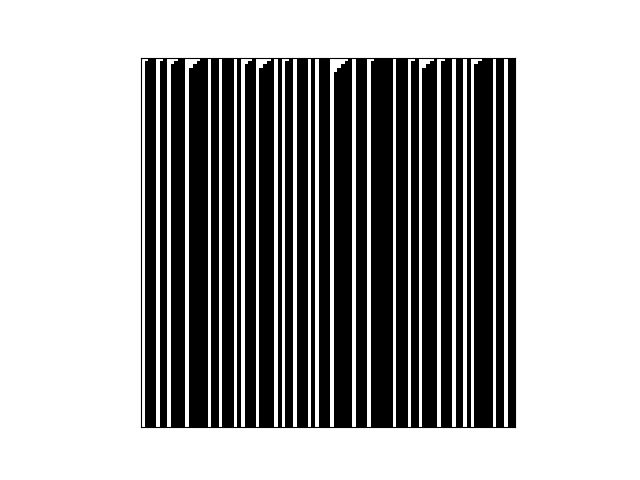
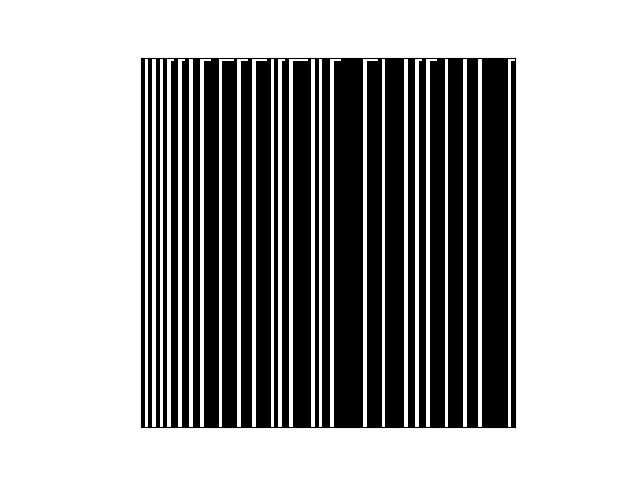
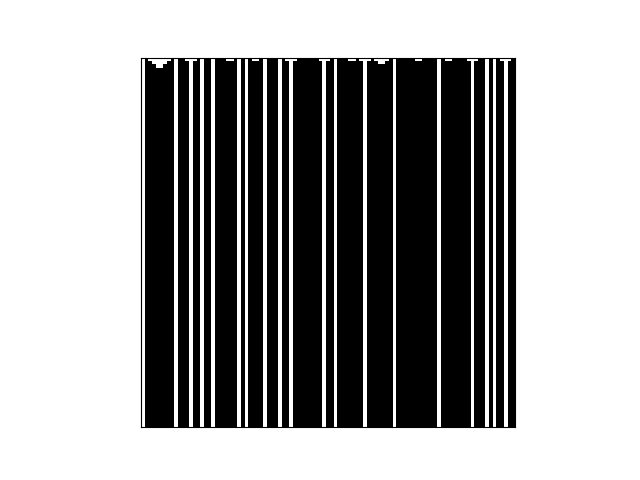
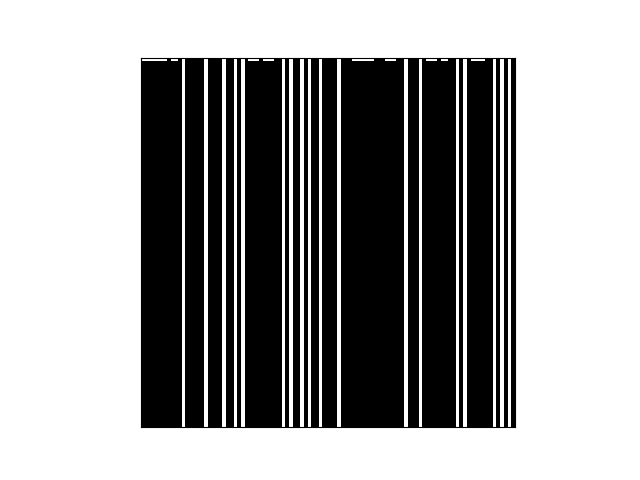
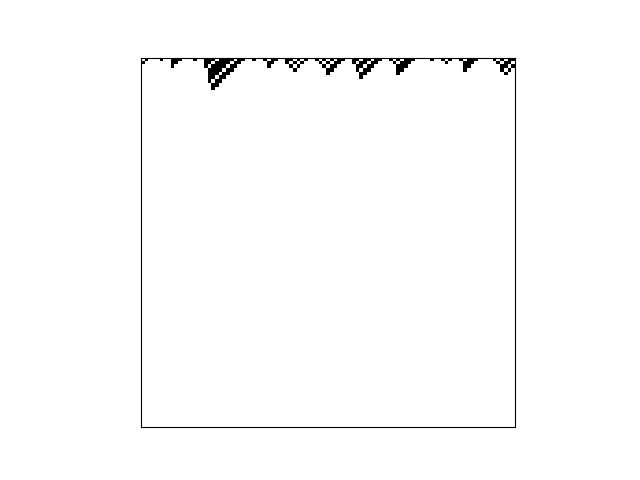
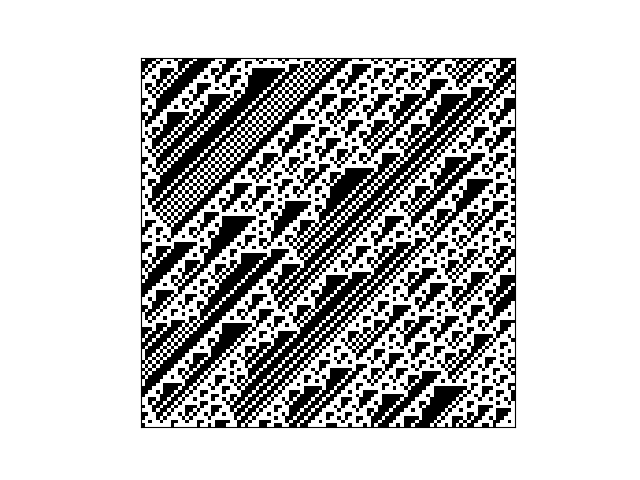
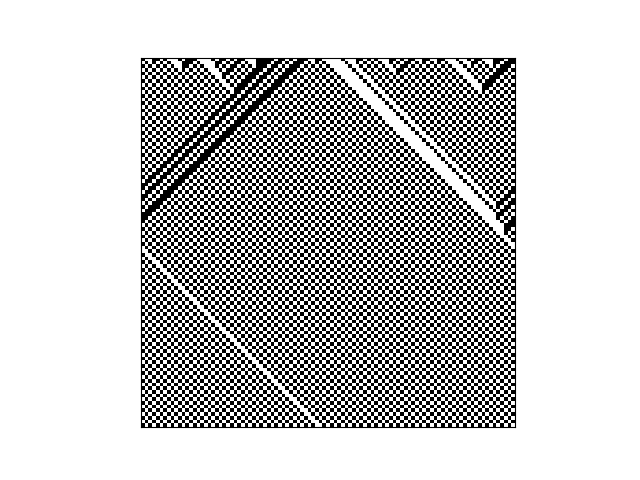
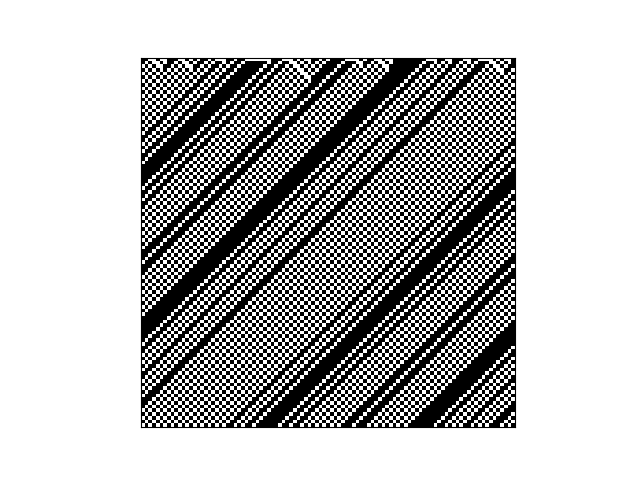
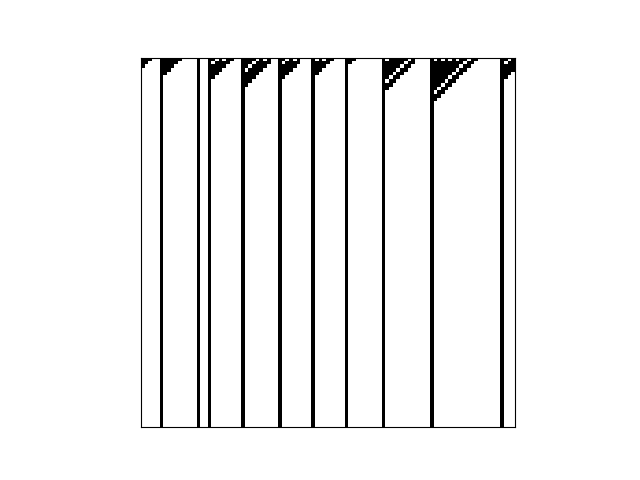
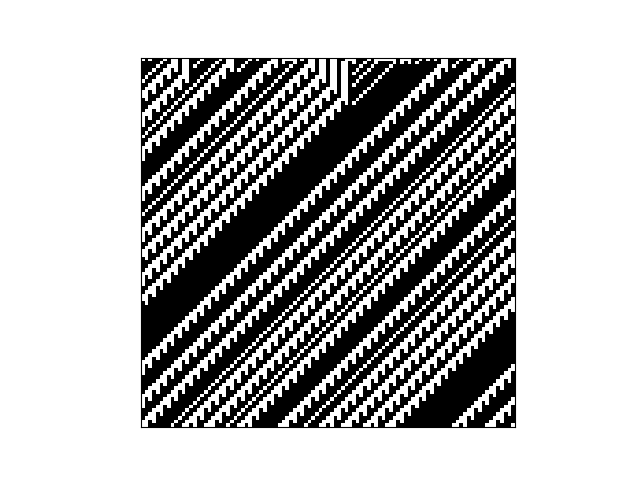
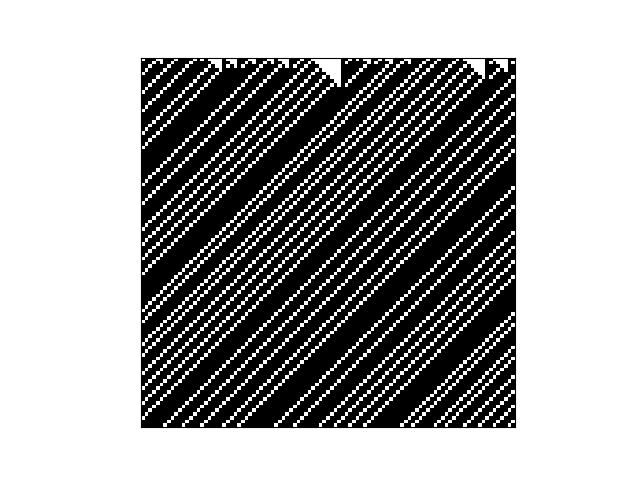
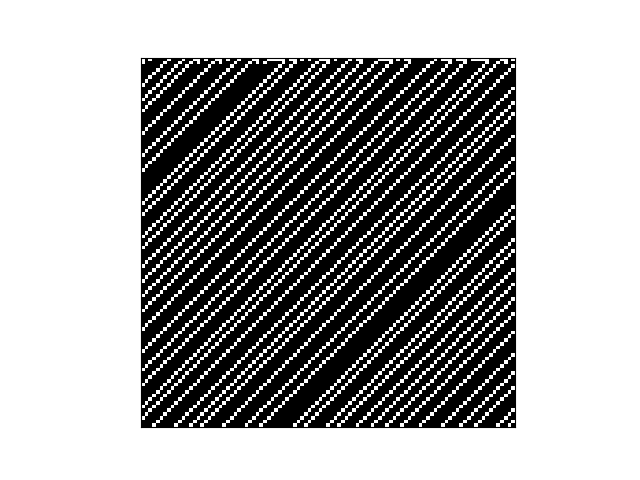
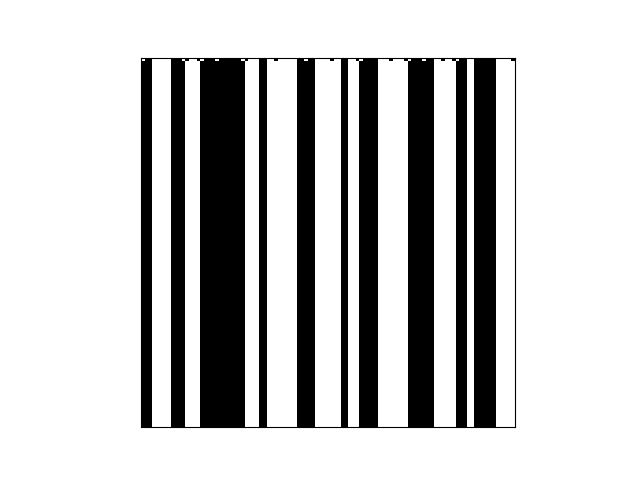
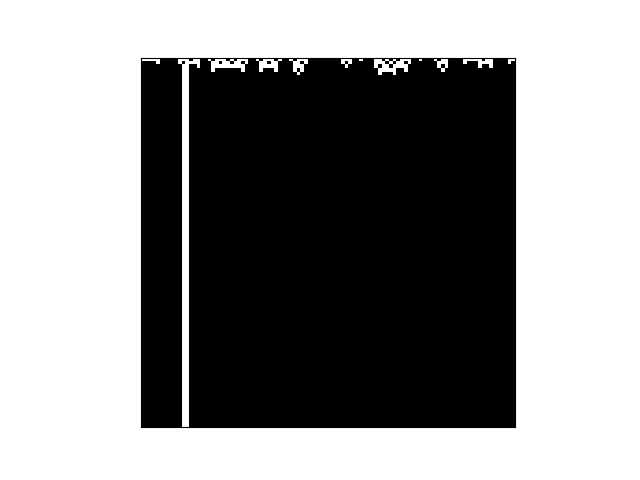
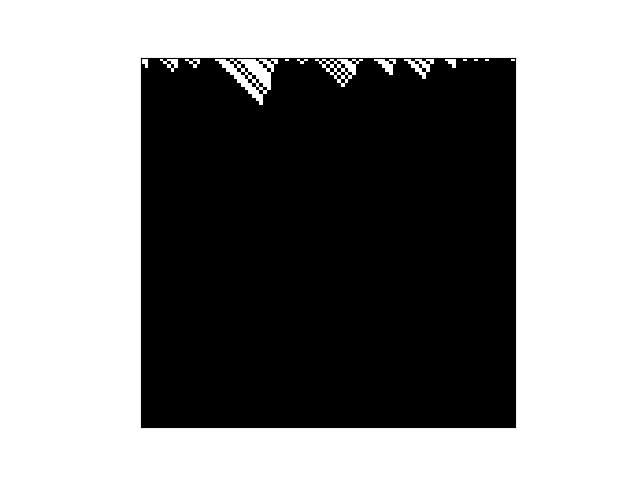
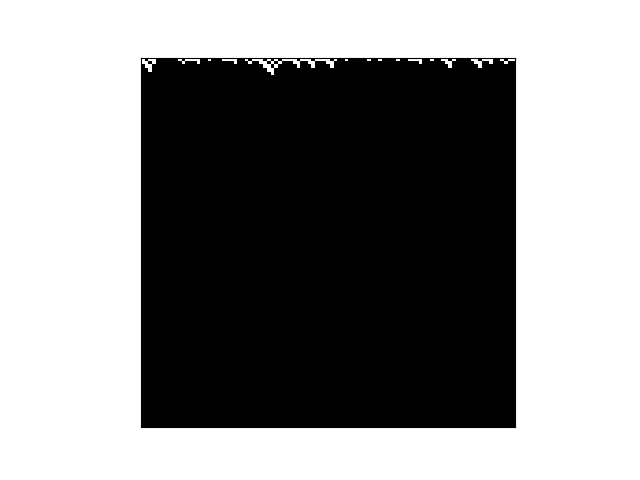
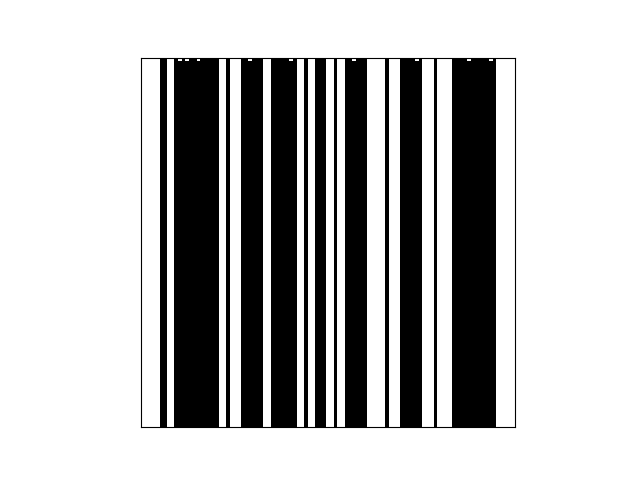
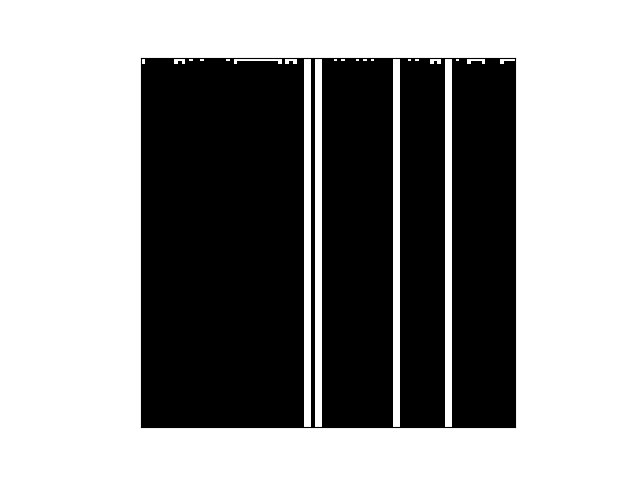
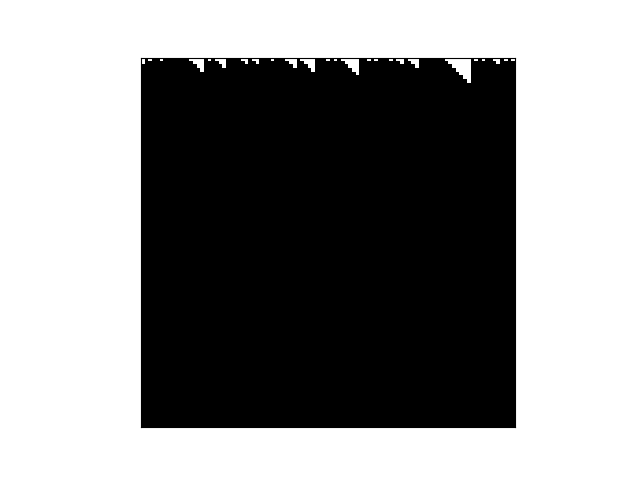
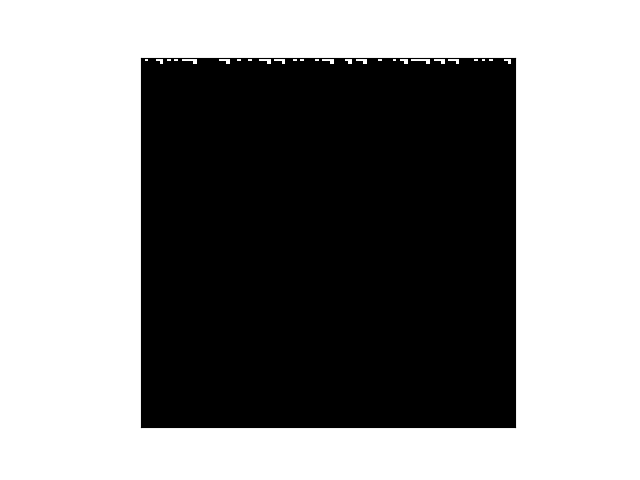
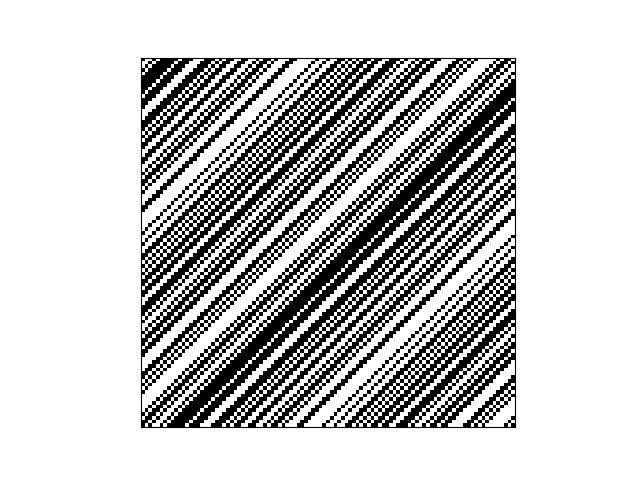
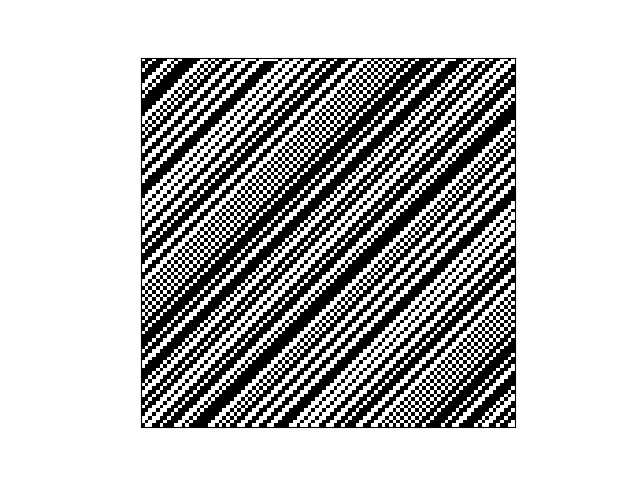
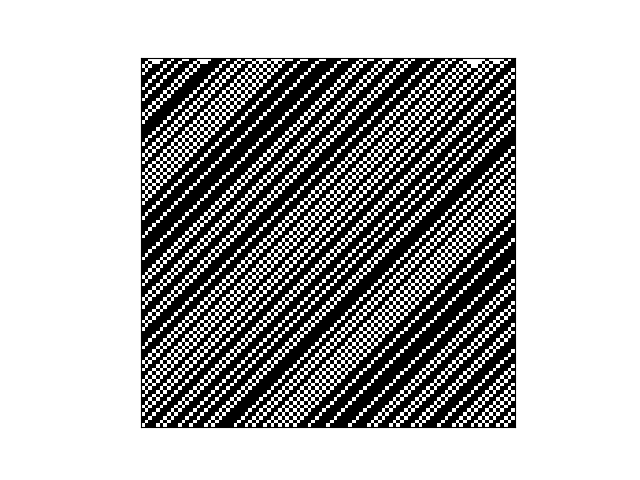
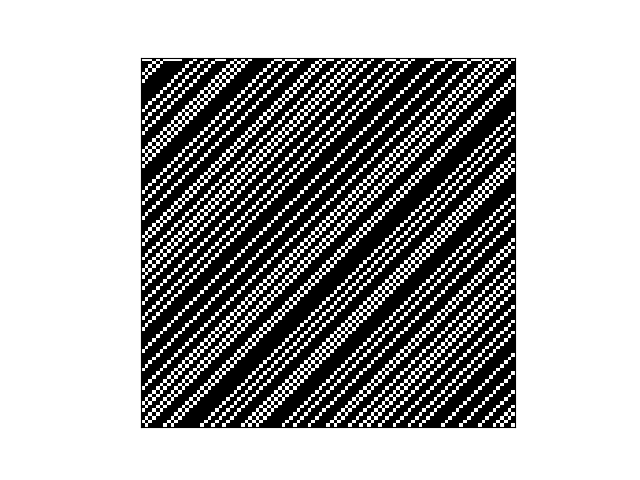
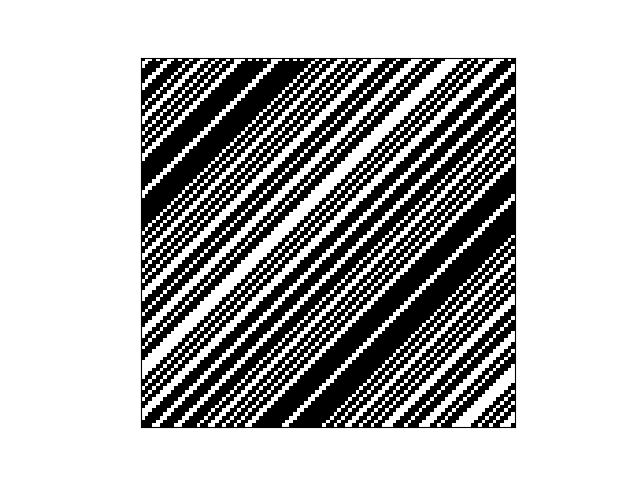
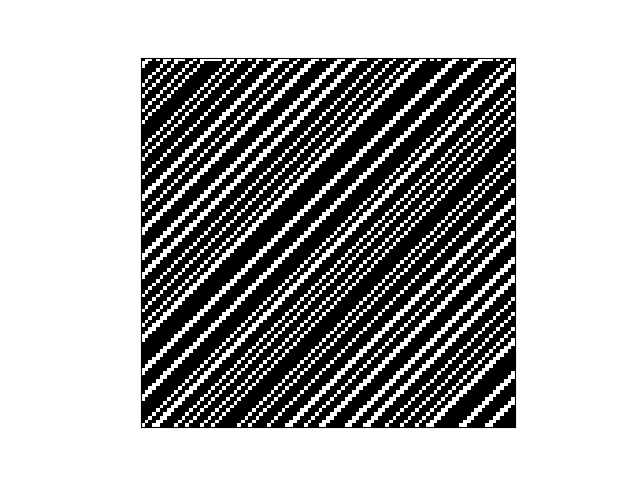
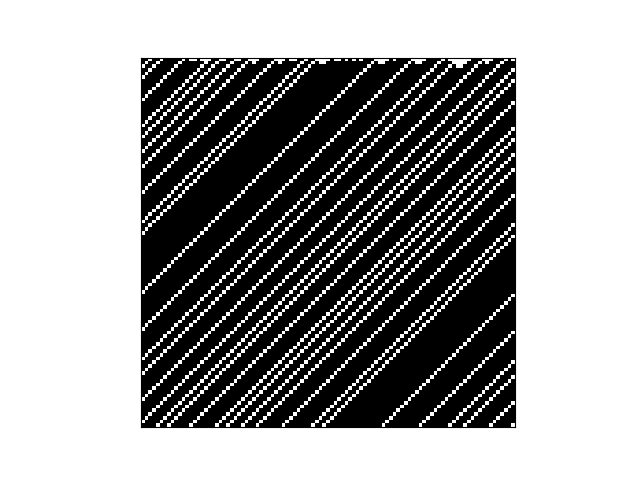
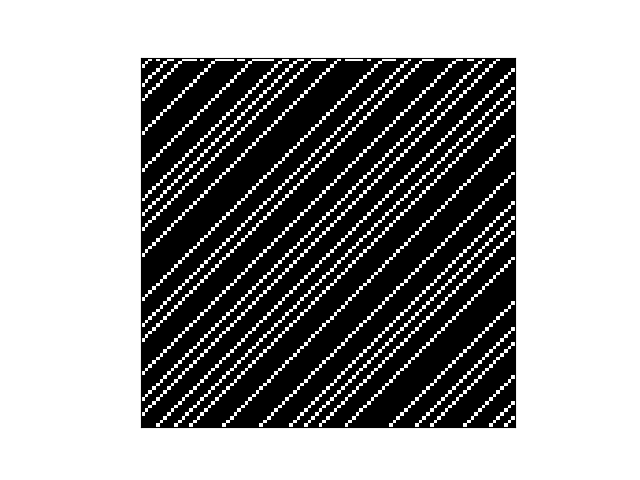
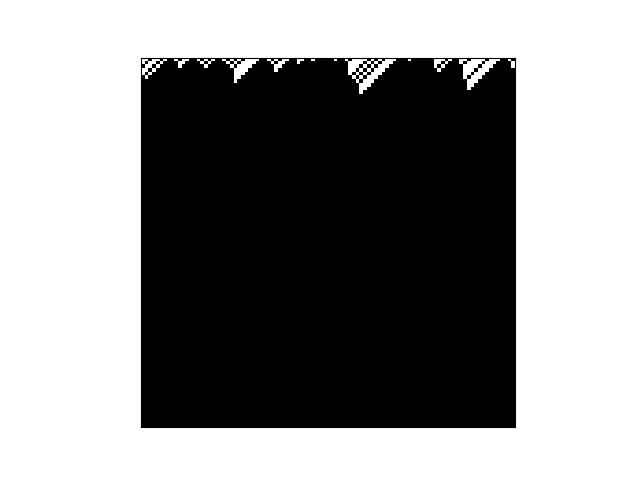
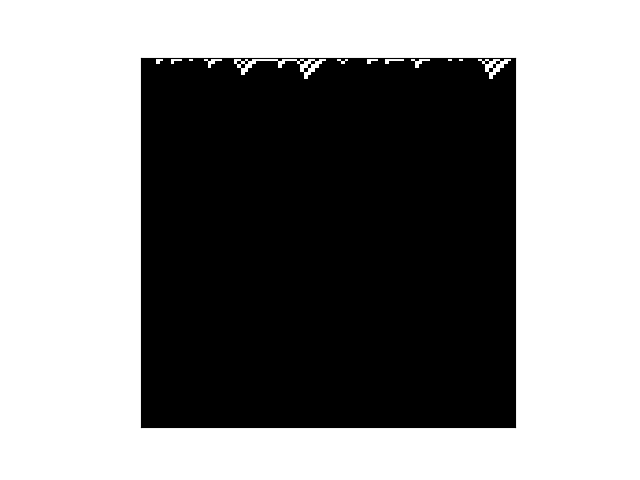
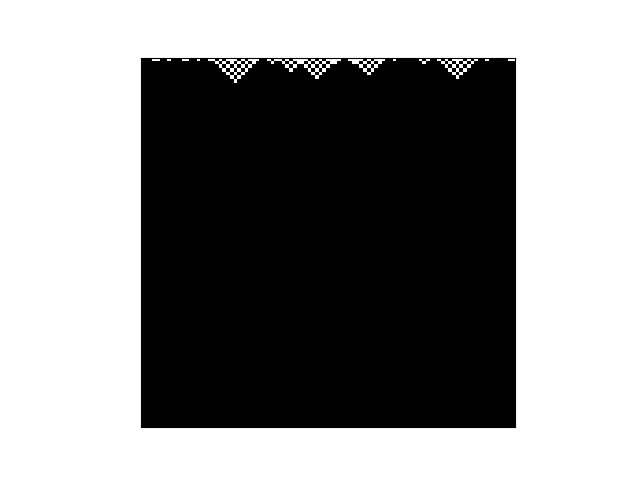
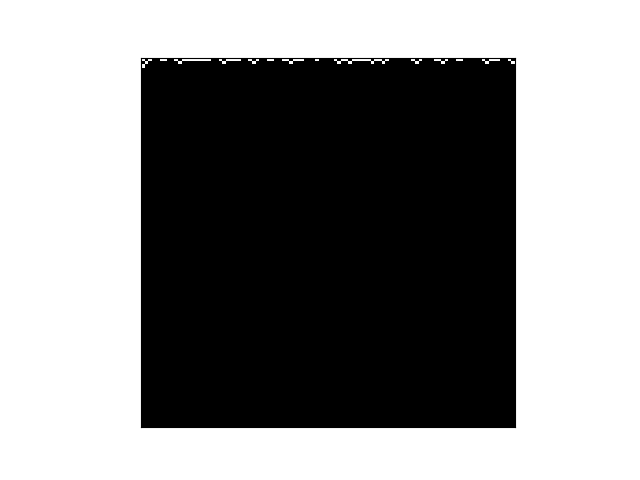
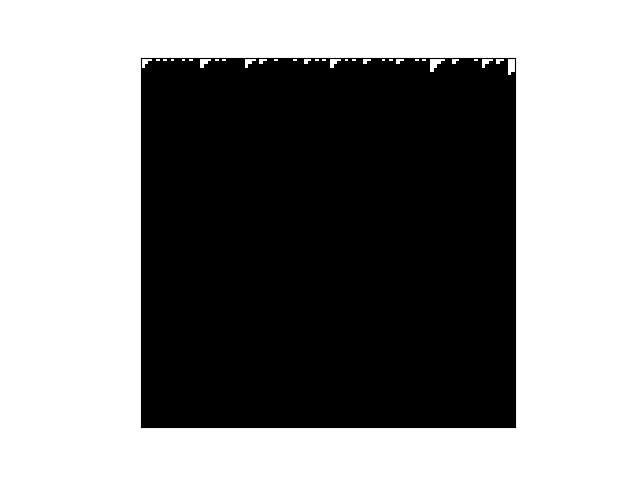
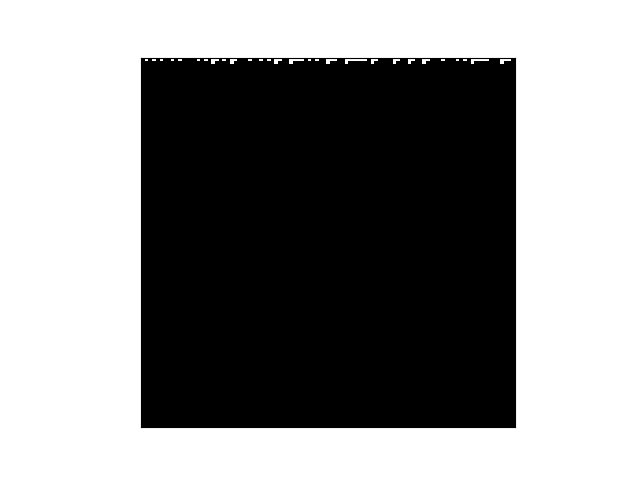
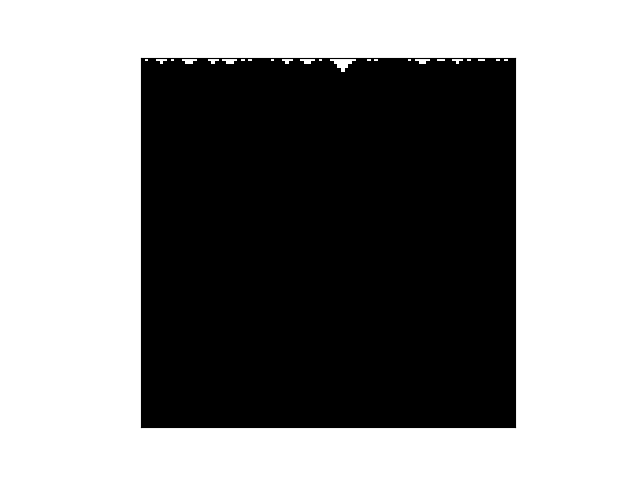
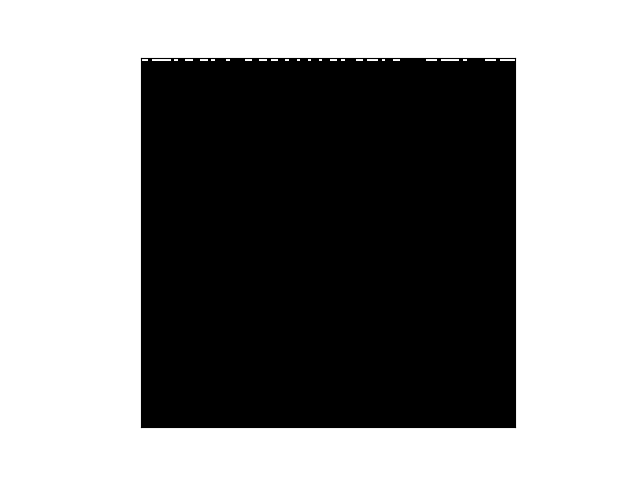

In [2]:
import os
import base64
from IPython.display import display, HTML

def display_pngs(directory):
    html = '<table>'
    filenames = [filename for filename in os.listdir(directory) if filename.endswith(".png") and '_' in filename]
    filenames = sorted(filenames, key=lambda x: int(x.split('_')[1].split('.')[0]))
    for filename in filenames:
        filepath = os.path.join(directory, filename)
        with open(filepath, "rb") as f:
            image_data = f.read()
            base64_encoded = base64.b64encode(image_data).decode('utf-8')
            html += f'<tr><td>{filename}</td><td><img src="data:image/png;base64,{base64_encoded}" /></td></tr>'
    html += '</table>'
    display(HTML(html))

# Provide the directory path where your PNG files are located
directory_path = "."

display_pngs(directory_path)
